In [1]:
import csv
import pandas as pd
import datetime as dt
import argparse
import os
import pickle
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2, venn2_unweighted

In [13]:
def graficoTotal_stacked(resultFinal, nameI):
    vet = resultFinal['targetName'].unique()
    num=0
    data = pd.DataFrame()
    for i in vet:
        teste1 = resultFinal[resultFinal['targetName']==i]
        if num==0:
            aux = teste1['queryName'].value_counts(dropna=False, sort=True)
            aux = aux.to_frame(name = i)
            data = aux
            num=1
        else:
            aux1 = teste1['queryName'].value_counts(dropna=False, sort=True)
            aux1 = aux1.to_frame(name = i)
            data = pd.merge(data, aux1, how='outer', right_index = True, left_index = True)
            
    data.fillna(value = 0, inplace = True)
    
    
    data.T.plot(kind="bar", colormap="tab20", stacked=True,figsize=(10,8), title = nameI).get_legend().set_visible(True) #não está plotando com matplotlib
    plt.savefig('Cupuacu/'+nameI+'/'+nameI+'Final_StackedPlot.png', format='png', dpi=1200)

def diagrama_venn(resultFinal, nameI):
    plt.clf()
    QtdFerramenta = resultFinal['source'].value_counts(dropna=False, sort=True)
    QtdFerramenta = QtdFerramenta.to_frame().T
    
    try:
        set3 = int(QtdFerramenta['Both'])
    except:
        set3=0
    try:
        set2 = int(QtdFerramenta['Infernal'])
    except:
        set2=0
    try:
        set1 = int(QtdFerramenta['Blast'])
    except:
        set1=0
    
    plt.title(nameI)
    out = venn2_unweighted(subsets = (set1, set2, set3), set_labels = ('Blast', 'Infernal'), set_colors=('purple', 'skyblue'))
    for text in out.set_labels:
       text.set_fontsize(25)
    for text in out.subset_labels:
       text.set_fontsize(18)
    plt.savefig(nameI+'_DiagramaVeen.png', format='png')

In [48]:
resultFinal = pd.read_csv('Cupuacu/TgrandC174P/TgrandC174PFinal_Resultado_Final.csv')
resultFinal

,targetName,seqFrom,seqTo,pident,qcover,IDdb,strand,score,Evalue,ncRNA,queryName,source,ID
0,chr10a,467330,467402,CL00001,-,RF00005,+,65.0,1.700000e-09,tRNA,tRNA,Infernal,id1
1,chr10a,987151,989891,95.898,96.108,URS000235B01E,+,4446.0,0.000000e+00,ncRNA,lncRNA,Blast,id2
2,chr10a,1004221,1004313,-,-,RF01284,+,41.4,2.500000e-01,snoR8a,snoRNA,Infernal,id3
3,chr10a,1176544,1176633,-,-,RF02539,+,51.2,3.500000e-05,SNOR75,snoRNA,Infernal,id4
4,chr10a,1411649,1411736,-,-,RF00296,+,47.4,1.800000e-02,snoR16,snoRNA,Infernal,id5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,chr9b,33499319,33499421,-,-,RF01208,+,79.7,2.400000e-08,snoR99,snoRNA,Infernal,id5405
5405,chr9b,33499586,33499688,-,-,RF01208,+,57.6,1.100000e-03,snoR99,snoRNA,Infernal,id5406
5406,chr9b,33499861,33499962,-,-,RF01208,+,78.2,5.100000e-08,snoR99,snoRNA,Infernal,id5407
5407,chr9b,33674771,33674885,-,-,RF00303,+,47.1,1.100000e-02,snoR86,snoRNA,Infernal,id5408


In [49]:
salvar_Fasta=None
resultados_miRNA(resultFinal, 'Cupuacu/TgrandC174P/TgrandC174PFinal')

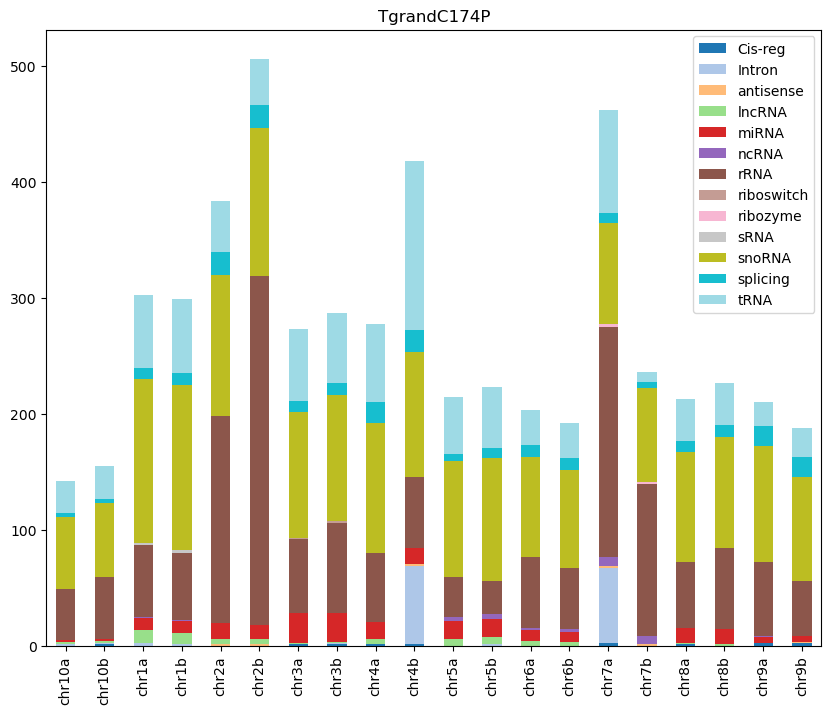

In [20]:
if len(resultFinal['targetName'].unique()) < 31:
    graficoTotal_stacked(resultFinal, 'TgrandC174P')

In [ ]:
graficoTotal_stacked(resultFinal, 'TgrandC174')
diagrama_venn(resultFinal, 'TgrandC174')

In [41]:
def resultados_miRNA(resultFinal, nameI):
    miRNA = resultFinal[resultFinal['queryName']=="miRNA"]
    if miRNA.empty == False:
        #miRNA.to_csv(nameI+'_miRNAs.csv', index=False)
        #gffmiRNA = salvar_gff(miRNA, nameI+'_miRNA')
        QtdTotalmiRNA = miRNA['ncRNA'].value_counts(dropna=False, sort=True)
        QtdTotalmiRNA = QtdTotalmiRNA.to_frame().reset_index()
        QtdTotalmiRNA = QtdTotalmiRNA.rename(columns= {'ncRNA': 'Qtd', 'index':'ncRNA'})
        
        miRNA2 = miRNA[['ncRNA', 'IDdb']]
        miRNA2 = miRNA2.drop_duplicates()
        miRNA2 = miRNA2.set_index('ncRNA')
        miRNAdict = miRNA2.to_dict()
        QtdTotalmiRNA['IDdb'] = QtdTotalmiRNA['ncRNA'].map(miRNAdict['IDdb'])

        QtdTotalmiRNA.to_csv(nameI+'_Tabela_quantidade_miRNAs.csv')
        if salvar_Fasta != None:    
            salvar_fasta(gffmiRNA, nameI+'_miRNA')

In [21]:
miRNA = resultFinal[resultFinal['queryName']=="miRNA"]
QtdTotalmiRNA = miRNA['ncRNA'].value_counts(dropna=False, sort=True)
QtdTotalmiRNA = QtdTotalmiRNA.to_frame().reset_index()
QtdTotalmiRNA = QtdTotalmiRNA.rename(columns= {'ncRNA': 'Qtd', 'index':'ncRNA'})

In [28]:
miRNA2 = miRNA[['ncRNA', 'IDdb']]
miRNA2 = miRNA2.drop_duplicates()
miRNA2 = miRNA2.set_index('ncRNA')
miRNAdict = miRNA2.to_dict()
miRNAdict

{'IDdb': {'MIR171_1': 'RF00643',
  'MIR394': 'RF00688',
  'mir-166': 'RF00075',
  'MIR396': 'RF00648',
  'MIR169_2': 'RF00645',
  'MIR159': 'RF00638',
  'mir-395': 'RF00451',
  'MIR164': 'RF00647',
  'MIR390': 'RF00689',
  'mir-160': 'RF00247',
  'mir-172': 'RF00452',
  'MIR397': 'RF00704',
  'MIR2275': 'RF03896',
  'MIR167_1': 'RF00640',
  'MIR480': 'RF00782',
  'mir-156': 'RF00073',
  'MIR319': 'RF03483',
  'MIR1846': 'RF02000',
  'MIR169_5': 'RF00865',
  'MIR530': 'RF01005',
  'MIR2950': 'RF03335',
  'MIR535': 'RF00714',
  'MIR403': 'RF00842',
  'MIR408': 'RF00690',
  'MIR162_2': 'RF00742',
  'mir-393': 'RF02516',
  'MIR828': 'RF01026',
  'MIR171_2': 'RF00692',
  'MIR473': 'RF00778',
  'MIR168': 'RF00677',
  'MIR398': 'RF00695',
  'MIR477': 'RF00780',
  'MIR5225': 'RF03517',
  'mir-399': 'RF00445'}}

In [31]:
QtdTotalmiRNA['IDdb'] = QtdTotalmiRNA['ncRNA'].map(miRNAdict['IDdb'])
QtdTotalmiRNA

,ncRNA,Qtd,IDdb
0,MIR169_2,22,RF00645
1,mir-166,19,RF00075
2,MIR171_1,18,RF00643
3,MIR159,18,RF00638
4,mir-399,16,RF00445
5,MIR169_5,15,RF00865
6,mir-172,10,RF00452
7,MIR396,8,RF00648
8,mir-156,8,RF00073
9,mir-395,7,RF00451


In [2]:
resultFinal = pd.read_csv('LdCM4.tblou_Resultado_Final.csv')
resultFinal

,targetName,seqFrom,seqTo,pident,qcover,IDdb,strand,score,Evalue,ncRNA,queryName,source,ID
0,LdBPK_010010.1.1,1,1002,99.9,100.0,URS0000ED88BC,+,1845.0,0.000000e+00,misc_RNA,misc_RNA,Blast,id1
1,LdBPK_010020.1.1,1,1662,99.699,100.0,URS0000ED5651,+,3042.0,0.000000e+00,misc_RNA,misc_RNA,Blast,id2
2,LdBPK_010030.1.1,1,2022,99.852,100.0,URS0000EC9C3B,+,3718.0,0.000000e+00,misc_RNA,misc_RNA,Blast,id3
3,LdBPK_010040.1.1,1,561,100.0,100.0,URS0000ED4FDF,+,1037.0,0.000000e+00,misc_RNA,misc_RNA,Blast,id4
4,LdBPK_010050.1.1,1,1998,99.85,100.0,URS0000EC6ACA,+,3674.0,0.000000e+00,misc_RNA,misc_RNA,Blast,id5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,LdCM.976.1,2,558,100.0,99.0,URS0000ECA4B1,-,1029.0,0.000000e+00,ncRNA,misc_RNA,Both,id7973
7973,LdCM.981.1,2,236,99.153,99.0,URS0000E2EEB9,-,424.0,1.140000e-115,snoRNA,snoRNA,Blast,id7974
7974,LdCM.984.1,42,651,99.836,97.0,URS0000ECCAE6,+,1122.0,0.000000e+00,ncRNA,misc_RNA,Both,id7975
7975,LdCM.989.1,121,575,98.987,100.0,URS0000ECEA41,+,708.0,0.000000e+00,ncRNA,misc_RNA,Both,id7976


In [ ]:
###Salva em GFF        
def salvar_gff(resultFinalFinal, nameI):      
    if os.path.exists(nameI+'_ResultadoFinal.gff'):
        os.remove(nameI+'_ResultadoFinal.gff')
    
    gff = pd.DataFrame(columns=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
    gff['seq_id'] = resultFinalFinal['targetName']
    gff['source'] = resultFinalFinal['source']
    gff['type'] = resultFinalFinal['queryName']
    gff['start'] = resultFinalFinal['seqFrom']
    gff['end'] = resultFinalFinal['seqTo']
    gff['score'] = resultFinalFinal['score']
    gff['strand'] = resultFinalFinal['strand']
    gff['phase'] = '.'
    gff['attributes'] = resultFinalFinal['ID'] #resultado do blast/infernal
    gff.to_csv(nameI+'_ResultadoFinal.gff', sep='\t',mode='a', index=False, header=False)
    
    file = open(nameI+'_ResultadoFinal.gff', 'r')
    lines = file.readlines()
    file.close()
    lines.insert(0, "##gff-version 3"+'\n')
    
    file = open(nameI+"_ResultadoFinal.gff", 'w')
    file.writelines(lines)
    file.close()
    
    return gff

In [28]:
resultFinalFinal = resultFinal.replace({'minus': '-', 'plus':'+'})
out_file = "teste.gff"

gff = pd.DataFrame(columns=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
gff['seq_id'] = resultFinalFinal['targetName']
gff['source'] = resultFinalFinal['source']
gff['type'] = resultFinalFinal['queryName']
gff['start'] = resultFinalFinal['seqFrom']
gff['end'] = resultFinalFinal['seqTo']
gff['score'] = resultFinalFinal['score']
gff['strand'] = resultFinalFinal['strand']
gff['phase'] = '.'
gff['attributes'] = resultFinalFinal['ID'] #resultado do blast/infernal

gff.to_gff3(out_file)

AttributeError: 'DataFrame' object has no attribute 'to_gff3'

In [16]:
in_handle = open('LdCM4.tblou_ResultadoFinal.gff')
for rec in GFF.parse(in_handle):
    print(rec)
in_handle.close()

ID: LdBPK_010010.1.1
Name: <unknown name>
Description: <unknown description>
Number of features: 1
/gff-version=['3']
UnknownSeq(1002, character='?')
ID: LdBPK_010020.1.1
Name: <unknown name>
Description: <unknown description>
Number of features: 1
/gff-version=['3']
UnknownSeq(1662, character='?')
ID: LdBPK_010030.1.1
Name: <unknown name>
Description: <unknown description>
Number of features: 1
/gff-version=['3']
UnknownSeq(2022, character='?')
ID: LdBPK_010040.1.1
Name: <unknown name>
Description: <unknown description>
Number of features: 1
/gff-version=['3']
UnknownSeq(561, character='?')
ID: LdBPK_010050.1.1
Name: <unknown name>
Description: <unknown description>
Number of features: 1
/gff-version=['3']
UnknownSeq(1998, character='?')
ID: LdBPK_010060.1.1
Name: <unknown name>
Description: <unknown description>
Number of features: 1
/gff-version=['3']
UnknownSeq(750, character='?')
ID: LdBPK_010070.1.1
Name: <unknown name>
Description: <unknown description>
Number of features: 1
/gf

In [49]:
from gff3 import Gff3

In [56]:
gff = Gff3('LdCM4.tblou_ResultadoFinal.gff3')


ERROR    Line 2: FORMAT: Attributes must contain one and only one equal (=) sign: "id1"
-> LdBPK_010010.1.1	Blast	misc_RNA	1	1002	1845.0	+	.	id1
WARNING  Line 2: FORMAT: Empty attribute value: "id1"
-> LdBPK_010010.1.1	Blast	misc_RNA	1	1002	1845.0	+	.	id1
ERROR    Line 3: FORMAT: Attributes must contain one and only one equal (=) sign: "id2"
-> LdBPK_010020.1.1	Blast	misc_RNA	1	1662	3042.0	+	.	id2
WARNING  Line 3: FORMAT: Empty attribute value: "id2"
-> LdBPK_010020.1.1	Blast	misc_RNA	1	1662	3042.0	+	.	id2
ERROR    Line 4: FORMAT: Attributes must contain one and only one equal (=) sign: "id3"
-> LdBPK_010030.1.1	Blast	misc_RNA	1	2022	3718.0	+	.	id3
WARNING  Line 4: FORMAT: Empty attribute value: "id3"
-> LdBPK_010030.1.1	Blast	misc_RNA	1	2022	3718.0	+	.	id3
ERROR    Line 5: FORMAT: Attributes must contain one and only one equal (=) sign: "id4"
-> LdBPK_010040.1.1	Blast	misc_RNA	1	561	1037.0	+	.	id4
WARNING  Line 5: FORMAT: Empty attribute value: "id4"
-> LdBPK_010040.1.1	Blast	misc_RNA

ERROR    Line 34: FORMAT: Attributes must contain one and only one equal (=) sign: "id33"
-> LdBPK_010360.1.1	Blast	misc_RNA	1	762	1338.0	+	.	id33
WARNING  Line 34: FORMAT: Empty attribute value: "id33"
-> LdBPK_010360.1.1	Blast	misc_RNA	1	762	1338.0	+	.	id33
ERROR    Line 35: FORMAT: Attributes must contain one and only one equal (=) sign: "id34"
-> LdBPK_010370.1.1	Blast	misc_RNA	1	2244	4128.0	+	.	id34
WARNING  Line 35: FORMAT: Empty attribute value: "id34"
-> LdBPK_010370.1.1	Blast	misc_RNA	1	2244	4128.0	+	.	id34
ERROR    Line 36: FORMAT: Attributes must contain one and only one equal (=) sign: "id35"
-> LdBPK_010380.1.1	Blast	misc_RNA	1	570	1053.0	+	.	id35
WARNING  Line 36: FORMAT: Empty attribute value: "id35"
-> LdBPK_010380.1.1	Blast	misc_RNA	1	570	1053.0	+	.	id35
ERROR    Line 37: FORMAT: Attributes must contain one and only one equal (=) sign: "id36"
-> LdBPK_010390.1.1	Blast	misc_RNA	1	567	1048.0	+	.	id36
WARNING  Line 37: FORMAT: Empty attribute value: "id36"
-> LdBPK_010390

WARNING  Line 65: FORMAT: Empty attribute value: "id64"
-> LdBPK_010670.1.1	Blast	misc_RNA	1	1485	2732.0	+	.	id64
ERROR    Line 66: FORMAT: Attributes must contain one and only one equal (=) sign: "id65"
-> LdBPK_010680.1.1	Blast	misc_RNA	1	4647	8538.0	+	.	id65
WARNING  Line 66: FORMAT: Empty attribute value: "id65"
-> LdBPK_010680.1.1	Blast	misc_RNA	1	4647	8538.0	+	.	id65
ERROR    Line 67: FORMAT: Attributes must contain one and only one equal (=) sign: "id66"
-> LdBPK_010690.1.1	Blast	misc_RNA	1	903	1629.0	+	.	id66
WARNING  Line 67: FORMAT: Empty attribute value: "id66"
-> LdBPK_010690.1.1	Blast	misc_RNA	1	903	1629.0	+	.	id66
ERROR    Line 68: FORMAT: Attributes must contain one and only one equal (=) sign: "id67"
-> LdBPK_010700.1.1	Blast	misc_RNA	1	2412	4405.0	+	.	id67
WARNING  Line 68: FORMAT: Empty attribute value: "id67"
-> LdBPK_010700.1.1	Blast	misc_RNA	1	2412	4405.0	+	.	id67
ERROR    Line 69: FORMAT: Attributes must contain one and only one equal (=) sign: "id68"
-> LdBPK_010

ERROR    Line 97: FORMAT: Attributes must contain one and only one equal (=) sign: "id96"
-> LdBPK_020120.1.1	Blast	misc_RNA	1	1836	3358.0	+	.	id96
WARNING  Line 97: FORMAT: Empty attribute value: "id96"
-> LdBPK_020120.1.1	Blast	misc_RNA	1	1836	3358.0	+	.	id96
ERROR    Line 98: FORMAT: Attributes must contain one and only one equal (=) sign: "id97"
-> LdBPK_020130.1.1	Blast	misc_RNA	1	5910	10743.0	+	.	id97
WARNING  Line 98: FORMAT: Empty attribute value: "id97"
-> LdBPK_020130.1.1	Blast	misc_RNA	1	5910	10743.0	+	.	id97
ERROR    Line 99: FORMAT: Attributes must contain one and only one equal (=) sign: "id98"
-> LdBPK_020140.1.1	Blast	misc_RNA	1021	1572	1003.0	+	.	id98
WARNING  Line 99: FORMAT: Empty attribute value: "id98"
-> LdBPK_020140.1.1	Blast	misc_RNA	1021	1572	1003.0	+	.	id98
ERROR    Line 100: FORMAT: Attributes must contain one and only one equal (=) sign: "id99"
-> LdBPK_020140.1.1	Blast	misc_RNA	1573	1905	604.0	+	.	id99
WARNING  Line 100: FORMAT: Empty attribute value: "id99

ERROR    Line 128: FORMAT: Attributes must contain one and only one equal (=) sign: "id127"
-> LdBPK_020430.1.1	Blast	misc_RNA	1	876	1618.0	+	.	id127
WARNING  Line 128: FORMAT: Empty attribute value: "id127"
-> LdBPK_020430.1.1	Blast	misc_RNA	1	876	1618.0	+	.	id127
ERROR    Line 129: FORMAT: Attributes must contain one and only one equal (=) sign: "id128"
-> LdBPK_020440.1.1	Blast	misc_RNA	1	10752	19562.0	+	.	id128
WARNING  Line 129: FORMAT: Empty attribute value: "id128"
-> LdBPK_020440.1.1	Blast	misc_RNA	1	10752	19562.0	+	.	id128
ERROR    Line 130: FORMAT: Attributes must contain one and only one equal (=) sign: "id129"
-> LdBPK_020450.1.1	Blast	misc_RNA	1	675	1230.0	+	.	id129
WARNING  Line 130: FORMAT: Empty attribute value: "id129"
-> LdBPK_020450.1.1	Blast	misc_RNA	1	675	1230.0	+	.	id129
ERROR    Line 131: FORMAT: Attributes must contain one and only one equal (=) sign: "id130"
-> LdBPK_020460.1.1	Blast	misc_RNA	1	2130	3895.0	+	.	id130
WARNING  Line 131: FORMAT: Empty attribute va

ERROR    Line 159: FORMAT: Attributes must contain one and only one equal (=) sign: "id158"
-> LdBPK_030010.1.1	Blast	misc_RNA	26	3030	5483.0	+	.	id158
WARNING  Line 159: FORMAT: Empty attribute value: "id158"
-> LdBPK_030010.1.1	Blast	misc_RNA	26	3030	5483.0	+	.	id158
ERROR    Line 160: FORMAT: Attributes must contain one and only one equal (=) sign: "id159"
-> LdBPK_030020.1.1	Blast	misc_RNA	1	807	1480.0	+	.	id159
WARNING  Line 160: FORMAT: Empty attribute value: "id159"
-> LdBPK_030020.1.1	Blast	misc_RNA	1	807	1480.0	+	.	id159
ERROR    Line 161: FORMAT: Attributes must contain one and only one equal (=) sign: "id160"
-> LdBPK_030030.1.1	Blast	misc_RNA	1	1224	2228.0	+	.	id160
WARNING  Line 161: FORMAT: Empty attribute value: "id160"
-> LdBPK_030030.1.1	Blast	misc_RNA	1	1224	2228.0	+	.	id160
ERROR    Line 162: FORMAT: Attributes must contain one and only one equal (=) sign: "id161"
-> LdBPK_030040.1.1	Blast	misc_RNA	1	1146	2106.0	+	.	id161
WARNING  Line 162: FORMAT: Empty attribute va

ERROR    Line 190: FORMAT: Attributes must contain one and only one equal (=) sign: "id189"
-> LdBPK_030330.1.1	Blast	misc_RNA	1	4365	8017.0	+	.	id189
WARNING  Line 190: FORMAT: Empty attribute value: "id189"
-> LdBPK_030330.1.1	Blast	misc_RNA	1	4365	8017.0	+	.	id189
ERROR    Line 191: FORMAT: Attributes must contain one and only one equal (=) sign: "id190"
-> LdBPK_030340.1.1	Blast	misc_RNA	1	4956	8986.0	+	.	id190
WARNING  Line 191: FORMAT: Empty attribute value: "id190"
-> LdBPK_030340.1.1	Blast	misc_RNA	1	4956	8986.0	+	.	id190
ERROR    Line 192: FORMAT: Attributes must contain one and only one equal (=) sign: "id191"
-> LdBPK_030350.1.1	Blast	misc_RNA	1	933	1718.0	+	.	id191
WARNING  Line 192: FORMAT: Empty attribute value: "id191"
-> LdBPK_030350.1.1	Blast	misc_RNA	1	933	1718.0	+	.	id191
ERROR    Line 193: FORMAT: Attributes must contain one and only one equal (=) sign: "id192"
-> LdBPK_030360.1.1	Blast	misc_RNA	1	696	1275.0	+	.	id192
WARNING  Line 193: FORMAT: Empty attribute value

ERROR    Line 221: FORMAT: Attributes must contain one and only one equal (=) sign: "id220"
-> LdBPK_030630.1.1	Blast	misc_RNA	1	2670	4881.0	+	.	id220
WARNING  Line 221: FORMAT: Empty attribute value: "id220"
-> LdBPK_030630.1.1	Blast	misc_RNA	1	2670	4881.0	+	.	id220
ERROR    Line 222: FORMAT: Attributes must contain one and only one equal (=) sign: "id221"
-> LdBPK_030640.1.1	Blast	misc_RNA	1	2397	4335.0	+	.	id221
WARNING  Line 222: FORMAT: Empty attribute value: "id221"
-> LdBPK_030640.1.1	Blast	misc_RNA	1	2397	4335.0	+	.	id221
ERROR    Line 223: FORMAT: Attributes must contain one and only one equal (=) sign: "id222"
-> LdBPK_030650.1.1	Blast	misc_RNA	1	1701	3120.0	+	.	id222
WARNING  Line 223: FORMAT: Empty attribute value: "id222"
-> LdBPK_030650.1.1	Blast	misc_RNA	1	1701	3120.0	+	.	id222
ERROR    Line 224: FORMAT: Attributes must contain one and only one equal (=) sign: "id223"
-> LdBPK_030660.1.1	Blast	misc_RNA	1	861	1580.0	+	.	id223
WARNING  Line 224: FORMAT: Empty attribute val

WARNING  Line 251: FORMAT: Empty attribute value: "id250"
-> LdBPK_030940.1.1	Blast	misc_RNA	1	315	577.0	+	.	id250
ERROR    Line 252: FORMAT: Attributes must contain one and only one equal (=) sign: "id251"
-> LdBPK_030950.1.1	Blast	misc_RNA	1	978	1779.0	+	.	id251
WARNING  Line 252: FORMAT: Empty attribute value: "id251"
-> LdBPK_030950.1.1	Blast	misc_RNA	1	978	1779.0	+	.	id251
ERROR    Line 253: FORMAT: Attributes must contain one and only one equal (=) sign: "id252"
-> LdBPK_030960.1.1	Blast	misc_RNA	1	1242	2266.0	+	.	id252
WARNING  Line 253: FORMAT: Empty attribute value: "id252"
-> LdBPK_030960.1.1	Blast	misc_RNA	1	1242	2266.0	+	.	id252
ERROR    Line 254: FORMAT: Attributes must contain one and only one equal (=) sign: "id253"
-> LdBPK_030970.1.1	Blast	misc_RNA	1	753	1367.0	+	.	id253
WARNING  Line 254: FORMAT: Empty attribute value: "id253"
-> LdBPK_030970.1.1	Blast	misc_RNA	1	753	1367.0	+	.	id253
ERROR    Line 255: FORMAT: Attributes must contain one and only one equal (=) sign: "

WARNING  Line 282: FORMAT: Empty attribute value: "id281"
-> LdBPK_040270.1.1	Blast	misc_RNA	1	5559	10218.0	+	.	id281
ERROR    Line 283: FORMAT: Attributes must contain one and only one equal (=) sign: "id282"
-> LdBPK_040280.1.1	Blast	misc_RNA	1	1347	2466.0	+	.	id282
WARNING  Line 283: FORMAT: Empty attribute value: "id282"
-> LdBPK_040280.1.1	Blast	misc_RNA	1	1347	2466.0	+	.	id282
ERROR    Line 284: FORMAT: Attributes must contain one and only one equal (=) sign: "id283"
-> LdBPK_040290.1.1	Blast	misc_RNA	1	810	1474.0	+	.	id283
WARNING  Line 284: FORMAT: Empty attribute value: "id283"
-> LdBPK_040290.1.1	Blast	misc_RNA	1	810	1474.0	+	.	id283
ERROR    Line 285: FORMAT: Attributes must contain one and only one equal (=) sign: "id284"
-> LdBPK_040300.1.1	Blast	misc_RNA	1	1793	3271.0	+	.	id284
WARNING  Line 285: FORMAT: Empty attribute value: "id284"
-> LdBPK_040300.1.1	Blast	misc_RNA	1	1793	3271.0	+	.	id284
ERROR    Line 286: FORMAT: Attributes must contain one and only one equal (=) si

WARNING  Line 313: FORMAT: Empty attribute value: "id312"
-> LdBPK_040590.1.1	Blast	misc_RNA	1	9321	16855.0	+	.	id312
ERROR    Line 314: FORMAT: Attributes must contain one and only one equal (=) sign: "id313"
-> LdBPK_040600.1.1	Blast	misc_RNA	1	504	915.0	+	.	id313
WARNING  Line 314: FORMAT: Empty attribute value: "id313"
-> LdBPK_040600.1.1	Blast	misc_RNA	1	504	915.0	+	.	id313
ERROR    Line 315: FORMAT: Attributes must contain one and only one equal (=) sign: "id314"
-> LdBPK_040610.1.1	Blast	misc_RNA	1	3870	7047.0	+	.	id314
WARNING  Line 315: FORMAT: Empty attribute value: "id314"
-> LdBPK_040610.1.1	Blast	misc_RNA	1	3870	7047.0	+	.	id314
ERROR    Line 316: FORMAT: Attributes must contain one and only one equal (=) sign: "id315"
-> LdBPK_040620.1.1	Blast	misc_RNA	1	1017	1862.0	+	.	id315
WARNING  Line 316: FORMAT: Empty attribute value: "id315"
-> LdBPK_040620.1.1	Blast	misc_RNA	1	1017	1862.0	+	.	id315
ERROR    Line 317: FORMAT: Attributes must contain one and only one equal (=) sign

WARNING  Line 344: FORMAT: Empty attribute value: "id343"
-> LdBPK_040910.1.1	Blast	misc_RNA	1	744	1360.0	+	.	id343
ERROR    Line 345: FORMAT: Attributes must contain one and only one equal (=) sign: "id344"
-> LdBPK_040920.1.1	Blast	misc_RNA	1	1788	3280.0	+	.	id344
WARNING  Line 345: FORMAT: Empty attribute value: "id344"
-> LdBPK_040920.1.1	Blast	misc_RNA	1	1788	3280.0	+	.	id344
ERROR    Line 346: FORMAT: Attributes must contain one and only one equal (=) sign: "id345"
-> LdBPK_040930.1.1	Blast	misc_RNA	1	447	798.0	+	.	id345
WARNING  Line 346: FORMAT: Empty attribute value: "id345"
-> LdBPK_040930.1.1	Blast	misc_RNA	1	447	798.0	+	.	id345
ERROR    Line 347: FORMAT: Attributes must contain one and only one equal (=) sign: "id346"
-> LdBPK_040940.1.1	Blast	misc_RNA	1	1482	2732.0	+	.	id346
WARNING  Line 347: FORMAT: Empty attribute value: "id346"
-> LdBPK_040940.1.1	Blast	misc_RNA	1	1482	2732.0	+	.	id346
ERROR    Line 348: FORMAT: Attributes must contain one and only one equal (=) sign: 

WARNING  Line 375: FORMAT: Empty attribute value: "id374"
-> LdBPK_041230.1.1	Blast	misc_RNA	1	1107	2023.0	+	.	id374
ERROR    Line 376: FORMAT: Attributes must contain one and only one equal (=) sign: "id375"
-> LdBPK_041240.1.1	Blast	misc_RNA	1	3186	5795.0	+	.	id375
WARNING  Line 376: FORMAT: Empty attribute value: "id375"
-> LdBPK_041240.1.1	Blast	misc_RNA	1	3186	5795.0	+	.	id375
ERROR    Line 377: FORMAT: Attributes must contain one and only one equal (=) sign: "id376"
-> LdBPK_041250.1.1	Blast	misc_RNA	1	1131	2078.0	+	.	id376
WARNING  Line 377: FORMAT: Empty attribute value: "id376"
-> LdBPK_041250.1.1	Blast	misc_RNA	1	1131	2078.0	+	.	id376
ERROR    Line 378: FORMAT: Attributes must contain one and only one equal (=) sign: "id377"
-> LdBPK_044260.1.1	Blast	misc_RNA	1	339	621.0	+	.	id377
WARNING  Line 378: FORMAT: Empty attribute value: "id377"
-> LdBPK_044260.1.1	Blast	misc_RNA	1	339	621.0	+	.	id377
ERROR    Line 379: FORMAT: Attributes must contain one and only one equal (=) sign:

WARNING  Line 406: FORMAT: Empty attribute value: "id405"
-> LdBPK_050190.1.1	Blast	misc_RNA	1	1086	1973.0	+	.	id405
ERROR    Line 407: FORMAT: Attributes must contain one and only one equal (=) sign: "id406"
-> LdBPK_050200.1.1	Blast	misc_RNA	1	2361	4322.0	+	.	id406
WARNING  Line 407: FORMAT: Empty attribute value: "id406"
-> LdBPK_050200.1.1	Blast	misc_RNA	1	2361	4322.0	+	.	id406
ERROR    Line 408: FORMAT: Attributes must contain one and only one equal (=) sign: "id407"
-> LdBPK_050210.1.1	Blast	misc_RNA	1	4488	8161.0	+	.	id407
WARNING  Line 408: FORMAT: Empty attribute value: "id407"
-> LdBPK_050210.1.1	Blast	misc_RNA	1	4488	8161.0	+	.	id407
ERROR    Line 409: FORMAT: Attributes must contain one and only one equal (=) sign: "id408"
-> LdBPK_050220.1.1	Blast	misc_RNA	1	2007	3637.0	+	.	id408
WARNING  Line 409: FORMAT: Empty attribute value: "id408"
-> LdBPK_050220.1.1	Blast	misc_RNA	1	2007	3637.0	+	.	id408
ERROR    Line 410: FORMAT: Attributes must contain one and only one equal (=) s

WARNING  Line 437: FORMAT: Empty attribute value: "id436"
-> LdBPK_050540.1.1	Blast	misc_RNA	1	405	723.0	+	.	id436
ERROR    Line 438: FORMAT: Attributes must contain one and only one equal (=) sign: "id437"
-> LdBPK_050550.1.1	Blast	misc_RNA	1	948	1729.0	+	.	id437
WARNING  Line 438: FORMAT: Empty attribute value: "id437"
-> LdBPK_050550.1.1	Blast	misc_RNA	1	948	1729.0	+	.	id437
ERROR    Line 439: FORMAT: Attributes must contain one and only one equal (=) sign: "id438"
-> LdBPK_050560.1.1	Blast	misc_RNA	1	1260	2278.0	+	.	id438
WARNING  Line 439: FORMAT: Empty attribute value: "id438"
-> LdBPK_050560.1.1	Blast	misc_RNA	1	1260	2278.0	+	.	id438
ERROR    Line 440: FORMAT: Attributes must contain one and only one equal (=) sign: "id439"
-> LdBPK_050570.1.1	Blast	misc_RNA	1	1233	2272.0	+	.	id439
WARNING  Line 440: FORMAT: Empty attribute value: "id439"
-> LdBPK_050570.1.1	Blast	misc_RNA	1	1233	2272.0	+	.	id439
ERROR    Line 441: FORMAT: Attributes must contain one and only one equal (=) sign:

WARNING  Line 468: FORMAT: Empty attribute value: "id467"
-> LdBPK_050840.1.1	Blast	misc_RNA	1	4275	7840.0	+	.	id467
ERROR    Line 469: FORMAT: Attributes must contain one and only one equal (=) sign: "id468"
-> LdBPK_050850.1.1	Blast	misc_RNA	1	2004	3659.0	+	.	id468
WARNING  Line 469: FORMAT: Empty attribute value: "id468"
-> LdBPK_050850.1.1	Blast	misc_RNA	1	2004	3659.0	+	.	id468
ERROR    Line 470: FORMAT: Attributes must contain one and only one equal (=) sign: "id469"
-> LdBPK_050860.1.1	Blast	misc_RNA	1	468	854.0	+	.	id469
WARNING  Line 470: FORMAT: Empty attribute value: "id469"
-> LdBPK_050860.1.1	Blast	misc_RNA	1	468	854.0	+	.	id469
ERROR    Line 471: FORMAT: Attributes must contain one and only one equal (=) sign: "id470"
-> LdBPK_050870.1.1	Blast	misc_RNA	1	5817	10671.0	+	.	id470
WARNING  Line 471: FORMAT: Empty attribute value: "id470"
-> LdBPK_050870.1.1	Blast	misc_RNA	1	5817	10671.0	+	.	id470
ERROR    Line 472: FORMAT: Attributes must contain one and only one equal (=) sig

WARNING  Line 499: FORMAT: Empty attribute value: "id498"
-> LdBPK_051150.1.1	Blast	misc_RNA	1	2751	4981.0	+	.	id498
ERROR    Line 500: FORMAT: Attributes must contain one and only one equal (=) sign: "id499"
-> LdBPK_051160.1.1	Blast	misc_RNA	1	750	1380.0	+	.	id499
WARNING  Line 500: FORMAT: Empty attribute value: "id499"
-> LdBPK_051160.1.1	Blast	misc_RNA	1	750	1380.0	+	.	id499
ERROR    Line 501: FORMAT: Attributes must contain one and only one equal (=) sign: "id500"
-> LdBPK_051170.1.1	Blast	misc_RNA	1	1377	2532.0	+	.	id500
WARNING  Line 501: FORMAT: Empty attribute value: "id500"
-> LdBPK_051170.1.1	Blast	misc_RNA	1	1377	2532.0	+	.	id500
ERROR    Line 502: FORMAT: Attributes must contain one and only one equal (=) sign: "id501"
-> LdBPK_051180.1.1	Blast	misc_RNA	1	5880	10748.0	+	.	id501
WARNING  Line 502: FORMAT: Empty attribute value: "id501"
-> LdBPK_051180.1.1	Blast	misc_RNA	1	5880	10748.0	+	.	id501
ERROR    Line 503: FORMAT: Attributes must contain one and only one equal (=) s

ERROR    Line 531: FORMAT: Attributes must contain one and only one equal (=) sign: "id530"
-> LdBPK_060170.1.1	Blast	misc_RNA	1	426	776.0	+	.	id530
WARNING  Line 531: FORMAT: Empty attribute value: "id530"
-> LdBPK_060170.1.1	Blast	misc_RNA	1	426	776.0	+	.	id530
ERROR    Line 532: FORMAT: Attributes must contain one and only one equal (=) sign: "id531"
-> LdBPK_060180.1.1	Blast	misc_RNA	1	1989	3663.0	+	.	id531
WARNING  Line 532: FORMAT: Empty attribute value: "id531"
-> LdBPK_060180.1.1	Blast	misc_RNA	1	1989	3663.0	+	.	id531
ERROR    Line 533: FORMAT: Attributes must contain one and only one equal (=) sign: "id532"
-> LdBPK_060190.1.1	Blast	misc_RNA	1	1764	3197.0	+	.	id532
WARNING  Line 533: FORMAT: Empty attribute value: "id532"
-> LdBPK_060190.1.1	Blast	misc_RNA	1	1764	3197.0	+	.	id532
ERROR    Line 534: FORMAT: Attributes must contain one and only one equal (=) sign: "id533"
-> LdBPK_060200.1.1	Blast	misc_RNA	1	1491	2737.0	+	.	id533
WARNING  Line 534: FORMAT: Empty attribute value:

ERROR    Line 562: FORMAT: Attributes must contain one and only one equal (=) sign: "id561"
-> LdBPK_060500.1.1	Blast	misc_RNA	1	978	1796.0	+	.	id561
WARNING  Line 562: FORMAT: Empty attribute value: "id561"
-> LdBPK_060500.1.1	Blast	misc_RNA	1	978	1796.0	+	.	id561
ERROR    Line 563: FORMAT: Attributes must contain one and only one equal (=) sign: "id562"
-> LdBPK_060510.1.1	Blast	misc_RNA	1	1461	2699.0	+	.	id562
WARNING  Line 563: FORMAT: Empty attribute value: "id562"
-> LdBPK_060510.1.1	Blast	misc_RNA	1	1461	2699.0	+	.	id562
ERROR    Line 564: FORMAT: Attributes must contain one and only one equal (=) sign: "id563"
-> LdBPK_060520.1.1	Blast	rRNA	1	1638	3014.0	+	.	id563
WARNING  Line 564: FORMAT: Empty attribute value: "id563"
-> LdBPK_060520.1.1	Blast	rRNA	1	1638	3014.0	+	.	id563
ERROR    Line 565: FORMAT: Attributes must contain one and only one equal (=) sign: "id564"
-> LdBPK_060530.1.1	Blast	misc_RNA	1	1986	3642.0	+	.	id564
WARNING  Line 565: FORMAT: Empty attribute value: "id56

ERROR    Line 593: FORMAT: Attributes must contain one and only one equal (=) sign: "id592"
-> LdBPK_060830.1.1	Blast	misc_RNA	1	4821	8787.0	+	.	id592
WARNING  Line 593: FORMAT: Empty attribute value: "id592"
-> LdBPK_060830.1.1	Blast	misc_RNA	1	4821	8787.0	+	.	id592
ERROR    Line 594: FORMAT: Attributes must contain one and only one equal (=) sign: "id593"
-> LdBPK_060840.1.1	Blast	misc_RNA	1	10779	19686.0	+	.	id593
WARNING  Line 594: FORMAT: Empty attribute value: "id593"
-> LdBPK_060840.1.1	Blast	misc_RNA	1	10779	19686.0	+	.	id593
ERROR    Line 595: FORMAT: Attributes must contain one and only one equal (=) sign: "id594"
-> LdBPK_060850.1.1	Blast	misc_RNA	1	1239	2255.0	+	.	id594
WARNING  Line 595: FORMAT: Empty attribute value: "id594"
-> LdBPK_060850.1.1	Blast	misc_RNA	1	1239	2255.0	+	.	id594
ERROR    Line 596: FORMAT: Attributes must contain one and only one equal (=) sign: "id595"
-> LdBPK_060860.1.1	Blast	misc_RNA	1	4158	7601.0	+	.	id595
WARNING  Line 596: FORMAT: Empty attribut

ERROR    Line 624: FORMAT: Attributes must contain one and only one equal (=) sign: "id623"
-> LdBPK_061140.1.1	Blast	misc_RNA	1	909	1674.0	+	.	id623
WARNING  Line 624: FORMAT: Empty attribute value: "id623"
-> LdBPK_061140.1.1	Blast	misc_RNA	1	909	1674.0	+	.	id623
ERROR    Line 625: FORMAT: Attributes must contain one and only one equal (=) sign: "id624"
-> LdBPK_061150.1.1	Blast	misc_RNA	1	3324	6045.0	+	.	id624
WARNING  Line 625: FORMAT: Empty attribute value: "id624"
-> LdBPK_061150.1.1	Blast	misc_RNA	1	3324	6045.0	+	.	id624
ERROR    Line 626: FORMAT: Attributes must contain one and only one equal (=) sign: "id625"
-> LdBPK_061160.1.1	Blast	misc_RNA	1	822	1519.0	+	.	id625
WARNING  Line 626: FORMAT: Empty attribute value: "id625"
-> LdBPK_061160.1.1	Blast	misc_RNA	1	822	1519.0	+	.	id625
ERROR    Line 627: FORMAT: Attributes must contain one and only one equal (=) sign: "id626"
-> LdBPK_061170.1.1	Blast	misc_RNA	1	990	1823.0	+	.	id626
WARNING  Line 627: FORMAT: Empty attribute value: 

ERROR    Line 655: FORMAT: Attributes must contain one and only one equal (=) sign: "id654"
-> LdBPK_070095.1.1	Blast	misc_RNA	1	819	1513.0	+	.	id654
WARNING  Line 655: FORMAT: Empty attribute value: "id654"
-> LdBPK_070095.1.1	Blast	misc_RNA	1	819	1513.0	+	.	id654
ERROR    Line 656: FORMAT: Attributes must contain one and only one equal (=) sign: "id655"
-> LdBPK_070100.1.1	Blast	misc_RNA	1	2769	5086.0	+	.	id655
WARNING  Line 656: FORMAT: Empty attribute value: "id655"
-> LdBPK_070100.1.1	Blast	misc_RNA	1	2769	5086.0	+	.	id655
ERROR    Line 657: FORMAT: Attributes must contain one and only one equal (=) sign: "id656"
-> LdBPK_070120.1.1	Blast	misc_RNA	1	1971	3629.0	+	.	id656
WARNING  Line 657: FORMAT: Empty attribute value: "id656"
-> LdBPK_070120.1.1	Blast	misc_RNA	1	1971	3629.0	+	.	id656
ERROR    Line 658: FORMAT: Attributes must contain one and only one equal (=) sign: "id657"
-> LdBPK_070130.1.1	Blast	misc_RNA	1	1635	3005.0	+	.	id657
WARNING  Line 658: FORMAT: Empty attribute valu

ERROR    Line 686: FORMAT: Attributes must contain one and only one equal (=) sign: "id685"
-> LdBPK_070420.1.1	Blast	misc_RNA	1	1101	2023.0	+	.	id685
WARNING  Line 686: FORMAT: Empty attribute value: "id685"
-> LdBPK_070420.1.1	Blast	misc_RNA	1	1101	2023.0	+	.	id685
ERROR    Line 687: FORMAT: Attributes must contain one and only one equal (=) sign: "id686"
-> LdBPK_070430.1.1	Blast	misc_RNA	1	1194	2172.0	+	.	id686
WARNING  Line 687: FORMAT: Empty attribute value: "id686"
-> LdBPK_070430.1.1	Blast	misc_RNA	1	1194	2172.0	+	.	id686
ERROR    Line 688: FORMAT: Attributes must contain one and only one equal (=) sign: "id687"
-> LdBPK_070440.1.1	Blast	misc_RNA	1	18801	34450.0	+	.	id687
WARNING  Line 688: FORMAT: Empty attribute value: "id687"
-> LdBPK_070440.1.1	Blast	misc_RNA	1	18801	34450.0	+	.	id687
ERROR    Line 689: FORMAT: Attributes must contain one and only one equal (=) sign: "id688"
-> LdBPK_070450.1.1	Blast	misc_RNA	1	765	1413.0	+	.	id688
WARNING  Line 689: FORMAT: Empty attribute

WARNING  Line 716: FORMAT: Empty attribute value: "id715"
-> LdBPK_070780.1.1	Blast	misc_RNA	1	2751	5048.0	+	.	id715
ERROR    Line 717: FORMAT: Attributes must contain one and only one equal (=) sign: "id716"
-> LdBPK_070790.1.1	Blast	misc_RNA	1	564	1042.0	+	.	id716
WARNING  Line 717: FORMAT: Empty attribute value: "id716"
-> LdBPK_070790.1.1	Blast	misc_RNA	1	564	1042.0	+	.	id716
ERROR    Line 718: FORMAT: Attributes must contain one and only one equal (=) sign: "id717"
-> LdBPK_070800.1.1	Blast	misc_RNA	1	1746	3197.0	+	.	id717
WARNING  Line 718: FORMAT: Empty attribute value: "id717"
-> LdBPK_070800.1.1	Blast	misc_RNA	1	1746	3197.0	+	.	id717
ERROR    Line 719: FORMAT: Attributes must contain one and only one equal (=) sign: "id718"
-> LdBPK_070810.1.1	Blast	misc_RNA	1	3786	6970.0	+	.	id718
WARNING  Line 719: FORMAT: Empty attribute value: "id718"
-> LdBPK_070810.1.1	Blast	misc_RNA	1	3786	6970.0	+	.	id718
ERROR    Line 720: FORMAT: Attributes must contain one and only one equal (=) sig

WARNING  Line 747: FORMAT: Empty attribute value: "id746"
-> LdBPK_071100.1.1	Blast	misc_RNA	1	7380	13309.0	+	.	id746
ERROR    Line 748: FORMAT: Attributes must contain one and only one equal (=) sign: "id747"
-> LdBPK_071150.1.1	Blast	misc_RNA	1	1095	1834.0	+	.	id747
WARNING  Line 748: FORMAT: Empty attribute value: "id747"
-> LdBPK_071150.1.1	Blast	misc_RNA	1	1095	1834.0	+	.	id747
ERROR    Line 749: FORMAT: Attributes must contain one and only one equal (=) sign: "id748"
-> LdBPK_071160.1.1	Blast	misc_RNA	1	489	904.0	+	.	id748
WARNING  Line 749: FORMAT: Empty attribute value: "id748"
-> LdBPK_071160.1.1	Blast	misc_RNA	1	489	904.0	+	.	id748
ERROR    Line 750: FORMAT: Attributes must contain one and only one equal (=) sign: "id749"
-> LdBPK_071170.1.1	Blast	misc_RNA	1	3660	6721.0	+	.	id749
WARNING  Line 750: FORMAT: Empty attribute value: "id749"
-> LdBPK_071170.1.1	Blast	misc_RNA	1	3660	6721.0	+	.	id749
ERROR    Line 751: FORMAT: Attributes must contain one and only one equal (=) sign

WARNING  Line 778: FORMAT: Empty attribute value: "id777"
-> LdBPK_080080.1.1	Blast	misc_RNA	1	2058	3768.0	+	.	id777
ERROR    Line 779: FORMAT: Attributes must contain one and only one equal (=) sign: "id778"
-> LdBPK_080090.1.1	Blast	misc_RNA	1	3402	6255.0	+	.	id778
WARNING  Line 779: FORMAT: Empty attribute value: "id778"
-> LdBPK_080090.1.1	Blast	misc_RNA	1	3402	6255.0	+	.	id778
ERROR    Line 780: FORMAT: Attributes must contain one and only one equal (=) sign: "id779"
-> LdBPK_080100.1.1	Blast	misc_RNA	1	1356	2483.0	+	.	id779
WARNING  Line 780: FORMAT: Empty attribute value: "id779"
-> LdBPK_080100.1.1	Blast	misc_RNA	1	1356	2483.0	+	.	id779
ERROR    Line 781: FORMAT: Attributes must contain one and only one equal (=) sign: "id780"
-> LdBPK_080110.1.1	Blast	misc_RNA	1	1932	3518.0	+	.	id780
WARNING  Line 781: FORMAT: Empty attribute value: "id780"
-> LdBPK_080110.1.1	Blast	misc_RNA	1	1932	3518.0	+	.	id780
ERROR    Line 782: FORMAT: Attributes must contain one and only one equal (=) s

WARNING  Line 809: FORMAT: Empty attribute value: "id808"
-> LdBPK_080410.1.1	Blast	misc_RNA	1	3567	6493.0	+	.	id808
ERROR    Line 810: FORMAT: Attributes must contain one and only one equal (=) sign: "id809"
-> LdBPK_080420.1.1	Blast	misc_RNA	1	4212	7692.0	+	.	id809
WARNING  Line 810: FORMAT: Empty attribute value: "id809"
-> LdBPK_080420.1.1	Blast	misc_RNA	1	4212	7692.0	+	.	id809
ERROR    Line 811: FORMAT: Attributes must contain one and only one equal (=) sign: "id810"
-> LdBPK_080430.1.1	Blast	misc_RNA	1	5955	10780.0	+	.	id810
WARNING  Line 811: FORMAT: Empty attribute value: "id810"
-> LdBPK_080430.1.1	Blast	misc_RNA	1	5955	10780.0	+	.	id810
ERROR    Line 812: FORMAT: Attributes must contain one and only one equal (=) sign: "id811"
-> LdBPK_080440.1.1	Blast	misc_RNA	1	2778	5064.0	+	.	id811
WARNING  Line 812: FORMAT: Empty attribute value: "id811"
-> LdBPK_080440.1.1	Blast	misc_RNA	1	2778	5064.0	+	.	id811
ERROR    Line 813: FORMAT: Attributes must contain one and only one equal (=)

WARNING  Line 840: FORMAT: Empty attribute value: "id839"
-> LdBPK_080750.1.1	Blast	misc_RNA	1	993	1801.0	+	.	id839
ERROR    Line 841: FORMAT: Attributes must contain one and only one equal (=) sign: "id840"
-> LdBPK_080790.1.1	Blast	misc_RNA	1	285	521.0	+	.	id840
WARNING  Line 841: FORMAT: Empty attribute value: "id840"
-> LdBPK_080790.1.1	Blast	misc_RNA	1	285	521.0	+	.	id840
ERROR    Line 842: FORMAT: Attributes must contain one and only one equal (=) sign: "id841"
-> LdBPK_080800.1.1	Blast	misc_RNA	1	873	1613.0	+	.	id841
WARNING  Line 842: FORMAT: Empty attribute value: "id841"
-> LdBPK_080800.1.1	Blast	misc_RNA	1	873	1613.0	+	.	id841
ERROR    Line 843: FORMAT: Attributes must contain one and only one equal (=) sign: "id842"
-> LdBPK_080810.1.1	Blast	misc_RNA	1	1260	2316.0	+	.	id842
WARNING  Line 843: FORMAT: Empty attribute value: "id842"
-> LdBPK_080810.1.1	Blast	misc_RNA	1	1260	2316.0	+	.	id842
ERROR    Line 844: FORMAT: Attributes must contain one and only one equal (=) sign: "i

WARNING  Line 871: FORMAT: Empty attribute value: "id870"
-> LdBPK_081120.1.1	Blast	misc_RNA	1	1185	2172.0	+	.	id870
ERROR    Line 872: FORMAT: Attributes must contain one and only one equal (=) sign: "id871"
-> LdBPK_081130.1.1	Blast	misc_RNA	1	1521	2798.0	+	.	id871
WARNING  Line 872: FORMAT: Empty attribute value: "id871"
-> LdBPK_081130.1.1	Blast	misc_RNA	1	1521	2798.0	+	.	id871
ERROR    Line 873: FORMAT: Attributes must contain one and only one equal (=) sign: "id872"
-> LdBPK_081160.1.1	Blast	misc_RNA	1	1422	2621.0	+	.	id872
WARNING  Line 873: FORMAT: Empty attribute value: "id872"
-> LdBPK_081160.1.1	Blast	misc_RNA	1	1422	2621.0	+	.	id872
ERROR    Line 874: FORMAT: Attributes must contain one and only one equal (=) sign: "id873"
-> LdBPK_081190.1.1	Blast	misc_RNA	1	300	549.0	+	.	id873
WARNING  Line 874: FORMAT: Empty attribute value: "id873"
-> LdBPK_081190.1.1	Blast	misc_RNA	1	300	549.0	+	.	id873
ERROR    Line 875: FORMAT: Attributes must contain one and only one equal (=) sign:

WARNING  Line 902: FORMAT: Empty attribute value: "id901"
-> LdBPK_090220.1.1	Blast	misc_RNA	1	1512	2793.0	+	.	id901
ERROR    Line 903: FORMAT: Attributes must contain one and only one equal (=) sign: "id902"
-> LdBPK_090230.1.1	Blast	misc_RNA	1	918	1696.0	+	.	id902
WARNING  Line 903: FORMAT: Empty attribute value: "id902"
-> LdBPK_090230.1.1	Blast	misc_RNA	1	918	1696.0	+	.	id902
ERROR    Line 904: FORMAT: Attributes must contain one and only one equal (=) sign: "id903"
-> LdBPK_090240.1.1	Blast	misc_RNA	1	2349	4311.0	+	.	id903
WARNING  Line 904: FORMAT: Empty attribute value: "id903"
-> LdBPK_090240.1.1	Blast	misc_RNA	1	2349	4311.0	+	.	id903
ERROR    Line 905: FORMAT: Attributes must contain one and only one equal (=) sign: "id904"
-> LdBPK_090250.1.1	Blast	misc_RNA	1	3882	7136.0	+	.	id904
WARNING  Line 905: FORMAT: Empty attribute value: "id904"
-> LdBPK_090250.1.1	Blast	misc_RNA	1	3882	7136.0	+	.	id904
ERROR    Line 906: FORMAT: Attributes must contain one and only one equal (=) sig

WARNING  Line 933: FORMAT: Empty attribute value: "id932"
-> LdBPK_090520.1.1	Blast	misc_RNA	1	1959	3579.0	+	.	id932
ERROR    Line 934: FORMAT: Attributes must contain one and only one equal (=) sign: "id933"
-> LdBPK_090530.1.1	Blast	misc_RNA	1	2235	4106.0	+	.	id933
WARNING  Line 934: FORMAT: Empty attribute value: "id933"
-> LdBPK_090530.1.1	Blast	misc_RNA	1	2235	4106.0	+	.	id933
ERROR    Line 935: FORMAT: Attributes must contain one and only one equal (=) sign: "id934"
-> LdBPK_090540.1.1	Blast	misc_RNA	1	1236	2266.0	+	.	id934
WARNING  Line 935: FORMAT: Empty attribute value: "id934"
-> LdBPK_090540.1.1	Blast	misc_RNA	1	1236	2266.0	+	.	id934
ERROR    Line 936: FORMAT: Attributes must contain one and only one equal (=) sign: "id935"
-> LdBPK_090550.1.1	Blast	misc_RNA	1	4518	8250.0	+	.	id935
WARNING  Line 936: FORMAT: Empty attribute value: "id935"
-> LdBPK_090550.1.1	Blast	misc_RNA	1	4518	8250.0	+	.	id935
ERROR    Line 937: FORMAT: Attributes must contain one and only one equal (=) s

WARNING  Line 964: FORMAT: Empty attribute value: "id963"
-> LdBPK_090840.1.1	Blast	misc_RNA	1	3744	6865.0	+	.	id963
ERROR    Line 965: FORMAT: Attributes must contain one and only one equal (=) sign: "id964"
-> LdBPK_090850.1.1	Blast	misc_RNA	1	3873	7053.0	+	.	id964
WARNING  Line 965: FORMAT: Empty attribute value: "id964"
-> LdBPK_090850.1.1	Blast	misc_RNA	1	3873	7053.0	+	.	id964
ERROR    Line 966: FORMAT: Attributes must contain one and only one equal (=) sign: "id965"
-> LdBPK_090860.1.1	Blast	misc_RNA	1	645	1181.0	+	.	id965
WARNING  Line 966: FORMAT: Empty attribute value: "id965"
-> LdBPK_090860.1.1	Blast	misc_RNA	1	645	1181.0	+	.	id965
ERROR    Line 967: FORMAT: Attributes must contain one and only one equal (=) sign: "id966"
-> LdBPK_090870.1.1	Blast	misc_RNA	1	1593	2920.0	+	.	id966
WARNING  Line 967: FORMAT: Empty attribute value: "id966"
-> LdBPK_090870.1.1	Blast	misc_RNA	1	1593	2920.0	+	.	id966
ERROR    Line 968: FORMAT: Attributes must contain one and only one equal (=) sig

WARNING  Line 995: FORMAT: Empty attribute value: "id994"
-> LdBPK_091170.1.1	Blast	misc_RNA	1	1377	2521.0	+	.	id994
ERROR    Line 996: FORMAT: Attributes must contain one and only one equal (=) sign: "id995"
-> LdBPK_091180.1.1	Blast	misc_RNA	1	729	1347.0	+	.	id995
WARNING  Line 996: FORMAT: Empty attribute value: "id995"
-> LdBPK_091180.1.1	Blast	misc_RNA	1	729	1347.0	+	.	id995
ERROR    Line 997: FORMAT: Attributes must contain one and only one equal (=) sign: "id996"
-> LdBPK_091190.1.1	Blast	misc_RNA	1	459	843.0	+	.	id996
WARNING  Line 997: FORMAT: Empty attribute value: "id996"
-> LdBPK_091190.1.1	Blast	misc_RNA	1	459	843.0	+	.	id996
ERROR    Line 998: FORMAT: Attributes must contain one and only one equal (=) sign: "id997"
-> LdBPK_091210.1.1	Blast	misc_RNA	1	858	1585.0	+	.	id997
WARNING  Line 998: FORMAT: Empty attribute value: "id997"
-> LdBPK_091210.1.1	Blast	misc_RNA	1	858	1585.0	+	.	id997
ERROR    Line 999: FORMAT: Attributes must contain one and only one equal (=) sign: "id

ERROR    Line 1026: FORMAT: Attributes must contain one and only one equal (=) sign: "id1025"
-> LdBPK_091490.1.1	Blast	misc_RNA	1	420	771.0	+	.	id1025
WARNING  Line 1026: FORMAT: Empty attribute value: "id1025"
-> LdBPK_091490.1.1	Blast	misc_RNA	1	420	771.0	+	.	id1025
ERROR    Line 1027: FORMAT: Attributes must contain one and only one equal (=) sign: "id1026"
-> LdBPK_091500.1.1	Blast	misc_RNA	1	564	1037.0	+	.	id1026
WARNING  Line 1027: FORMAT: Empty attribute value: "id1026"
-> LdBPK_091500.1.1	Blast	misc_RNA	1	564	1037.0	+	.	id1026
ERROR    Line 1028: FORMAT: Attributes must contain one and only one equal (=) sign: "id1027"
-> LdBPK_091510.1.1	Blast	misc_RNA	1	471	848.0	+	.	id1027
WARNING  Line 1028: FORMAT: Empty attribute value: "id1027"
-> LdBPK_091510.1.1	Blast	misc_RNA	1	471	848.0	+	.	id1027
ERROR    Line 1029: FORMAT: Attributes must contain one and only one equal (=) sign: "id1028"
-> LdBPK_091520.1.1	Blast	misc_RNA	1	1242	2261.0	+	.	id1028
WARNING  Line 1029: FORMAT: Empty 

ERROR    Line 1057: FORMAT: Attributes must contain one and only one equal (=) sign: "id1056"
-> LdBPK_09tRNA9.1	Both	tRNA	1	71	132.0	+	.	id1056
WARNING  Line 1057: FORMAT: Empty attribute value: "id1056"
-> LdBPK_09tRNA9.1	Both	tRNA	1	71	132.0	+	.	id1056
ERROR    Line 1058: FORMAT: Attributes must contain one and only one equal (=) sign: "id1057"
-> LdBPK_100020.1.1	Blast	misc_RNA	1	2814	5169.0	+	.	id1057
WARNING  Line 1058: FORMAT: Empty attribute value: "id1057"
-> LdBPK_100020.1.1	Blast	misc_RNA	1	2814	5169.0	+	.	id1057
ERROR    Line 1059: FORMAT: Attributes must contain one and only one equal (=) sign: "id1058"
-> LdBPK_100030.1.1	Blast	misc_RNA	1	2760	5075.0	+	.	id1058
WARNING  Line 1059: FORMAT: Empty attribute value: "id1058"
-> LdBPK_100030.1.1	Blast	misc_RNA	1	2760	5075.0	+	.	id1058
ERROR    Line 1060: FORMAT: Attributes must contain one and only one equal (=) sign: "id1059"
-> LdBPK_100040.1.1	Blast	misc_RNA	1	1092	2017.0	+	.	id1059
WARNING  Line 1060: FORMAT: Empty attribut

WARNING  Line 1087: FORMAT: Empty attribute value: "id1086"
-> LdBPK_100310.1.1	Blast	misc_RNA	1	1308	2405.0	+	.	id1086
ERROR    Line 1088: FORMAT: Attributes must contain one and only one equal (=) sign: "id1087"
-> LdBPK_100320.1.1	Blast	misc_RNA	1	2298	4211.0	+	.	id1087
WARNING  Line 1088: FORMAT: Empty attribute value: "id1087"
-> LdBPK_100320.1.1	Blast	misc_RNA	1	2298	4211.0	+	.	id1087
ERROR    Line 1089: FORMAT: Attributes must contain one and only one equal (=) sign: "id1088"
-> LdBPK_100330.1.1	Blast	misc_RNA	1	3102	5723.0	+	.	id1088
WARNING  Line 1089: FORMAT: Empty attribute value: "id1088"
-> LdBPK_100330.1.1	Blast	misc_RNA	1	3102	5723.0	+	.	id1088
ERROR    Line 1090: FORMAT: Attributes must contain one and only one equal (=) sign: "id1089"
-> LdBPK_100340.1.1	Blast	misc_RNA	1	219	405.0	+	.	id1089
WARNING  Line 1090: FORMAT: Empty attribute value: "id1089"
-> LdBPK_100340.1.1	Blast	misc_RNA	1	219	405.0	+	.	id1089
ERROR    Line 1091: FORMAT: Attributes must contain one and on

ERROR    Line 1118: FORMAT: Attributes must contain one and only one equal (=) sign: "id1117"
-> LdBPK_100650.1.1	Blast	misc_RNA	1	1788	3280.0	+	.	id1117
WARNING  Line 1118: FORMAT: Empty attribute value: "id1117"
-> LdBPK_100650.1.1	Blast	misc_RNA	1	1788	3280.0	+	.	id1117
ERROR    Line 1119: FORMAT: Attributes must contain one and only one equal (=) sign: "id1118"
-> LdBPK_100660.1.1	Blast	misc_RNA	1	1524	2798.0	+	.	id1118
WARNING  Line 1119: FORMAT: Empty attribute value: "id1118"
-> LdBPK_100660.1.1	Blast	misc_RNA	1	1524	2798.0	+	.	id1118
ERROR    Line 1120: FORMAT: Attributes must contain one and only one equal (=) sign: "id1119"
-> LdBPK_100670.1.1	Blast	misc_RNA	1	2271	4178.0	+	.	id1119
WARNING  Line 1120: FORMAT: Empty attribute value: "id1119"
-> LdBPK_100670.1.1	Blast	misc_RNA	1	2271	4178.0	+	.	id1119
ERROR    Line 1121: FORMAT: Attributes must contain one and only one equal (=) sign: "id1120"
-> LdBPK_100680.1.1	Blast	misc_RNA	1	1149	2100.0	+	.	id1120
WARNING  Line 1121: FORM

ERROR    Line 1148: FORMAT: Attributes must contain one and only one equal (=) sign: "id1147"
-> LdBPK_100950.1.1	Blast	misc_RNA	1	3330	6000.0	+	.	id1147
WARNING  Line 1148: FORMAT: Empty attribute value: "id1147"
-> LdBPK_100950.1.1	Blast	misc_RNA	1	3330	6000.0	+	.	id1147
ERROR    Line 1149: FORMAT: Attributes must contain one and only one equal (=) sign: "id1148"
-> LdBPK_100960.1.1	Blast	misc_RNA	1	627	1153.0	+	.	id1148
WARNING  Line 1149: FORMAT: Empty attribute value: "id1148"
-> LdBPK_100960.1.1	Blast	misc_RNA	1	627	1153.0	+	.	id1148
ERROR    Line 1150: FORMAT: Attributes must contain one and only one equal (=) sign: "id1149"
-> LdBPK_100980.1.1	Blast	misc_RNA	1	600	1109.0	+	.	id1149
WARNING  Line 1150: FORMAT: Empty attribute value: "id1149"
-> LdBPK_100980.1.1	Blast	misc_RNA	1	600	1109.0	+	.	id1149
ERROR    Line 1151: FORMAT: Attributes must contain one and only one equal (=) sign: "id1150"
-> LdBPK_100990.1.1	Blast	misc_RNA	1	1056	1951.0	+	.	id1150
WARNING  Line 1151: FORMAT: 

WARNING  Line 1178: FORMAT: Empty attribute value: "id1177"
-> LdBPK_101280.1.1	Blast	misc_RNA	1	1194	2200.0	+	.	id1177
ERROR    Line 1179: FORMAT: Attributes must contain one and only one equal (=) sign: "id1178"
-> LdBPK_101290.1.1	Blast	misc_RNA	1	570	1048.0	+	.	id1178
WARNING  Line 1179: FORMAT: Empty attribute value: "id1178"
-> LdBPK_101290.1.1	Blast	misc_RNA	1	570	1048.0	+	.	id1178
ERROR    Line 1180: FORMAT: Attributes must contain one and only one equal (=) sign: "id1179"
-> LdBPK_101300.1.1	Blast	misc_RNA	1	3189	5845.0	+	.	id1179
WARNING  Line 1180: FORMAT: Empty attribute value: "id1179"
-> LdBPK_101300.1.1	Blast	misc_RNA	1	3189	5845.0	+	.	id1179
ERROR    Line 1181: FORMAT: Attributes must contain one and only one equal (=) sign: "id1180"
-> LdBPK_101310.1.1	Blast	misc_RNA	1	1704	3114.0	+	.	id1180
WARNING  Line 1181: FORMAT: Empty attribute value: "id1180"
-> LdBPK_101310.1.1	Blast	misc_RNA	1	1704	3114.0	+	.	id1180
ERROR    Line 1182: FORMAT: Attributes must contain one and 

ERROR    Line 1209: FORMAT: Attributes must contain one and only one equal (=) sign: "id1208"
-> LdBPK_110120.1.1	Blast	misc_RNA	1	570	1048.0	+	.	id1208
WARNING  Line 1209: FORMAT: Empty attribute value: "id1208"
-> LdBPK_110120.1.1	Blast	misc_RNA	1	570	1048.0	+	.	id1208
ERROR    Line 1210: FORMAT: Attributes must contain one and only one equal (=) sign: "id1209"
-> LdBPK_110130.1.1	Blast	misc_RNA	1	840	1552.0	+	.	id1209
WARNING  Line 1210: FORMAT: Empty attribute value: "id1209"
-> LdBPK_110130.1.1	Blast	misc_RNA	1	840	1552.0	+	.	id1209
ERROR    Line 1211: FORMAT: Attributes must contain one and only one equal (=) sign: "id1210"
-> LdBPK_110140.1.1	Blast	misc_RNA	1	879	1618.0	+	.	id1210
WARNING  Line 1211: FORMAT: Empty attribute value: "id1210"
-> LdBPK_110140.1.1	Blast	misc_RNA	1	879	1618.0	+	.	id1210
ERROR    Line 1212: FORMAT: Attributes must contain one and only one equal (=) sign: "id1211"
-> LdBPK_110150.1.1	Blast	misc_RNA	1	2643	4815.0	+	.	id1211
WARNING  Line 1212: FORMAT: Em

ERROR    Line 1239: FORMAT: Attributes must contain one and only one equal (=) sign: "id1238"
-> LdBPK_110420.1.1	Blast	misc_RNA	1	2334	4239.0	+	.	id1238
WARNING  Line 1239: FORMAT: Empty attribute value: "id1238"
-> LdBPK_110420.1.1	Blast	misc_RNA	1	2334	4239.0	+	.	id1238
ERROR    Line 1240: FORMAT: Attributes must contain one and only one equal (=) sign: "id1239"
-> LdBPK_110430.1.1	Blast	misc_RNA	1	1935	3546.0	+	.	id1239
WARNING  Line 1240: FORMAT: Empty attribute value: "id1239"
-> LdBPK_110430.1.1	Blast	misc_RNA	1	1935	3546.0	+	.	id1239
ERROR    Line 1241: FORMAT: Attributes must contain one and only one equal (=) sign: "id1240"
-> LdBPK_110440.1.1	Blast	misc_RNA	1	1746	3188.0	+	.	id1240
WARNING  Line 1241: FORMAT: Empty attribute value: "id1240"
-> LdBPK_110440.1.1	Blast	misc_RNA	1	1746	3188.0	+	.	id1240
ERROR    Line 1242: FORMAT: Attributes must contain one and only one equal (=) sign: "id1241"
-> LdBPK_110450.1.1	Blast	misc_RNA	1	2241	4095.0	+	.	id1241
WARNING  Line 1242: FORM

ERROR    Line 1269: FORMAT: Attributes must contain one and only one equal (=) sign: "id1268"
-> LdBPK_110720.1.1	Blast	misc_RNA	1	1671	3048.0	+	.	id1268
WARNING  Line 1269: FORMAT: Empty attribute value: "id1268"
-> LdBPK_110720.1.1	Blast	misc_RNA	1	1671	3048.0	+	.	id1268
ERROR    Line 1270: FORMAT: Attributes must contain one and only one equal (=) sign: "id1269"
-> LdBPK_110730.1.1	Blast	misc_RNA	1	1962	3602.0	+	.	id1269
WARNING  Line 1270: FORMAT: Empty attribute value: "id1269"
-> LdBPK_110730.1.1	Blast	misc_RNA	1	1962	3602.0	+	.	id1269
ERROR    Line 1271: FORMAT: Attributes must contain one and only one equal (=) sign: "id1270"
-> LdBPK_110740.1.1	Blast	misc_RNA	1	3807	6966.0	+	.	id1270
WARNING  Line 1271: FORMAT: Empty attribute value: "id1270"
-> LdBPK_110740.1.1	Blast	misc_RNA	1	3807	6966.0	+	.	id1270
ERROR    Line 1272: FORMAT: Attributes must contain one and only one equal (=) sign: "id1271"
-> LdBPK_110750.1.1	Blast	misc_RNA	1	1335	2438.0	+	.	id1271
WARNING  Line 1272: FORM

ERROR    Line 1299: FORMAT: Attributes must contain one and only one equal (=) sign: "id1298"
-> LdBPK_111040.1.1	Blast	misc_RNA	1	2445	4460.0	+	.	id1298
WARNING  Line 1299: FORMAT: Empty attribute value: "id1298"
-> LdBPK_111040.1.1	Blast	misc_RNA	1	2445	4460.0	+	.	id1298
ERROR    Line 1300: FORMAT: Attributes must contain one and only one equal (=) sign: "id1299"
-> LdBPK_111050.1.1	Blast	misc_RNA	1	1461	2682.0	+	.	id1299
WARNING  Line 1300: FORMAT: Empty attribute value: "id1299"
-> LdBPK_111050.1.1	Blast	misc_RNA	1	1461	2682.0	+	.	id1299
ERROR    Line 1301: FORMAT: Attributes must contain one and only one equal (=) sign: "id1300"
-> LdBPK_111060.1.1	Blast	misc_RNA	1	2118	3851.0	+	.	id1300
WARNING  Line 1301: FORMAT: Empty attribute value: "id1300"
-> LdBPK_111060.1.1	Blast	misc_RNA	1	2118	3851.0	+	.	id1300
ERROR    Line 1302: FORMAT: Attributes must contain one and only one equal (=) sign: "id1301"
-> LdBPK_111070.1.1	Blast	misc_RNA	1	240	420.0	+	.	id1301
WARNING  Line 1302: FORMAT

WARNING  Line 1329: FORMAT: Empty attribute value: "id1328"
-> LdBPK_111370.1.1	Blast	misc_RNA	1	1161	2100.0	+	.	id1328
ERROR    Line 1330: FORMAT: Attributes must contain one and only one equal (=) sign: "id1329"
-> LdBPK_11rRNA1.1	Blast	rRNA	1	99	183.0	+	.	id1329
WARNING  Line 1330: FORMAT: Empty attribute value: "id1329"
-> LdBPK_11rRNA1.1	Blast	rRNA	1	99	183.0	+	.	id1329
ERROR    Line 1331: FORMAT: Attributes must contain one and only one equal (=) sign: "id1330"
-> LdBPK_11tRNA1.1	Both	tRNA	1	72	134.0	+	.	id1330
WARNING  Line 1331: FORMAT: Empty attribute value: "id1330"
-> LdBPK_11tRNA1.1	Both	tRNA	1	72	134.0	+	.	id1330
ERROR    Line 1332: FORMAT: Attributes must contain one and only one equal (=) sign: "id1331"
-> LdBPK_11tRNA2.1	Both	tRNA	1	73	135.0	+	.	id1331
WARNING  Line 1332: FORMAT: Empty attribute value: "id1331"
-> LdBPK_11tRNA2.1	Both	tRNA	1	73	135.0	+	.	id1331
ERROR    Line 1333: FORMAT: Attributes must contain one and only one equal (=) sign: "id1332"
-> LdBPK_11tRNA3

ERROR    Line 1360: FORMAT: Attributes must contain one and only one equal (=) sign: "id1359"
-> LdBPK_120255.1.1	Blast	misc_RNA	1	2355	4338.0	+	.	id1359
WARNING  Line 1360: FORMAT: Empty attribute value: "id1359"
-> LdBPK_120255.1.1	Blast	misc_RNA	1	2355	4338.0	+	.	id1359
ERROR    Line 1361: FORMAT: Attributes must contain one and only one equal (=) sign: "id1360"
-> LdBPK_120260.1.1	Blast	misc_RNA	1	8784	15983.0	+	.	id1360
WARNING  Line 1361: FORMAT: Empty attribute value: "id1360"
-> LdBPK_120260.1.1	Blast	misc_RNA	1	8784	15983.0	+	.	id1360
ERROR    Line 1362: FORMAT: Attributes must contain one and only one equal (=) sign: "id1361"
-> LdBPK_120265.1.1	Blast	misc_RNA	10	1956	3579.0	+	.	id1361
WARNING  Line 1362: FORMAT: Empty attribute value: "id1361"
-> LdBPK_120265.1.1	Blast	misc_RNA	10	1956	3579.0	+	.	id1361
ERROR    Line 1363: FORMAT: Attributes must contain one and only one equal (=) sign: "id1362"
-> LdBPK_120275.1.1	Blast	misc_RNA	1	9699	17712.0	+	.	id1362
WARNING  Line 1363:

ERROR    Line 1390: FORMAT: Attributes must contain one and only one equal (=) sign: "id1389"
-> LdBPK_120530.1.1	Blast	misc_RNA	1	3339	6083.0	+	.	id1389
WARNING  Line 1390: FORMAT: Empty attribute value: "id1389"
-> LdBPK_120530.1.1	Blast	misc_RNA	1	3339	6083.0	+	.	id1389
ERROR    Line 1391: FORMAT: Attributes must contain one and only one equal (=) sign: "id1390"
-> LdBPK_120540.1.1	Blast	misc_RNA	1	5748	10399.0	+	.	id1390
WARNING  Line 1391: FORMAT: Empty attribute value: "id1390"
-> LdBPK_120540.1.1	Blast	misc_RNA	1	5748	10399.0	+	.	id1390
ERROR    Line 1392: FORMAT: Attributes must contain one and only one equal (=) sign: "id1391"
-> LdBPK_120550.1.1	Blast	misc_RNA	1	1557	2804.0	+	.	id1391
WARNING  Line 1392: FORMAT: Empty attribute value: "id1391"
-> LdBPK_120550.1.1	Blast	misc_RNA	1	1557	2804.0	+	.	id1391
ERROR    Line 1393: FORMAT: Attributes must contain one and only one equal (=) sign: "id1392"
-> LdBPK_120560.1.1	Blast	misc_RNA	1	3042	5529.0	+	.	id1392
WARNING  Line 1393: FO

ERROR    Line 1420: FORMAT: Attributes must contain one and only one equal (=) sign: "id1419"
-> LdBPK_120840.1.1	Blast	misc_RNA	1	1320	2422.0	+	.	id1419
WARNING  Line 1420: FORMAT: Empty attribute value: "id1419"
-> LdBPK_120840.1.1	Blast	misc_RNA	1	1320	2422.0	+	.	id1419
ERROR    Line 1421: FORMAT: Attributes must contain one and only one equal (=) sign: "id1420"
-> LdBPK_120850.1.1	Blast	misc_RNA	1	1032	1884.0	+	.	id1420
WARNING  Line 1421: FORMAT: Empty attribute value: "id1420"
-> LdBPK_120850.1.1	Blast	misc_RNA	1	1032	1884.0	+	.	id1420
ERROR    Line 1422: FORMAT: Attributes must contain one and only one equal (=) sign: "id1421"
-> LdBPK_120860.1.1	Blast	misc_RNA	1	1920	3408.0	+	.	id1421
WARNING  Line 1422: FORMAT: Empty attribute value: "id1421"
-> LdBPK_120860.1.1	Blast	misc_RNA	1	1920	3408.0	+	.	id1421
ERROR    Line 1423: FORMAT: Attributes must contain one and only one equal (=) sign: "id1422"
-> LdBPK_120870.1.1	Blast	misc_RNA	1	642	1170.0	+	.	id1422
WARNING  Line 1423: FORMA

ERROR    Line 1450: FORMAT: Attributes must contain one and only one equal (=) sign: "id1449"
-> LdBPK_130220.1.1	Blast	misc_RNA	1	636	1164.0	+	.	id1449
WARNING  Line 1450: FORMAT: Empty attribute value: "id1449"
-> LdBPK_130220.1.1	Blast	misc_RNA	1	636	1164.0	+	.	id1449
ERROR    Line 1451: FORMAT: Attributes must contain one and only one equal (=) sign: "id1450"
-> LdBPK_130230.1.1	Blast	misc_RNA	1	1260	2289.0	+	.	id1450
WARNING  Line 1451: FORMAT: Empty attribute value: "id1450"
-> LdBPK_130230.1.1	Blast	misc_RNA	1	1260	2289.0	+	.	id1450
ERROR    Line 1452: FORMAT: Attributes must contain one and only one equal (=) sign: "id1451"
-> LdBPK_130240.1.1	Blast	misc_RNA	1	924	1701.0	+	.	id1451
WARNING  Line 1452: FORMAT: Empty attribute value: "id1451"
-> LdBPK_130240.1.1	Blast	misc_RNA	1	924	1701.0	+	.	id1451
ERROR    Line 1453: FORMAT: Attributes must contain one and only one equal (=) sign: "id1452"
-> LdBPK_130250.1.1	Blast	misc_RNA	1	1602	2942.0	+	.	id1452
WARNING  Line 1453: FORMAT: 

ERROR    Line 1480: FORMAT: Attributes must contain one and only one equal (=) sign: "id1479"
-> LdBPK_130530.1.1	Blast	misc_RNA	1	4005	7304.0	+	.	id1479
WARNING  Line 1480: FORMAT: Empty attribute value: "id1479"
-> LdBPK_130530.1.1	Blast	misc_RNA	1	4005	7304.0	+	.	id1479
ERROR    Line 1481: FORMAT: Attributes must contain one and only one equal (=) sign: "id1480"
-> LdBPK_130540.1.1	Blast	misc_RNA	1	1824	3352.0	+	.	id1480
WARNING  Line 1481: FORMAT: Empty attribute value: "id1480"
-> LdBPK_130540.1.1	Blast	misc_RNA	1	1824	3352.0	+	.	id1480
ERROR    Line 1482: FORMAT: Attributes must contain one and only one equal (=) sign: "id1481"
-> LdBPK_130550.1.1	Blast	misc_RNA	1	2115	3884.0	+	.	id1481
WARNING  Line 1482: FORMAT: Empty attribute value: "id1481"
-> LdBPK_130550.1.1	Blast	misc_RNA	1	2115	3884.0	+	.	id1481
ERROR    Line 1483: FORMAT: Attributes must contain one and only one equal (=) sign: "id1482"
-> LdBPK_130560.1.1	Blast	misc_RNA	1	1002	1818.0	+	.	id1482
WARNING  Line 1483: FORM

ERROR    Line 3322: FORMAT: Attributes must contain one and only one equal (=) sign: "id3321"
-> LdBPK_240490.1.1	Blast	misc_RNA	1	3591	6604.0	+	.	id3321
WARNING  Line 3322: FORMAT: Empty attribute value: "id3321"
-> LdBPK_240490.1.1	Blast	misc_RNA	1	3591	6604.0	+	.	id3321
ERROR    Line 3323: FORMAT: Attributes must contain one and only one equal (=) sign: "id3322"
-> LdBPK_240500.1.1	Blast	misc_RNA	1	5361	9840.0	+	.	id3322
WARNING  Line 3323: FORMAT: Empty attribute value: "id3322"
-> LdBPK_240500.1.1	Blast	misc_RNA	1	5361	9840.0	+	.	id3322
ERROR    Line 3324: FORMAT: Attributes must contain one and only one equal (=) sign: "id3323"
-> LdBPK_240510.1.1	Blast	misc_RNA	1	717	1308.0	+	.	id3323
WARNING  Line 3324: FORMAT: Empty attribute value: "id3323"
-> LdBPK_240510.1.1	Blast	misc_RNA	1	717	1308.0	+	.	id3323
ERROR    Line 3325: FORMAT: Attributes must contain one and only one equal (=) sign: "id3324"
-> LdBPK_240520.1.1	Blast	misc_RNA	1	2334	4289.0	+	.	id3324
WARNING  Line 3325: FORMAT

WARNING  Line 3352: FORMAT: Empty attribute value: "id3351"
-> LdBPK_240790.1.1	Blast	misc_RNA	1	1722	3169.0	+	.	id3351
ERROR    Line 3353: FORMAT: Attributes must contain one and only one equal (=) sign: "id3352"
-> LdBPK_240800.1.1	Blast	misc_RNA	1	933	1701.0	+	.	id3352
WARNING  Line 3353: FORMAT: Empty attribute value: "id3352"
-> LdBPK_240800.1.1	Blast	misc_RNA	1	933	1701.0	+	.	id3352
ERROR    Line 3354: FORMAT: Attributes must contain one and only one equal (=) sign: "id3353"
-> LdBPK_240810.1.1	Blast	misc_RNA	1	1749	3208.0	+	.	id3353
WARNING  Line 3354: FORMAT: Empty attribute value: "id3353"
-> LdBPK_240810.1.1	Blast	misc_RNA	1	1749	3208.0	+	.	id3353
ERROR    Line 3355: FORMAT: Attributes must contain one and only one equal (=) sign: "id3354"
-> LdBPK_240820.1.1	Blast	misc_RNA	1	1800	3280.0	+	.	id3354
WARNING  Line 3355: FORMAT: Empty attribute value: "id3354"
-> LdBPK_240820.1.1	Blast	misc_RNA	1	1800	3280.0	+	.	id3354
ERROR    Line 3356: FORMAT: Attributes must contain one and 

WARNING  Line 3382: FORMAT: Empty attribute value: "id3381"
-> LdBPK_241120.1.1	Blast	misc_RNA	1	3261	6000.0	+	.	id3381
ERROR    Line 3383: FORMAT: Attributes must contain one and only one equal (=) sign: "id3382"
-> LdBPK_241130.1.1	Blast	misc_RNA	1	3552	6521.0	+	.	id3382
WARNING  Line 3383: FORMAT: Empty attribute value: "id3382"
-> LdBPK_241130.1.1	Blast	misc_RNA	1	3552	6521.0	+	.	id3382
ERROR    Line 3384: FORMAT: Attributes must contain one and only one equal (=) sign: "id3383"
-> LdBPK_241140.1.1	Blast	misc_RNA	1	1809	3302.0	+	.	id3383
WARNING  Line 3384: FORMAT: Empty attribute value: "id3383"
-> LdBPK_241140.1.1	Blast	misc_RNA	1	1809	3302.0	+	.	id3383
ERROR    Line 3385: FORMAT: Attributes must contain one and only one equal (=) sign: "id3384"
-> LdBPK_241150.1.1	Blast	misc_RNA	1	2409	4405.0	+	.	id3384
WARNING  Line 3385: FORMAT: Empty attribute value: "id3384"
-> LdBPK_241150.1.1	Blast	misc_RNA	1	2409	4405.0	+	.	id3384
ERROR    Line 3386: FORMAT: Attributes must contain one an

ERROR    Line 3413: FORMAT: Attributes must contain one and only one equal (=) sign: "id3412"
-> LdBPK_241470.1.1	Blast	misc_RNA	1	9825	17996.0	+	.	id3412
WARNING  Line 3413: FORMAT: Empty attribute value: "id3412"
-> LdBPK_241470.1.1	Blast	misc_RNA	1	9825	17996.0	+	.	id3412
ERROR    Line 3414: FORMAT: Attributes must contain one and only one equal (=) sign: "id3413"
-> LdBPK_241480.1.1	Blast	misc_RNA	1	2421	4421.0	+	.	id3413
WARNING  Line 3414: FORMAT: Empty attribute value: "id3413"
-> LdBPK_241480.1.1	Blast	misc_RNA	1	2421	4421.0	+	.	id3413
ERROR    Line 3415: FORMAT: Attributes must contain one and only one equal (=) sign: "id3414"
-> LdBPK_241490.1.1	Blast	misc_RNA	1	1614	2970.0	+	.	id3414
WARNING  Line 3415: FORMAT: Empty attribute value: "id3414"
-> LdBPK_241490.1.1	Blast	misc_RNA	1	1614	2970.0	+	.	id3414
ERROR    Line 3416: FORMAT: Attributes must contain one and only one equal (=) sign: "id3415"
-> LdBPK_241500.1.1	Blast	misc_RNA	1	1809	3330.0	+	.	id3415
WARNING  Line 3416: FO

ERROR    Line 3443: FORMAT: Attributes must contain one and only one equal (=) sign: "id3442"
-> LdBPK_241780.1.1	Blast	misc_RNA	1	579	1048.0	+	.	id3442
WARNING  Line 3443: FORMAT: Empty attribute value: "id3442"
-> LdBPK_241780.1.1	Blast	misc_RNA	1	579	1048.0	+	.	id3442
ERROR    Line 3444: FORMAT: Attributes must contain one and only one equal (=) sign: "id3443"
-> LdBPK_241790.1.1	Blast	misc_RNA	1	2511	4582.0	+	.	id3443
WARNING  Line 3444: FORMAT: Empty attribute value: "id3443"
-> LdBPK_241790.1.1	Blast	misc_RNA	1	2511	4582.0	+	.	id3443
ERROR    Line 3445: FORMAT: Attributes must contain one and only one equal (=) sign: "id3444"
-> LdBPK_241800.1.1	Blast	misc_RNA	1	4344	7973.0	+	.	id3444
WARNING  Line 3445: FORMAT: Empty attribute value: "id3444"
-> LdBPK_241800.1.1	Blast	misc_RNA	1	4344	7973.0	+	.	id3444
ERROR    Line 3446: FORMAT: Attributes must contain one and only one equal (=) sign: "id3445"
-> LdBPK_241810.1.1	Blast	misc_RNA	1	1176	2172.0	+	.	id3445
WARNING  Line 3446: FORMAT

ERROR    Line 3473: FORMAT: Attributes must contain one and only one equal (=) sign: "id3472"
-> LdBPK_242080.1.1	Blast	misc_RNA	1	1770	3247.0	+	.	id3472
WARNING  Line 3473: FORMAT: Empty attribute value: "id3472"
-> LdBPK_242080.1.1	Blast	misc_RNA	1	1770	3247.0	+	.	id3472
ERROR    Line 3474: FORMAT: Attributes must contain one and only one equal (=) sign: "id3473"
-> LdBPK_242090.1.1	Blast	misc_RNA	1	3270	6028.0	+	.	id3473
WARNING  Line 3474: FORMAT: Empty attribute value: "id3473"
-> LdBPK_242090.1.1	Blast	misc_RNA	1	3270	6028.0	+	.	id3473
ERROR    Line 3475: FORMAT: Attributes must contain one and only one equal (=) sign: "id3474"
-> LdBPK_242100.1.1	Blast	misc_RNA	1	4338	7943.0	+	.	id3474
WARNING  Line 3475: FORMAT: Empty attribute value: "id3474"
-> LdBPK_242100.1.1	Blast	misc_RNA	1	4338	7943.0	+	.	id3474
ERROR    Line 3476: FORMAT: Attributes must contain one and only one equal (=) sign: "id3475"
-> LdBPK_242110.1.1	Blast	misc_RNA	1	780	1435.0	+	.	id3475
WARNING  Line 3476: FORMA

WARNING  Line 3503: FORMAT: Empty attribute value: "id3502"
-> LdBPK_242390.1.1	Blast	misc_RNA	1	708	1277.0	+	.	id3502
ERROR    Line 3504: FORMAT: Attributes must contain one and only one equal (=) sign: "id3503"
-> LdBPK_242400.1.1	Blast	misc_RNA	1	492	881.0	+	.	id3503
WARNING  Line 3504: FORMAT: Empty attribute value: "id3503"
-> LdBPK_242400.1.1	Blast	misc_RNA	1	492	881.0	+	.	id3503
ERROR    Line 3505: FORMAT: Attributes must contain one and only one equal (=) sign: "id3504"
-> LdBPK_242410.1.1	Blast	misc_RNA	1	1053	1934.0	+	.	id3504
WARNING  Line 3505: FORMAT: Empty attribute value: "id3504"
-> LdBPK_242410.1.1	Blast	misc_RNA	1	1053	1934.0	+	.	id3504
ERROR    Line 3506: FORMAT: Attributes must contain one and only one equal (=) sign: "id3505"
-> LdBPK_242420.1.1	Blast	misc_RNA	1	777	1397.0	+	.	id3505
WARNING  Line 3506: FORMAT: Empty attribute value: "id3505"
-> LdBPK_242420.1.1	Blast	misc_RNA	1	777	1397.0	+	.	id3505
ERROR    Line 3507: FORMAT: Attributes must contain one and only 

ERROR    Line 3534: FORMAT: Attributes must contain one and only one equal (=) sign: "id3533"
-> LdBPK_250220.1.1	Blast	misc_RNA	1	2142	3940.0	+	.	id3533
WARNING  Line 3534: FORMAT: Empty attribute value: "id3533"
-> LdBPK_250220.1.1	Blast	misc_RNA	1	2142	3940.0	+	.	id3533
ERROR    Line 3535: FORMAT: Attributes must contain one and only one equal (=) sign: "id3534"
-> LdBPK_250230.1.1	Blast	misc_RNA	1	987	1818.0	+	.	id3534
WARNING  Line 3535: FORMAT: Empty attribute value: "id3534"
-> LdBPK_250230.1.1	Blast	misc_RNA	1	987	1818.0	+	.	id3534
ERROR    Line 3536: FORMAT: Attributes must contain one and only one equal (=) sign: "id3535"
-> LdBPK_250240.1.1	Blast	misc_RNA	1	561	1031.0	+	.	id3535
WARNING  Line 3536: FORMAT: Empty attribute value: "id3535"
-> LdBPK_250240.1.1	Blast	misc_RNA	1	561	1031.0	+	.	id3535
ERROR    Line 3537: FORMAT: Attributes must contain one and only one equal (=) sign: "id3536"
-> LdBPK_250250.1.1	Blast	misc_RNA	1	2634	4804.0	+	.	id3536
WARNING  Line 3537: FORMAT: 

WARNING  Line 3564: FORMAT: Empty attribute value: "id3563"
-> LdBPK_250540.1.1	Blast	misc_RNA	1	1971	3624.0	+	.	id3563
ERROR    Line 3565: FORMAT: Attributes must contain one and only one equal (=) sign: "id3564"
-> LdBPK_250550.1.1	Blast	misc_RNA	1	894	1635.0	+	.	id3564
WARNING  Line 3565: FORMAT: Empty attribute value: "id3564"
-> LdBPK_250550.1.1	Blast	misc_RNA	1	894	1635.0	+	.	id3564
ERROR    Line 3566: FORMAT: Attributes must contain one and only one equal (=) sign: "id3565"
-> LdBPK_250560.1.1	Blast	misc_RNA	1	2031	3624.0	+	.	id3565
WARNING  Line 3566: FORMAT: Empty attribute value: "id3565"
-> LdBPK_250560.1.1	Blast	misc_RNA	1	2031	3624.0	+	.	id3565
ERROR    Line 3567: FORMAT: Attributes must contain one and only one equal (=) sign: "id3566"
-> LdBPK_250570.1.1	Blast	misc_RNA	1	594	1098.0	+	.	id3566
WARNING  Line 3567: FORMAT: Empty attribute value: "id3566"
-> LdBPK_250570.1.1	Blast	misc_RNA	1	594	1098.0	+	.	id3566
ERROR    Line 3568: FORMAT: Attributes must contain one and on

ERROR    Line 3595: FORMAT: Attributes must contain one and only one equal (=) sign: "id3594"
-> LdBPK_250860.1.1	Blast	misc_RNA	1	3129	5712.0	+	.	id3594
WARNING  Line 3595: FORMAT: Empty attribute value: "id3594"
-> LdBPK_250860.1.1	Blast	misc_RNA	1	3129	5712.0	+	.	id3594
ERROR    Line 3596: FORMAT: Attributes must contain one and only one equal (=) sign: "id3595"
-> LdBPK_250870.1.1	Blast	misc_RNA	1	1137	2078.0	+	.	id3595
WARNING  Line 3596: FORMAT: Empty attribute value: "id3595"
-> LdBPK_250870.1.1	Blast	misc_RNA	1	1137	2078.0	+	.	id3595
ERROR    Line 3597: FORMAT: Attributes must contain one and only one equal (=) sign: "id3596"
-> LdBPK_250880.1.1	Blast	misc_RNA	1	3429	6288.0	+	.	id3596
WARNING  Line 3597: FORMAT: Empty attribute value: "id3596"
-> LdBPK_250880.1.1	Blast	misc_RNA	1	3429	6288.0	+	.	id3596
ERROR    Line 3598: FORMAT: Attributes must contain one and only one equal (=) sign: "id3597"
-> LdBPK_250890.1.1	Blast	misc_RNA	9	3327	6069.0	+	.	id3597
WARNING  Line 3598: FORM

ERROR    Line 3625: FORMAT: Attributes must contain one and only one equal (=) sign: "id3624"
-> LdBPK_251170.1.1	Blast	misc_RNA	1	498	920.0	+	.	id3624
WARNING  Line 3625: FORMAT: Empty attribute value: "id3624"
-> LdBPK_251170.1.1	Blast	misc_RNA	1	498	920.0	+	.	id3624
ERROR    Line 3626: FORMAT: Attributes must contain one and only one equal (=) sign: "id3625"
-> LdBPK_251180.1.1	Blast	misc_RNA	1	1638	2983.0	+	.	id3625
WARNING  Line 3626: FORMAT: Empty attribute value: "id3625"
-> LdBPK_251180.1.1	Blast	misc_RNA	1	1638	2983.0	+	.	id3625
ERROR    Line 3627: FORMAT: Attributes must contain one and only one equal (=) sign: "id3626"
-> LdBPK_251190.1.1	Blast	misc_RNA	1	741	1358.0	+	.	id3626
WARNING  Line 3627: FORMAT: Empty attribute value: "id3626"
-> LdBPK_251190.1.1	Blast	misc_RNA	1	741	1358.0	+	.	id3626
ERROR    Line 3628: FORMAT: Attributes must contain one and only one equal (=) sign: "id3627"
-> LdBPK_251200.1.1	Blast	misc_RNA	1	1443	2643.0	+	.	id3627
WARNING  Line 3628: FORMAT: Em

ERROR    Line 3655: FORMAT: Attributes must contain one and only one equal (=) sign: "id3654"
-> LdBPK_251480.1.1	Blast	misc_RNA	1	1530	2809.0	+	.	id3654
WARNING  Line 3655: FORMAT: Empty attribute value: "id3654"
-> LdBPK_251480.1.1	Blast	misc_RNA	1	1530	2809.0	+	.	id3654
ERROR    Line 3656: FORMAT: Attributes must contain one and only one equal (=) sign: "id3655"
-> LdBPK_251490.1.1	Blast	misc_RNA	1	789	1452.0	+	.	id3655
WARNING  Line 3656: FORMAT: Empty attribute value: "id3655"
-> LdBPK_251490.1.1	Blast	misc_RNA	1	789	1452.0	+	.	id3655
ERROR    Line 3657: FORMAT: Attributes must contain one and only one equal (=) sign: "id3656"
-> LdBPK_251500.1.1	Blast	misc_RNA	1	774	1430.0	+	.	id3656
WARNING  Line 3657: FORMAT: Empty attribute value: "id3656"
-> LdBPK_251500.1.1	Blast	misc_RNA	1	774	1430.0	+	.	id3656
ERROR    Line 3658: FORMAT: Attributes must contain one and only one equal (=) sign: "id3657"
-> LdBPK_251510.1.1	Blast	misc_RNA	1	1320	2433.0	+	.	id3657
WARNING  Line 3658: FORMAT: 

ERROR    Line 3685: FORMAT: Attributes must contain one and only one equal (=) sign: "id3684"
-> LdBPK_251790.1.1	Blast	misc_RNA	1	1053	1940.0	+	.	id3684
WARNING  Line 3685: FORMAT: Empty attribute value: "id3684"
-> LdBPK_251790.1.1	Blast	misc_RNA	1	1053	1940.0	+	.	id3684
ERROR    Line 3686: FORMAT: Attributes must contain one and only one equal (=) sign: "id3685"
-> LdBPK_251800.1.1	Blast	misc_RNA	1	4713	8645.0	+	.	id3685
WARNING  Line 3686: FORMAT: Empty attribute value: "id3685"
-> LdBPK_251800.1.1	Blast	misc_RNA	1	4713	8645.0	+	.	id3685
ERROR    Line 3687: FORMAT: Attributes must contain one and only one equal (=) sign: "id3686"
-> LdBPK_251810.1.1	Blast	misc_RNA	1	963	1768.0	+	.	id3686
WARNING  Line 3687: FORMAT: Empty attribute value: "id3686"
-> LdBPK_251810.1.1	Blast	misc_RNA	1	963	1768.0	+	.	id3686
ERROR    Line 3688: FORMAT: Attributes must contain one and only one equal (=) sign: "id3687"
-> LdBPK_251820.1.1	Blast	misc_RNA	1	924	1690.0	+	.	id3687
WARNING  Line 3688: FORMAT:

ERROR    Line 3715: FORMAT: Attributes must contain one and only one equal (=) sign: "id3714"
-> LdBPK_252110.1.1	Blast	misc_RNA	1	1101	2028.0	+	.	id3714
WARNING  Line 3715: FORMAT: Empty attribute value: "id3714"
-> LdBPK_252110.1.1	Blast	misc_RNA	1	1101	2028.0	+	.	id3714
ERROR    Line 3716: FORMAT: Attributes must contain one and only one equal (=) sign: "id3715"
-> LdBPK_252120.1.1	Blast	misc_RNA	1	1152	2111.0	+	.	id3715
WARNING  Line 3716: FORMAT: Empty attribute value: "id3715"
-> LdBPK_252120.1.1	Blast	misc_RNA	1	1152	2111.0	+	.	id3715
ERROR    Line 3717: FORMAT: Attributes must contain one and only one equal (=) sign: "id3716"
-> LdBPK_252130.1.1	Blast	misc_RNA	1	3135	5746.0	+	.	id3716
WARNING  Line 3717: FORMAT: Empty attribute value: "id3716"
-> LdBPK_252130.1.1	Blast	misc_RNA	1	3135	5746.0	+	.	id3716
ERROR    Line 3718: FORMAT: Attributes must contain one and only one equal (=) sign: "id3717"
-> LdBPK_252140.1.1	Blast	misc_RNA	1	1110	2045.0	+	.	id3717
WARNING  Line 3718: FORM

WARNING  Line 3745: FORMAT: Empty attribute value: "id3744"
-> LdBPK_252440.1.1	Blast	misc_RNA	1	2514	4643.0	+	.	id3744
ERROR    Line 3746: FORMAT: Attributes must contain one and only one equal (=) sign: "id3745"
-> LdBPK_252450.1.1	Blast	misc_RNA	1	1170	2161.0	+	.	id3745
WARNING  Line 3746: FORMAT: Empty attribute value: "id3745"
-> LdBPK_252450.1.1	Blast	misc_RNA	1	1170	2161.0	+	.	id3745
ERROR    Line 3747: FORMAT: Attributes must contain one and only one equal (=) sign: "id3746"
-> LdBPK_252460.1.1	Blast	misc_RNA	1	1095	1995.0	+	.	id3746
WARNING  Line 3747: FORMAT: Empty attribute value: "id3746"
-> LdBPK_252460.1.1	Blast	misc_RNA	1	1095	1995.0	+	.	id3746
ERROR    Line 3748: FORMAT: Attributes must contain one and only one equal (=) sign: "id3747"
-> LdBPK_252470.1.1	Blast	misc_RNA	1	1722	3164.0	+	.	id3747
WARNING  Line 3748: FORMAT: Empty attribute value: "id3747"
-> LdBPK_252470.1.1	Blast	misc_RNA	1	1722	3164.0	+	.	id3747
ERROR    Line 3749: FORMAT: Attributes must contain one an

ERROR    Line 3776: FORMAT: Attributes must contain one and only one equal (=) sign: "id3775"
-> LdBPK_260210.1.1	Blast	misc_RNA	1	945	1729.0	+	.	id3775
WARNING  Line 3776: FORMAT: Empty attribute value: "id3775"
-> LdBPK_260210.1.1	Blast	misc_RNA	1	945	1729.0	+	.	id3775
ERROR    Line 3777: FORMAT: Attributes must contain one and only one equal (=) sign: "id3776"
-> LdBPK_260220.1.1	Blast	misc_RNA	1	1137	2084.0	+	.	id3776
WARNING  Line 3777: FORMAT: Empty attribute value: "id3776"
-> LdBPK_260220.1.1	Blast	misc_RNA	1	1137	2084.0	+	.	id3776
ERROR    Line 3778: FORMAT: Attributes must contain one and only one equal (=) sign: "id3777"
-> LdBPK_260230.1.1	Blast	misc_RNA	1	549	1009.0	+	.	id3777
WARNING  Line 3778: FORMAT: Empty attribute value: "id3777"
-> LdBPK_260230.1.1	Blast	misc_RNA	1	549	1009.0	+	.	id3777
ERROR    Line 3779: FORMAT: Attributes must contain one and only one equal (=) sign: "id3778"
-> LdBPK_260240.1.1	Blast	misc_RNA	1	3384	6178.0	+	.	id3778
WARNING  Line 3779: FORMAT: 

ERROR    Line 3806: FORMAT: Attributes must contain one and only one equal (=) sign: "id3805"
-> LdBPK_260520.1.1	Blast	misc_RNA	1	1617	2937.0	+	.	id3805
WARNING  Line 3806: FORMAT: Empty attribute value: "id3805"
-> LdBPK_260520.1.1	Blast	misc_RNA	1	1617	2937.0	+	.	id3805
ERROR    Line 3807: FORMAT: Attributes must contain one and only one equal (=) sign: "id3806"
-> LdBPK_260530.1.1	Blast	misc_RNA	1	2109	3879.0	+	.	id3806
WARNING  Line 3807: FORMAT: Empty attribute value: "id3806"
-> LdBPK_260530.1.1	Blast	misc_RNA	1	2109	3879.0	+	.	id3806
ERROR    Line 3808: FORMAT: Attributes must contain one and only one equal (=) sign: "id3807"
-> LdBPK_260540.1.1	Blast	misc_RNA	1	453	837.0	+	.	id3807
WARNING  Line 3808: FORMAT: Empty attribute value: "id3807"
-> LdBPK_260540.1.1	Blast	misc_RNA	1	453	837.0	+	.	id3807
ERROR    Line 3809: FORMAT: Attributes must contain one and only one equal (=) sign: "id3808"
-> LdBPK_260550.1.1	Blast	misc_RNA	1	1737	3186.0	+	.	id3808
WARNING  Line 3809: FORMAT: 

WARNING  Line 3836: FORMAT: Empty attribute value: "id3835"
-> LdBPK_260830.1.1	Blast	misc_RNA	1	2377	4296.0	+	.	id3835
ERROR    Line 3837: FORMAT: Attributes must contain one and only one equal (=) sign: "id3836"
-> LdBPK_260840.1.1	Blast	misc_RNA	1	450	832.0	+	.	id3836
WARNING  Line 3837: FORMAT: Empty attribute value: "id3836"
-> LdBPK_260840.1.1	Blast	misc_RNA	1	450	832.0	+	.	id3836
ERROR    Line 3838: FORMAT: Attributes must contain one and only one equal (=) sign: "id3837"
-> LdBPK_260860.1.1	Blast	misc_RNA	1	2835	5208.0	+	.	id3837
WARNING  Line 3838: FORMAT: Empty attribute value: "id3837"
-> LdBPK_260860.1.1	Blast	misc_RNA	1	2835	5208.0	+	.	id3837
ERROR    Line 3839: FORMAT: Attributes must contain one and only one equal (=) sign: "id3838"
-> LdBPK_260880.1.1	Blast	misc_RNA	1	1206	2206.0	+	.	id3838
WARNING  Line 3839: FORMAT: Empty attribute value: "id3838"
-> LdBPK_260880.1.1	Blast	misc_RNA	1	1206	2206.0	+	.	id3838
ERROR    Line 3840: FORMAT: Attributes must contain one and on

WARNING  Line 3866: FORMAT: Empty attribute value: "id3865"
-> LdBPK_261150.1.1	Blast	misc_RNA	1	1587	2867.0	+	.	id3865
ERROR    Line 3867: FORMAT: Attributes must contain one and only one equal (=) sign: "id3866"
-> LdBPK_261160.1.1	Blast	misc_RNA	1	2040	3679.0	+	.	id3866
WARNING  Line 3867: FORMAT: Empty attribute value: "id3866"
-> LdBPK_261160.1.1	Blast	misc_RNA	1	2040	3679.0	+	.	id3866
ERROR    Line 3868: FORMAT: Attributes must contain one and only one equal (=) sign: "id3867"
-> LdBPK_261170.1.1	Blast	misc_RNA	1	5283	9513.0	+	.	id3867
WARNING  Line 3868: FORMAT: Empty attribute value: "id3867"
-> LdBPK_261170.1.1	Blast	misc_RNA	1	5283	9513.0	+	.	id3867
ERROR    Line 3869: FORMAT: Attributes must contain one and only one equal (=) sign: "id3868"
-> LdBPK_261180.1.1	Blast	misc_RNA	1	1959	3607.0	+	.	id3868
WARNING  Line 3869: FORMAT: Empty attribute value: "id3868"
-> LdBPK_261180.1.1	Blast	misc_RNA	1	1959	3607.0	+	.	id3868
ERROR    Line 3870: FORMAT: Attributes must contain one an

WARNING  Line 3896: FORMAT: Empty attribute value: "id3895"
-> LdBPK_261460.1.1	Blast	misc_RNA	1	3060	5563.0	+	.	id3895
ERROR    Line 3897: FORMAT: Attributes must contain one and only one equal (=) sign: "id3896"
-> LdBPK_261470.1.1	Blast	misc_RNA	1	1968	3596.0	+	.	id3896
WARNING  Line 3897: FORMAT: Empty attribute value: "id3896"
-> LdBPK_261470.1.1	Blast	misc_RNA	1	1968	3596.0	+	.	id3896
ERROR    Line 3898: FORMAT: Attributes must contain one and only one equal (=) sign: "id3897"
-> LdBPK_261480.1.1	Blast	misc_RNA	1	162	294.0	+	.	id3897
WARNING  Line 3898: FORMAT: Empty attribute value: "id3897"
-> LdBPK_261480.1.1	Blast	misc_RNA	1	162	294.0	+	.	id3897
ERROR    Line 3899: FORMAT: Attributes must contain one and only one equal (=) sign: "id3898"
-> LdBPK_261490.1.1	Blast	misc_RNA	1	4782	8676.0	+	.	id3898
WARNING  Line 3899: FORMAT: Empty attribute value: "id3898"
-> LdBPK_261490.1.1	Blast	misc_RNA	1	4782	8676.0	+	.	id3898
ERROR    Line 3900: FORMAT: Attributes must contain one and on

ERROR    Line 3927: FORMAT: Attributes must contain one and only one equal (=) sign: "id3926"
-> LdBPK_261790.1.1	Blast	misc_RNA	1	8319	15175.0	+	.	id3926
WARNING  Line 3927: FORMAT: Empty attribute value: "id3926"
-> LdBPK_261790.1.1	Blast	misc_RNA	1	8319	15175.0	+	.	id3926
ERROR    Line 3928: FORMAT: Attributes must contain one and only one equal (=) sign: "id3927"
-> LdBPK_261800.1.1	Blast	misc_RNA	1	855	1568.0	+	.	id3927
WARNING  Line 3928: FORMAT: Empty attribute value: "id3927"
-> LdBPK_261800.1.1	Blast	misc_RNA	1	855	1568.0	+	.	id3927
ERROR    Line 3929: FORMAT: Attributes must contain one and only one equal (=) sign: "id3928"
-> LdBPK_261810.1.1	Blast	misc_RNA	1	1497	2726.0	+	.	id3928
WARNING  Line 3929: FORMAT: Empty attribute value: "id3928"
-> LdBPK_261810.1.1	Blast	misc_RNA	1	1497	2726.0	+	.	id3928
ERROR    Line 3930: FORMAT: Attributes must contain one and only one equal (=) sign: "id3929"
-> LdBPK_261820.1.1	Blast	misc_RNA	1	7299	13343.0	+	.	id3929
WARNING  Line 3930: FOR

ERROR    Line 3957: FORMAT: Attributes must contain one and only one equal (=) sign: "id3956"
-> LdBPK_262100.1.1	Blast	misc_RNA	1	3051	5585.0	+	.	id3956
WARNING  Line 3957: FORMAT: Empty attribute value: "id3956"
-> LdBPK_262100.1.1	Blast	misc_RNA	1	3051	5585.0	+	.	id3956
ERROR    Line 3958: FORMAT: Attributes must contain one and only one equal (=) sign: "id3957"
-> LdBPK_262110.1.1	Blast	misc_RNA	1	5307	9712.0	+	.	id3957
WARNING  Line 3958: FORMAT: Empty attribute value: "id3957"
-> LdBPK_262110.1.1	Blast	misc_RNA	1	5307	9712.0	+	.	id3957
ERROR    Line 3959: FORMAT: Attributes must contain one and only one equal (=) sign: "id3958"
-> LdBPK_262120.1.1	Blast	misc_RNA	1	12300	22316.0	+	.	id3958
WARNING  Line 3959: FORMAT: Empty attribute value: "id3958"
-> LdBPK_262120.1.1	Blast	misc_RNA	1	12300	22316.0	+	.	id3958
ERROR    Line 3960: FORMAT: Attributes must contain one and only one equal (=) sign: "id3959"
-> LdBPK_262140.1.1	Blast	misc_RNA	1	768	1413.0	+	.	id3959
WARNING  Line 3960: F

ERROR    Line 3987: FORMAT: Attributes must contain one and only one equal (=) sign: "id3986"
-> LdBPK_262420.1.1	Blast	misc_RNA	1	684	1253.0	+	.	id3986
WARNING  Line 3987: FORMAT: Empty attribute value: "id3986"
-> LdBPK_262420.1.1	Blast	misc_RNA	1	684	1253.0	+	.	id3986
ERROR    Line 3988: FORMAT: Attributes must contain one and only one equal (=) sign: "id3987"
-> LdBPK_262430.1.1	Blast	misc_RNA	1	1329	2449.0	+	.	id3987
WARNING  Line 3988: FORMAT: Empty attribute value: "id3987"
-> LdBPK_262430.1.1	Blast	misc_RNA	1	1329	2449.0	+	.	id3987
ERROR    Line 3989: FORMAT: Attributes must contain one and only one equal (=) sign: "id3988"
-> LdBPK_262440.1.1	Blast	misc_RNA	1	1935	3546.0	+	.	id3988
WARNING  Line 3989: FORMAT: Empty attribute value: "id3988"
-> LdBPK_262440.1.1	Blast	misc_RNA	1	1935	3546.0	+	.	id3988
ERROR    Line 3990: FORMAT: Attributes must contain one and only one equal (=) sign: "id3989"
-> LdBPK_262450.1.1	Blast	misc_RNA	1	438	809.0	+	.	id3989
WARNING  Line 3990: FORMAT: 

WARNING  Line 4017: FORMAT: Empty attribute value: "id4016"
-> LdBPK_262720.1.1	Blast	misc_RNA	1	675	1219.0	+	.	id4016
ERROR    Line 4018: FORMAT: Attributes must contain one and only one equal (=) sign: "id4017"
-> LdBPK_262730.1.1	Blast	misc_RNA	1	804	1474.0	+	.	id4017
WARNING  Line 4018: FORMAT: Empty attribute value: "id4017"
-> LdBPK_262730.1.1	Blast	misc_RNA	1	804	1474.0	+	.	id4017
ERROR    Line 4019: FORMAT: Attributes must contain one and only one equal (=) sign: "id4018"
-> LdBPK_262740.1.1	Blast	misc_RNA	1	792	1441.0	+	.	id4018
WARNING  Line 4019: FORMAT: Empty attribute value: "id4018"
-> LdBPK_262740.1.1	Blast	misc_RNA	1	792	1441.0	+	.	id4018
ERROR    Line 4020: FORMAT: Attributes must contain one and only one equal (=) sign: "id4019"
-> LdBPK_26snoRNA10.1	Blast	misc_RNA	1	119	220.0	+	.	id4019
WARNING  Line 4020: FORMAT: Empty attribute value: "id4019"
-> LdBPK_26snoRNA10.1	Blast	misc_RNA	1	119	220.0	+	.	id4019
ERROR    Line 4021: FORMAT: Attributes must contain one and onl

ERROR    Line 4048: FORMAT: Attributes must contain one and only one equal (=) sign: "id4047"
-> LdBPK_270230.1.1	Blast	misc_RNA	1	564	1042.0	+	.	id4047
WARNING  Line 4048: FORMAT: Empty attribute value: "id4047"
-> LdBPK_270230.1.1	Blast	misc_RNA	1	564	1042.0	+	.	id4047
ERROR    Line 4049: FORMAT: Attributes must contain one and only one equal (=) sign: "id4048"
-> LdBPK_270240.1.1	Blast	misc_RNA	116	195	143.0	+	.	id4048
WARNING  Line 4049: FORMAT: Empty attribute value: "id4048"
-> LdBPK_270240.1.1	Blast	misc_RNA	116	195	143.0	+	.	id4048
ERROR    Line 4050: FORMAT: Attributes must contain one and only one equal (=) sign: "id4049"
-> LdBPK_270260.1.1	Blast	misc_RNA	1	1188	2172.0	+	.	id4049
WARNING  Line 4050: FORMAT: Empty attribute value: "id4049"
-> LdBPK_270260.1.1	Blast	misc_RNA	1	1188	2172.0	+	.	id4049
ERROR    Line 4051: FORMAT: Attributes must contain one and only one equal (=) sign: "id4050"
-> LdBPK_270270.1.1	Blast	misc_RNA	1	987	1818.0	+	.	id4050
WARNING  Line 4051: FORMAT:

ERROR    Line 4078: FORMAT: Attributes must contain one and only one equal (=) sign: "id4077"
-> LdBPK_270570.1.1	Blast	misc_RNA	1	1236	2261.0	+	.	id4077
WARNING  Line 4078: FORMAT: Empty attribute value: "id4077"
-> LdBPK_270570.1.1	Blast	misc_RNA	1	1236	2261.0	+	.	id4077
ERROR    Line 4079: FORMAT: Attributes must contain one and only one equal (=) sign: "id4078"
-> LdBPK_270580.1.1	Blast	misc_RNA	1	990	1818.0	+	.	id4078
WARNING  Line 4079: FORMAT: Empty attribute value: "id4078"
-> LdBPK_270580.1.1	Blast	misc_RNA	1	990	1818.0	+	.	id4078
ERROR    Line 4080: FORMAT: Attributes must contain one and only one equal (=) sign: "id4079"
-> LdBPK_270590.1.1	Blast	misc_RNA	1	606	1120.0	+	.	id4079
WARNING  Line 4080: FORMAT: Empty attribute value: "id4079"
-> LdBPK_270590.1.1	Blast	misc_RNA	1	606	1120.0	+	.	id4079
ERROR    Line 4081: FORMAT: Attributes must contain one and only one equal (=) sign: "id4080"
-> LdBPK_270600.1.1	Blast	misc_RNA	1	333	616.0	+	.	id4080
WARNING  Line 4081: FORMAT: Em

WARNING  Line 4108: FORMAT: Empty attribute value: "id4107"
-> LdBPK_270870.1.1	Blast	misc_RNA	1	2805	5153.0	+	.	id4107
ERROR    Line 4109: FORMAT: Attributes must contain one and only one equal (=) sign: "id4108"
-> LdBPK_270880.1.1	Blast	misc_RNA	1	621	1147.0	+	.	id4108
WARNING  Line 4109: FORMAT: Empty attribute value: "id4108"
-> LdBPK_270880.1.1	Blast	misc_RNA	1	621	1147.0	+	.	id4108
ERROR    Line 4110: FORMAT: Attributes must contain one and only one equal (=) sign: "id4109"
-> LdBPK_270890.1.1	Blast	misc_RNA	1	2691	4927.0	+	.	id4109
WARNING  Line 4110: FORMAT: Empty attribute value: "id4109"
-> LdBPK_270890.1.1	Blast	misc_RNA	1	2691	4927.0	+	.	id4109
ERROR    Line 4111: FORMAT: Attributes must contain one and only one equal (=) sign: "id4110"
-> LdBPK_270900.1.1	Blast	misc_RNA	1	1257	2278.0	+	.	id4110
WARNING  Line 4111: FORMAT: Empty attribute value: "id4110"
-> LdBPK_270900.1.1	Blast	misc_RNA	1	1257	2278.0	+	.	id4110
ERROR    Line 4112: FORMAT: Attributes must contain one and 

WARNING  Line 4138: FORMAT: Empty attribute value: "id4137"
-> LdBPK_271200.1.1	Blast	misc_RNA	1	1191	2183.0	+	.	id4137
ERROR    Line 4139: FORMAT: Attributes must contain one and only one equal (=) sign: "id4138"
-> LdBPK_271210.1.1	Blast	misc_RNA	1	492	909.0	+	.	id4138
WARNING  Line 4139: FORMAT: Empty attribute value: "id4138"
-> LdBPK_271210.1.1	Blast	misc_RNA	1	492	909.0	+	.	id4138
ERROR    Line 4140: FORMAT: Attributes must contain one and only one equal (=) sign: "id4139"
-> LdBPK_271220.1.1	Blast	misc_RNA	1	265	473.0	+	.	id4139
WARNING  Line 4140: FORMAT: Empty attribute value: "id4139"
-> LdBPK_271220.1.1	Blast	misc_RNA	1	265	473.0	+	.	id4139
ERROR    Line 4141: FORMAT: Attributes must contain one and only one equal (=) sign: "id4140"
-> LdBPK_271230.1.1	Blast	misc_RNA	1	2079	3818.0	+	.	id4140
WARNING  Line 4141: FORMAT: Empty attribute value: "id4140"
-> LdBPK_271230.1.1	Blast	misc_RNA	1	2079	3818.0	+	.	id4140
ERROR    Line 4142: FORMAT: Attributes must contain one and only o

ERROR    Line 4169: FORMAT: Attributes must contain one and only one equal (=) sign: "id4168"
-> LdBPK_271530.1.1	Blast	misc_RNA	1	2526	4649.0	+	.	id4168
WARNING  Line 4169: FORMAT: Empty attribute value: "id4168"
-> LdBPK_271530.1.1	Blast	misc_RNA	1	2526	4649.0	+	.	id4168
ERROR    Line 4170: FORMAT: Attributes must contain one and only one equal (=) sign: "id4169"
-> LdBPK_271540.1.1	Blast	misc_RNA	1	2748	5053.0	+	.	id4169
WARNING  Line 4170: FORMAT: Empty attribute value: "id4169"
-> LdBPK_271540.1.1	Blast	misc_RNA	1	2748	5053.0	+	.	id4169
ERROR    Line 4171: FORMAT: Attributes must contain one and only one equal (=) sign: "id4170"
-> LdBPK_271550.1.1	Blast	misc_RNA	1	3873	7070.0	+	.	id4170
WARNING  Line 4171: FORMAT: Empty attribute value: "id4170"
-> LdBPK_271550.1.1	Blast	misc_RNA	1	3873	7070.0	+	.	id4170
ERROR    Line 4172: FORMAT: Attributes must contain one and only one equal (=) sign: "id4171"
-> LdBPK_271560.1.1	Blast	misc_RNA	1	3879	7153.0	+	.	id4171
WARNING  Line 4172: FORM

ERROR    Line 4199: FORMAT: Attributes must contain one and only one equal (=) sign: "id4198"
-> LdBPK_271840.1.1	Blast	misc_RNA	1	1065	1967.0	+	.	id4198
WARNING  Line 4199: FORMAT: Empty attribute value: "id4198"
-> LdBPK_271840.1.1	Blast	misc_RNA	1	1065	1967.0	+	.	id4198
ERROR    Line 4200: FORMAT: Attributes must contain one and only one equal (=) sign: "id4199"
-> LdBPK_271850.1.1	Blast	misc_RNA	1	780	1435.0	+	.	id4199
WARNING  Line 4200: FORMAT: Empty attribute value: "id4199"
-> LdBPK_271850.1.1	Blast	misc_RNA	1	780	1435.0	+	.	id4199
ERROR    Line 4201: FORMAT: Attributes must contain one and only one equal (=) sign: "id4200"
-> LdBPK_271860.1.1	Blast	misc_RNA	1	2877	5275.0	+	.	id4200
WARNING  Line 4201: FORMAT: Empty attribute value: "id4200"
-> LdBPK_271860.1.1	Blast	misc_RNA	1	2877	5275.0	+	.	id4200
ERROR    Line 4202: FORMAT: Attributes must contain one and only one equal (=) sign: "id4201"
-> LdBPK_271880.1.1	Blast	misc_RNA	1	1293	2366.0	+	.	id4201
WARNING  Line 4202: FORMAT

WARNING  Line 4229: FORMAT: Empty attribute value: "id4228"
-> LdBPK_272160.1.1	Blast	misc_RNA	1	1677	3097.0	+	.	id4228
ERROR    Line 4230: FORMAT: Attributes must contain one and only one equal (=) sign: "id4229"
-> LdBPK_272170.1.1	Blast	misc_RNA	1	741	1358.0	+	.	id4229
WARNING  Line 4230: FORMAT: Empty attribute value: "id4229"
-> LdBPK_272170.1.1	Blast	misc_RNA	1	741	1358.0	+	.	id4229
ERROR    Line 4231: FORMAT: Attributes must contain one and only one equal (=) sign: "id4230"
-> LdBPK_272180.1.1	Blast	misc_RNA	1	3396	6233.0	+	.	id4230
WARNING  Line 4231: FORMAT: Empty attribute value: "id4230"
-> LdBPK_272180.1.1	Blast	misc_RNA	1	3396	6233.0	+	.	id4230
ERROR    Line 4232: FORMAT: Attributes must contain one and only one equal (=) sign: "id4231"
-> LdBPK_272190.1.1	Blast	misc_RNA	1	1974	3629.0	+	.	id4231
WARNING  Line 4232: FORMAT: Empty attribute value: "id4231"
-> LdBPK_272190.1.1	Blast	misc_RNA	1	1974	3629.0	+	.	id4231
ERROR    Line 4233: FORMAT: Attributes must contain one and 

ERROR    Line 4260: FORMAT: Attributes must contain one and only one equal (=) sign: "id4259"
-> LdBPK_272520.1.1	Blast	misc_RNA	1	4566	8322.0	+	.	id4259
WARNING  Line 4260: FORMAT: Empty attribute value: "id4259"
-> LdBPK_272520.1.1	Blast	misc_RNA	1	4566	8322.0	+	.	id4259
ERROR    Line 4261: FORMAT: Attributes must contain one and only one equal (=) sign: "id4260"
-> LdBPK_27rRNA3.1	Blast	rRNA	1	213	394.0	+	.	id4260
WARNING  Line 4261: FORMAT: Empty attribute value: "id4260"
-> LdBPK_27rRNA3.1	Blast	rRNA	1	213	394.0	+	.	id4260
ERROR    Line 4262: FORMAT: Attributes must contain one and only one equal (=) sign: "id4261"
-> LdBPK_27rRNA4.1	Both	rRNA	1	1782	3291.0	+	.	id4261
WARNING  Line 4262: FORMAT: Empty attribute value: "id4261"
-> LdBPK_27rRNA4.1	Both	rRNA	1	1782	3291.0	+	.	id4261
ERROR    Line 4263: FORMAT: Attributes must contain one and only one equal (=) sign: "id4262"
-> LdBPK_27rRNA5.1	Both	rRNA	1	262	484.0	+	.	id4262
WARNING  Line 4263: FORMAT: Empty attribute value: "id4262

WARNING  Line 4290: FORMAT: Empty attribute value: "id4289"
-> LdBPK_280270.1.1	Blast	misc_RNA	1	843	1557.0	+	.	id4289
ERROR    Line 4291: FORMAT: Attributes must contain one and only one equal (=) sign: "id4290"
-> LdBPK_280280.1.1	Blast	misc_RNA	1	1887	3430.0	+	.	id4290
WARNING  Line 4291: FORMAT: Empty attribute value: "id4290"
-> LdBPK_280280.1.1	Blast	misc_RNA	1	1887	3430.0	+	.	id4290
ERROR    Line 4292: FORMAT: Attributes must contain one and only one equal (=) sign: "id4291"
-> LdBPK_280290.1.1	Blast	misc_RNA	1	2391	4388.0	+	.	id4291
WARNING  Line 4292: FORMAT: Empty attribute value: "id4291"
-> LdBPK_280290.1.1	Blast	misc_RNA	1	2391	4388.0	+	.	id4291
ERROR    Line 4293: FORMAT: Attributes must contain one and only one equal (=) sign: "id4292"
-> LdBPK_280300.1.1	Blast	misc_RNA	1	936	1718.0	+	.	id4292
WARNING  Line 4293: FORMAT: Empty attribute value: "id4292"
-> LdBPK_280300.1.1	Blast	misc_RNA	1	936	1718.0	+	.	id4292
ERROR    Line 4294: FORMAT: Attributes must contain one and o

WARNING  Line 4320: FORMAT: Empty attribute value: "id4319"
-> LdBPK_280590.1.1	Blast	misc_RNA	1	861	1574.0	+	.	id4319
ERROR    Line 4321: FORMAT: Attributes must contain one and only one equal (=) sign: "id4320"
-> LdBPK_280600.1.1	Blast	misc_RNA	1	1701	3131.0	+	.	id4320
WARNING  Line 4321: FORMAT: Empty attribute value: "id4320"
-> LdBPK_280600.1.1	Blast	misc_RNA	1	1701	3131.0	+	.	id4320
ERROR    Line 4322: FORMAT: Attributes must contain one and only one equal (=) sign: "id4321"
-> LdBPK_280610.1.1	Blast	misc_RNA	1	4725	8648.0	+	.	id4321
WARNING  Line 4322: FORMAT: Empty attribute value: "id4321"
-> LdBPK_280610.1.1	Blast	misc_RNA	1	4725	8648.0	+	.	id4321
ERROR    Line 4323: FORMAT: Attributes must contain one and only one equal (=) sign: "id4322"
-> LdBPK_280630.1.1	Blast	misc_RNA	1	1506	2754.0	+	.	id4322
WARNING  Line 4323: FORMAT: Empty attribute value: "id4322"
-> LdBPK_280630.1.1	Blast	misc_RNA	1	1506	2754.0	+	.	id4322
ERROR    Line 4324: FORMAT: Attributes must contain one and

ERROR    Line 4351: FORMAT: Attributes must contain one and only one equal (=) sign: "id4350"
-> LdBPK_280910.1.1	Blast	misc_RNA	1	1599	2942.0	+	.	id4350
WARNING  Line 4351: FORMAT: Empty attribute value: "id4350"
-> LdBPK_280910.1.1	Blast	misc_RNA	1	1599	2942.0	+	.	id4350
ERROR    Line 4352: FORMAT: Attributes must contain one and only one equal (=) sign: "id4351"
-> LdBPK_280920.1.1	Blast	misc_RNA	1	531	976.0	+	.	id4351
WARNING  Line 4352: FORMAT: Empty attribute value: "id4351"
-> LdBPK_280920.1.1	Blast	misc_RNA	1	531	976.0	+	.	id4351
ERROR    Line 4353: FORMAT: Attributes must contain one and only one equal (=) sign: "id4352"
-> LdBPK_280930.1.1	Blast	misc_RNA	1	2613	4782.0	+	.	id4352
WARNING  Line 4353: FORMAT: Empty attribute value: "id4352"
-> LdBPK_280930.1.1	Blast	misc_RNA	1	2613	4782.0	+	.	id4352
ERROR    Line 4354: FORMAT: Attributes must contain one and only one equal (=) sign: "id4353"
-> LdBPK_280940.1.1	Blast	misc_RNA	1	2919	5341.0	+	.	id4353
WARNING  Line 4354: FORMAT: 

WARNING  Line 4381: FORMAT: Empty attribute value: "id4380"
-> LdBPK_281230.1.1	Blast	misc_RNA	1	1560	2865.0	+	.	id4380
ERROR    Line 4382: FORMAT: Attributes must contain one and only one equal (=) sign: "id4381"
-> LdBPK_281240.1.1	Blast	misc_RNA	1	978	1807.0	+	.	id4381
WARNING  Line 4382: FORMAT: Empty attribute value: "id4381"
-> LdBPK_281240.1.1	Blast	misc_RNA	1	978	1807.0	+	.	id4381
ERROR    Line 4383: FORMAT: Attributes must contain one and only one equal (=) sign: "id4382"
-> LdBPK_281250.1.1	Blast	misc_RNA	1	2226	4078.0	+	.	id4382
WARNING  Line 4383: FORMAT: Empty attribute value: "id4382"
-> LdBPK_281250.1.1	Blast	misc_RNA	1	2226	4078.0	+	.	id4382
ERROR    Line 4384: FORMAT: Attributes must contain one and only one equal (=) sign: "id4383"
-> LdBPK_281260.1.1	Blast	misc_RNA	1	606	1120.0	+	.	id4383
WARNING  Line 4384: FORMAT: Empty attribute value: "id4383"
-> LdBPK_281260.1.1	Blast	misc_RNA	1	606	1120.0	+	.	id4383
ERROR    Line 4385: FORMAT: Attributes must contain one and on

WARNING  Line 4411: FORMAT: Empty attribute value: "id4410"
-> LdBPK_281530.1.1	Blast	misc_RNA	1	2265	4150.0	+	.	id4410
ERROR    Line 4412: FORMAT: Attributes must contain one and only one equal (=) sign: "id4411"
-> LdBPK_281540.1.1	Blast	misc_RNA	1	1797	3297.0	+	.	id4411
WARNING  Line 4412: FORMAT: Empty attribute value: "id4411"
-> LdBPK_281540.1.1	Blast	misc_RNA	1	1797	3297.0	+	.	id4411
ERROR    Line 4413: FORMAT: Attributes must contain one and only one equal (=) sign: "id4412"
-> LdBPK_281550.1.1	Blast	misc_RNA	1	360	654.0	+	.	id4412
WARNING  Line 4413: FORMAT: Empty attribute value: "id4412"
-> LdBPK_281550.1.1	Blast	misc_RNA	1	360	654.0	+	.	id4412
ERROR    Line 4414: FORMAT: Attributes must contain one and only one equal (=) sign: "id4413"
-> LdBPK_281560.1.1	Blast	misc_RNA	1	2178	4012.0	+	.	id4413
WARNING  Line 4414: FORMAT: Empty attribute value: "id4413"
-> LdBPK_281560.1.1	Blast	misc_RNA	1	2178	4012.0	+	.	id4413
ERROR    Line 4415: FORMAT: Attributes must contain one and on

WARNING  Line 4441: FORMAT: Empty attribute value: "id4440"
-> LdBPK_281840.1.1	Blast	misc_RNA	1	1860	3369.0	+	.	id4440
ERROR    Line 4442: FORMAT: Attributes must contain one and only one equal (=) sign: "id4441"
-> LdBPK_281850.1.1	Blast	misc_RNA	1	2976	5480.0	+	.	id4441
WARNING  Line 4442: FORMAT: Empty attribute value: "id4441"
-> LdBPK_281850.1.1	Blast	misc_RNA	1	2976	5480.0	+	.	id4441
ERROR    Line 4443: FORMAT: Attributes must contain one and only one equal (=) sign: "id4442"
-> LdBPK_281860.1.1	Blast	misc_RNA	1	1767	3182.0	+	.	id4442
WARNING  Line 4443: FORMAT: Empty attribute value: "id4442"
-> LdBPK_281860.1.1	Blast	misc_RNA	1	1767	3182.0	+	.	id4442
ERROR    Line 4444: FORMAT: Attributes must contain one and only one equal (=) sign: "id4443"
-> LdBPK_281870.1.1	Blast	misc_RNA	1	2679	4841.0	+	.	id4443
WARNING  Line 4444: FORMAT: Empty attribute value: "id4443"
-> LdBPK_281870.1.1	Blast	misc_RNA	1	2679	4841.0	+	.	id4443
ERROR    Line 4445: FORMAT: Attributes must contain one an

WARNING  Line 4471: FORMAT: Empty attribute value: "id4470"
-> LdBPK_282160.1.1	Blast	misc_RNA	1	1737	3203.0	+	.	id4470
ERROR    Line 4472: FORMAT: Attributes must contain one and only one equal (=) sign: "id4471"
-> LdBPK_282170.1.1	Blast	misc_RNA	1	522	965.0	+	.	id4471
WARNING  Line 4472: FORMAT: Empty attribute value: "id4471"
-> LdBPK_282170.1.1	Blast	misc_RNA	1	522	965.0	+	.	id4471
ERROR    Line 4473: FORMAT: Attributes must contain one and only one equal (=) sign: "id4472"
-> LdBPK_282180.1.1	Blast	misc_RNA	1	597	1098.0	+	.	id4472
WARNING  Line 4473: FORMAT: Empty attribute value: "id4472"
-> LdBPK_282180.1.1	Blast	misc_RNA	1	597	1098.0	+	.	id4472
ERROR    Line 4474: FORMAT: Attributes must contain one and only one equal (=) sign: "id4473"
-> LdBPK_282190.1.1	Blast	misc_RNA	1	2607	4809.0	+	.	id4473
WARNING  Line 4474: FORMAT: Empty attribute value: "id4473"
-> LdBPK_282190.1.1	Blast	misc_RNA	1	2607	4809.0	+	.	id4473
ERROR    Line 4475: FORMAT: Attributes must contain one and only

WARNING  Line 4501: FORMAT: Empty attribute value: "id4500"
-> LdBPK_282470.1.1	Blast	misc_RNA	1	1506	2748.0	+	.	id4500
ERROR    Line 4502: FORMAT: Attributes must contain one and only one equal (=) sign: "id4501"
-> LdBPK_282480.1.1	Blast	misc_RNA	1	1218	2228.0	+	.	id4501
WARNING  Line 4502: FORMAT: Empty attribute value: "id4501"
-> LdBPK_282480.1.1	Blast	misc_RNA	1	1218	2228.0	+	.	id4501
ERROR    Line 4503: FORMAT: Attributes must contain one and only one equal (=) sign: "id4502"
-> LdBPK_282490.1.1	Blast	misc_RNA	1	2715	5003.0	+	.	id4502
WARNING  Line 4503: FORMAT: Empty attribute value: "id4502"
-> LdBPK_282490.1.1	Blast	misc_RNA	1	2715	5003.0	+	.	id4502
ERROR    Line 4504: FORMAT: Attributes must contain one and only one equal (=) sign: "id4503"
-> LdBPK_282500.1.1	Blast	misc_RNA	1	2076	3829.0	+	.	id4503
WARNING  Line 4504: FORMAT: Empty attribute value: "id4503"
-> LdBPK_282500.1.1	Blast	misc_RNA	1	2076	3829.0	+	.	id4503
ERROR    Line 4505: FORMAT: Attributes must contain one an

WARNING  Line 4531: FORMAT: Empty attribute value: "id4530"
-> LdBPK_282790.1.1	Blast	misc_RNA	1	2661	4892.0	+	.	id4530
ERROR    Line 4532: FORMAT: Attributes must contain one and only one equal (=) sign: "id4531"
-> LdBPK_282800.1.1	Blast	misc_RNA	1	1254	2272.0	+	.	id4531
WARNING  Line 4532: FORMAT: Empty attribute value: "id4531"
-> LdBPK_282800.1.1	Blast	misc_RNA	1	1254	2272.0	+	.	id4531
ERROR    Line 4533: FORMAT: Attributes must contain one and only one equal (=) sign: "id4532"
-> LdBPK_282810.1.1	Blast	misc_RNA	1	5265	9590.0	+	.	id4532
WARNING  Line 4533: FORMAT: Empty attribute value: "id4532"
-> LdBPK_282810.1.1	Blast	misc_RNA	1	5265	9590.0	+	.	id4532
ERROR    Line 4534: FORMAT: Attributes must contain one and only one equal (=) sign: "id4533"
-> LdBPK_282820.1.1	Blast	misc_RNA	1	2598	4732.0	+	.	id4533
WARNING  Line 4534: FORMAT: Empty attribute value: "id4533"
-> LdBPK_282820.1.1	Blast	misc_RNA	1	2598	4732.0	+	.	id4533
ERROR    Line 4535: FORMAT: Attributes must contain one an

ERROR    Line 4562: FORMAT: Attributes must contain one and only one equal (=) sign: "id4561"
-> LdBPK_283160.1.1	Blast	misc_RNA	1	2205	4045.0	+	.	id4561
WARNING  Line 4562: FORMAT: Empty attribute value: "id4561"
-> LdBPK_283160.1.1	Blast	misc_RNA	1	2205	4045.0	+	.	id4561
ERROR    Line 4563: FORMAT: Attributes must contain one and only one equal (=) sign: "id4562"
-> LdBPK_283170.1.1	Blast	misc_RNA	1	1545	2837.0	+	.	id4562
WARNING  Line 4563: FORMAT: Empty attribute value: "id4562"
-> LdBPK_283170.1.1	Blast	misc_RNA	1	1545	2837.0	+	.	id4562
ERROR    Line 4564: FORMAT: Attributes must contain one and only one equal (=) sign: "id4563"
-> LdBPK_283180.1.1	Blast	misc_RNA	1	1011	1851.0	+	.	id4563
WARNING  Line 4564: FORMAT: Empty attribute value: "id4563"
-> LdBPK_283180.1.1	Blast	misc_RNA	1	1011	1851.0	+	.	id4563
ERROR    Line 4565: FORMAT: Attributes must contain one and only one equal (=) sign: "id4564"
-> LdBPK_283190.1.1	Blast	misc_RNA	1	969	1779.0	+	.	id4564
WARNING  Line 4565: FORMA

WARNING  Line 4592: FORMAT: Empty attribute value: "id4591"
-> LdBPK_290220.1.1	Blast	misc_RNA	1	804	1480.0	+	.	id4591
ERROR    Line 4593: FORMAT: Attributes must contain one and only one equal (=) sign: "id4592"
-> LdBPK_290230.1.1	Blast	misc_RNA	1	2901	5330.0	+	.	id4592
WARNING  Line 4593: FORMAT: Empty attribute value: "id4592"
-> LdBPK_290230.1.1	Blast	misc_RNA	1	2901	5330.0	+	.	id4592
ERROR    Line 4594: FORMAT: Attributes must contain one and only one equal (=) sign: "id4593"
-> LdBPK_290240.1.1	Blast	misc_RNA	1	648	1197.0	+	.	id4593
WARNING  Line 4594: FORMAT: Empty attribute value: "id4593"
-> LdBPK_290240.1.1	Blast	misc_RNA	1	648	1197.0	+	.	id4593
ERROR    Line 4595: FORMAT: Attributes must contain one and only one equal (=) sign: "id4594"
-> LdBPK_290250.1.1	Blast	misc_RNA	1	1617	2976.0	+	.	id4594
WARNING  Line 4595: FORMAT: Empty attribute value: "id4594"
-> LdBPK_290250.1.1	Blast	misc_RNA	1	1617	2976.0	+	.	id4594
ERROR    Line 4596: FORMAT: Attributes must contain one and o

ERROR    Line 4623: FORMAT: Attributes must contain one and only one equal (=) sign: "id4622"
-> LdBPK_290540.1.1	Blast	misc_RNA	1	9030	16593.0	+	.	id4622
WARNING  Line 4623: FORMAT: Empty attribute value: "id4622"
-> LdBPK_290540.1.1	Blast	misc_RNA	1	9030	16593.0	+	.	id4622
ERROR    Line 4624: FORMAT: Attributes must contain one and only one equal (=) sign: "id4623"
-> LdBPK_290550.1.1	Blast	misc_RNA	1	1509	2782.0	+	.	id4623
WARNING  Line 4624: FORMAT: Empty attribute value: "id4623"
-> LdBPK_290550.1.1	Blast	misc_RNA	1	1509	2782.0	+	.	id4623
ERROR    Line 4625: FORMAT: Attributes must contain one and only one equal (=) sign: "id4624"
-> LdBPK_290560.1.1	Blast	misc_RNA	1	2643	4848.0	+	.	id4624
WARNING  Line 4625: FORMAT: Empty attribute value: "id4624"
-> LdBPK_290560.1.1	Blast	misc_RNA	1	2643	4848.0	+	.	id4624
ERROR    Line 4626: FORMAT: Attributes must contain one and only one equal (=) sign: "id4625"
-> LdBPK_290580.1.1	Blast	misc_RNA	1	1218	2250.0	+	.	id4625
WARNING  Line 4626: FO

ERROR    Line 4653: FORMAT: Attributes must contain one and only one equal (=) sign: "id4652"
-> LdBPK_290860.1.1	Blast	misc_RNA	1	1023	1879.0	+	.	id4652
WARNING  Line 4653: FORMAT: Empty attribute value: "id4652"
-> LdBPK_290860.1.1	Blast	misc_RNA	1	1023	1879.0	+	.	id4652
ERROR    Line 4654: FORMAT: Attributes must contain one and only one equal (=) sign: "id4653"
-> LdBPK_290870.1.1	Blast	misc_RNA	1	1455	2687.0	+	.	id4653
WARNING  Line 4654: FORMAT: Empty attribute value: "id4653"
-> LdBPK_290870.1.1	Blast	misc_RNA	1	1455	2687.0	+	.	id4653
ERROR    Line 4655: FORMAT: Attributes must contain one and only one equal (=) sign: "id4654"
-> LdBPK_290880.1.1	Blast	misc_RNA	1	1176	2150.0	+	.	id4654
WARNING  Line 4655: FORMAT: Empty attribute value: "id4654"
-> LdBPK_290880.1.1	Blast	misc_RNA	1	1176	2150.0	+	.	id4654
ERROR    Line 4656: FORMAT: Attributes must contain one and only one equal (=) sign: "id4655"
-> LdBPK_290890.1.1	Blast	misc_RNA	1	909	1668.0	+	.	id4655
WARNING  Line 4656: FORMA

ERROR    Line 4683: FORMAT: Attributes must contain one and only one equal (=) sign: "id4682"
-> LdBPK_291160.1.1	Blast	misc_RNA	1	1122	2067.0	+	.	id4682
WARNING  Line 4683: FORMAT: Empty attribute value: "id4682"
-> LdBPK_291160.1.1	Blast	misc_RNA	1	1122	2067.0	+	.	id4682
ERROR    Line 4684: FORMAT: Attributes must contain one and only one equal (=) sign: "id4683"
-> LdBPK_291170.1.1	Blast	misc_RNA	1	282	521.0	+	.	id4683
WARNING  Line 4684: FORMAT: Empty attribute value: "id4683"
-> LdBPK_291170.1.1	Blast	misc_RNA	1	282	521.0	+	.	id4683
ERROR    Line 4685: FORMAT: Attributes must contain one and only one equal (=) sign: "id4684"
-> LdBPK_291180.1.1	Blast	misc_RNA	1	267	494.0	+	.	id4684
WARNING  Line 4685: FORMAT: Empty attribute value: "id4684"
-> LdBPK_291180.1.1	Blast	misc_RNA	1	267	494.0	+	.	id4684
ERROR    Line 4686: FORMAT: Attributes must contain one and only one equal (=) sign: "id4685"
-> LdBPK_291190.1.1	Blast	misc_RNA	1	1083	1995.0	+	.	id4685
WARNING  Line 4686: FORMAT: Empt

ERROR    Line 4713: FORMAT: Attributes must contain one and only one equal (=) sign: "id4712"
-> LdBPK_291480.1.1	Blast	misc_RNA	1	4158	7474.0	+	.	id4712
WARNING  Line 4713: FORMAT: Empty attribute value: "id4712"
-> LdBPK_291480.1.1	Blast	misc_RNA	1	4158	7474.0	+	.	id4712
ERROR    Line 4714: FORMAT: Attributes must contain one and only one equal (=) sign: "id4713"
-> LdBPK_291490.1.1	Blast	misc_RNA	1	1938	3498.0	+	.	id4713
WARNING  Line 4714: FORMAT: Empty attribute value: "id4713"
-> LdBPK_291490.1.1	Blast	misc_RNA	1	1938	3498.0	+	.	id4713
ERROR    Line 4715: FORMAT: Attributes must contain one and only one equal (=) sign: "id4714"
-> LdBPK_291500.1.1	Blast	misc_RNA	1	2349	4277.0	+	.	id4714
WARNING  Line 4715: FORMAT: Empty attribute value: "id4714"
-> LdBPK_291500.1.1	Blast	misc_RNA	1	2349	4277.0	+	.	id4714
ERROR    Line 4716: FORMAT: Attributes must contain one and only one equal (=) sign: "id4715"
-> LdBPK_291510.1.1	Blast	misc_RNA	1	951	1751.0	+	.	id4715
WARNING  Line 4716: FORMA

ERROR    Line 4743: FORMAT: Attributes must contain one and only one equal (=) sign: "id4742"
-> LdBPK_291830.1.1	Blast	misc_RNA	1	3693	6687.0	+	.	id4742
WARNING  Line 4743: FORMAT: Empty attribute value: "id4742"
-> LdBPK_291830.1.1	Blast	misc_RNA	1	3693	6687.0	+	.	id4742
ERROR    Line 4744: FORMAT: Attributes must contain one and only one equal (=) sign: "id4743"
-> LdBPK_291840.1.1	Blast	misc_RNA	1	3291	6011.0	+	.	id4743
WARNING  Line 4744: FORMAT: Empty attribute value: "id4743"
-> LdBPK_291840.1.1	Blast	misc_RNA	1	3291	6011.0	+	.	id4743
ERROR    Line 4745: FORMAT: Attributes must contain one and only one equal (=) sign: "id4744"
-> LdBPK_291880.1.1	Blast	misc_RNA	1	72	134.0	+	.	id4744
WARNING  Line 4745: FORMAT: Empty attribute value: "id4744"
-> LdBPK_291880.1.1	Blast	misc_RNA	1	72	134.0	+	.	id4744
ERROR    Line 4746: FORMAT: Attributes must contain one and only one equal (=) sign: "id4745"
-> LdBPK_291890.1.1	Blast	misc_RNA	1	1788	3302.0	+	.	id4745
WARNING  Line 4746: FORMAT: Em

ERROR    Line 4773: FORMAT: Attributes must contain one and only one equal (=) sign: "id4772"
-> LdBPK_292160.1.1	Blast	misc_RNA	1	3864	7053.0	+	.	id4772
WARNING  Line 4773: FORMAT: Empty attribute value: "id4772"
-> LdBPK_292160.1.1	Blast	misc_RNA	1	3864	7053.0	+	.	id4772
ERROR    Line 4774: FORMAT: Attributes must contain one and only one equal (=) sign: "id4773"
-> LdBPK_292170.1.1	Blast	misc_RNA	1	2238	4050.0	+	.	id4773
WARNING  Line 4774: FORMAT: Empty attribute value: "id4773"
-> LdBPK_292170.1.1	Blast	misc_RNA	1	2238	4050.0	+	.	id4773
ERROR    Line 4775: FORMAT: Attributes must contain one and only one equal (=) sign: "id4774"
-> LdBPK_292180.1.1	Blast	misc_RNA	1	3282	5967.0	+	.	id4774
WARNING  Line 4775: FORMAT: Empty attribute value: "id4774"
-> LdBPK_292180.1.1	Blast	misc_RNA	1	3282	5967.0	+	.	id4774
ERROR    Line 4776: FORMAT: Attributes must contain one and only one equal (=) sign: "id4775"
-> LdBPK_292190.1.1	Blast	misc_RNA	1	1329	2427.0	+	.	id4775
WARNING  Line 4776: FORM

ERROR    Line 4803: FORMAT: Attributes must contain one and only one equal (=) sign: "id4802"
-> LdBPK_292460.1.1	Blast	misc_RNA	1	621	1142.0	+	.	id4802
WARNING  Line 4803: FORMAT: Empty attribute value: "id4802"
-> LdBPK_292460.1.1	Blast	misc_RNA	1	621	1142.0	+	.	id4802
ERROR    Line 4804: FORMAT: Attributes must contain one and only one equal (=) sign: "id4803"
-> LdBPK_292470.1.1	Blast	misc_RNA	1	1362	2499.0	+	.	id4803
WARNING  Line 4804: FORMAT: Empty attribute value: "id4803"
-> LdBPK_292470.1.1	Blast	misc_RNA	1	1362	2499.0	+	.	id4803
ERROR    Line 4805: FORMAT: Attributes must contain one and only one equal (=) sign: "id4804"
-> LdBPK_292480.1.1	Blast	misc_RNA	1	156	289.0	+	.	id4804
WARNING  Line 4805: FORMAT: Empty attribute value: "id4804"
-> LdBPK_292480.1.1	Blast	misc_RNA	1	156	289.0	+	.	id4804
ERROR    Line 4806: FORMAT: Attributes must contain one and only one equal (=) sign: "id4805"
-> LdBPK_292490.1.1	Blast	misc_RNA	1	369	682.0	+	.	id4805
WARNING  Line 4806: FORMAT: Empt

WARNING  Line 6782: FORMAT: Empty attribute value: "id6781"
-> LdBPK_351050.1.1	Blast	misc_RNA	1	654	1197.0	+	.	id6781
ERROR    Line 6783: FORMAT: Attributes must contain one and only one equal (=) sign: "id6782"
-> LdBPK_351060.1.1	Blast	misc_RNA	1	942	1729.0	+	.	id6782
WARNING  Line 6783: FORMAT: Empty attribute value: "id6782"
-> LdBPK_351060.1.1	Blast	misc_RNA	1	942	1729.0	+	.	id6782
ERROR    Line 6784: FORMAT: Attributes must contain one and only one equal (=) sign: "id6783"
-> LdBPK_351070.1.1	Blast	misc_RNA	1	1470	2710.0	+	.	id6783
WARNING  Line 6784: FORMAT: Empty attribute value: "id6783"
-> LdBPK_351070.1.1	Blast	misc_RNA	1	1470	2710.0	+	.	id6783
ERROR    Line 6785: FORMAT: Attributes must contain one and only one equal (=) sign: "id6784"
-> LdBPK_351080.1.1	Blast	misc_RNA	1	1743	3192.0	+	.	id6784
WARNING  Line 6785: FORMAT: Empty attribute value: "id6784"
-> LdBPK_351080.1.1	Blast	misc_RNA	1	1743	3192.0	+	.	id6784
ERROR    Line 6786: FORMAT: Attributes must contain one and o

ERROR    Line 6813: FORMAT: Attributes must contain one and only one equal (=) sign: "id6812"
-> LdBPK_351360.1.1	Blast	misc_RNA	1	990	1807.0	+	.	id6812
WARNING  Line 6813: FORMAT: Empty attribute value: "id6812"
-> LdBPK_351360.1.1	Blast	misc_RNA	1	990	1807.0	+	.	id6812
ERROR    Line 6814: FORMAT: Attributes must contain one and only one equal (=) sign: "id6813"
-> LdBPK_351370.1.1	Blast	misc_RNA	1	1350	2494.0	+	.	id6813
WARNING  Line 6814: FORMAT: Empty attribute value: "id6813"
-> LdBPK_351370.1.1	Blast	misc_RNA	1	1350	2494.0	+	.	id6813
ERROR    Line 6815: FORMAT: Attributes must contain one and only one equal (=) sign: "id6814"
-> LdBPK_351380.1.1	Blast	misc_RNA	1	363	660.0	+	.	id6814
WARNING  Line 6815: FORMAT: Empty attribute value: "id6814"
-> LdBPK_351380.1.1	Blast	misc_RNA	1	363	660.0	+	.	id6814
ERROR    Line 6816: FORMAT: Attributes must contain one and only one equal (=) sign: "id6815"
-> LdBPK_351390.1.1	Blast	misc_RNA	1	1473	2710.0	+	.	id6815
WARNING  Line 6816: FORMAT: Em

ERROR    Line 6843: FORMAT: Attributes must contain one and only one equal (=) sign: "id6842"
-> LdBPK_351660.1.1	Blast	misc_RNA	1	2523	4632.0	+	.	id6842
WARNING  Line 6843: FORMAT: Empty attribute value: "id6842"
-> LdBPK_351660.1.1	Blast	misc_RNA	1	2523	4632.0	+	.	id6842
ERROR    Line 6844: FORMAT: Attributes must contain one and only one equal (=) sign: "id6843"
-> LdBPK_351680.1.1	Blast	misc_RNA	1	837	1535.0	+	.	id6843
WARNING  Line 6844: FORMAT: Empty attribute value: "id6843"
-> LdBPK_351680.1.1	Blast	misc_RNA	1	837	1535.0	+	.	id6843
ERROR    Line 6845: FORMAT: Attributes must contain one and only one equal (=) sign: "id6844"
-> LdBPK_351690.1.1	Blast	misc_RNA	1	954	1757.0	+	.	id6844
WARNING  Line 6845: FORMAT: Empty attribute value: "id6844"
-> LdBPK_351690.1.1	Blast	misc_RNA	1	954	1757.0	+	.	id6844
ERROR    Line 6846: FORMAT: Attributes must contain one and only one equal (=) sign: "id6845"
-> LdBPK_351700.1.1	Blast	misc_RNA	1	1089	2001.0	+	.	id6845
WARNING  Line 6846: FORMAT: 

WARNING  Line 6873: FORMAT: Empty attribute value: "id6872"
-> LdBPK_351980.1.1	Blast	rRNA	1	3186	5851.0	+	.	id6872
ERROR    Line 6874: FORMAT: Attributes must contain one and only one equal (=) sign: "id6873"
-> LdBPK_351990.1.1	Blast	misc_RNA	1	2745	5042.0	+	.	id6873
WARNING  Line 6874: FORMAT: Empty attribute value: "id6873"
-> LdBPK_351990.1.1	Blast	misc_RNA	1	2745	5042.0	+	.	id6873
ERROR    Line 6875: FORMAT: Attributes must contain one and only one equal (=) sign: "id6874"
-> LdBPK_352010.1.1	Blast	misc_RNA	1	1110	2050.0	+	.	id6874
WARNING  Line 6875: FORMAT: Empty attribute value: "id6874"
-> LdBPK_352010.1.1	Blast	misc_RNA	1	1110	2050.0	+	.	id6874
ERROR    Line 6876: FORMAT: Attributes must contain one and only one equal (=) sign: "id6875"
-> LdBPK_352020.1.1	Blast	misc_RNA	1	4263	7786.0	+	.	id6875
WARNING  Line 6876: FORMAT: Empty attribute value: "id6875"
-> LdBPK_352020.1.1	Blast	misc_RNA	1	4263	7786.0	+	.	id6875
ERROR    Line 6877: FORMAT: Attributes must contain one and on

WARNING  Line 6903: FORMAT: Empty attribute value: "id6902"
-> LdBPK_352340.1.1	Blast	misc_RNA	1	4527	8244.0	+	.	id6902
ERROR    Line 6904: FORMAT: Attributes must contain one and only one equal (=) sign: "id6903"
-> LdBPK_352350.1.1	Blast	misc_RNA	1	1221	2239.0	+	.	id6903
WARNING  Line 6904: FORMAT: Empty attribute value: "id6903"
-> LdBPK_352350.1.1	Blast	misc_RNA	1	1221	2239.0	+	.	id6903
ERROR    Line 6905: FORMAT: Attributes must contain one and only one equal (=) sign: "id6904"
-> LdBPK_352360.1.1	Blast	misc_RNA	1	747	1369.0	+	.	id6904
WARNING  Line 6905: FORMAT: Empty attribute value: "id6904"
-> LdBPK_352360.1.1	Blast	misc_RNA	1	747	1369.0	+	.	id6904
ERROR    Line 6906: FORMAT: Attributes must contain one and only one equal (=) sign: "id6905"
-> LdBPK_352370.1.1	Blast	misc_RNA	1	3387	6106.0	+	.	id6905
WARNING  Line 6906: FORMAT: Empty attribute value: "id6905"
-> LdBPK_352370.1.1	Blast	misc_RNA	1	3387	6106.0	+	.	id6905
ERROR    Line 6907: FORMAT: Attributes must contain one and 

WARNING  Line 6933: FORMAT: Empty attribute value: "id6932"
-> LdBPK_352640.1.1	Blast	misc_RNA	1	366	649.0	+	.	id6932
ERROR    Line 6934: FORMAT: Attributes must contain one and only one equal (=) sign: "id6933"
-> LdBPK_352650.1.1	Blast	misc_RNA	1	981	1812.0	+	.	id6933
WARNING  Line 6934: FORMAT: Empty attribute value: "id6933"
-> LdBPK_352650.1.1	Blast	misc_RNA	1	981	1812.0	+	.	id6933
ERROR    Line 6935: FORMAT: Attributes must contain one and only one equal (=) sign: "id6934"
-> LdBPK_352660.1.1	Blast	misc_RNA	1	1206	2189.0	+	.	id6934
WARNING  Line 6935: FORMAT: Empty attribute value: "id6934"
-> LdBPK_352660.1.1	Blast	misc_RNA	1	1206	2189.0	+	.	id6934
ERROR    Line 6936: FORMAT: Attributes must contain one and only one equal (=) sign: "id6935"
-> LdBPK_352670.1.1	Blast	misc_RNA	1	2232	4111.0	+	.	id6935
WARNING  Line 6936: FORMAT: Empty attribute value: "id6935"
-> LdBPK_352670.1.1	Blast	misc_RNA	1	2232	4111.0	+	.	id6935
ERROR    Line 6937: FORMAT: Attributes must contain one and on

WARNING  Line 6963: FORMAT: Empty attribute value: "id6962"
-> LdBPK_352950.1.1	Blast	misc_RNA	1	2184	4012.0	+	.	id6962
ERROR    Line 6964: FORMAT: Attributes must contain one and only one equal (=) sign: "id6963"
-> LdBPK_352960.1.1	Blast	misc_RNA	1	372	682.0	+	.	id6963
WARNING  Line 6964: FORMAT: Empty attribute value: "id6963"
-> LdBPK_352960.1.1	Blast	misc_RNA	1	372	682.0	+	.	id6963
ERROR    Line 6965: FORMAT: Attributes must contain one and only one equal (=) sign: "id6964"
-> LdBPK_352970.1.1	Blast	misc_RNA	1	3432	6266.0	+	.	id6964
WARNING  Line 6965: FORMAT: Empty attribute value: "id6964"
-> LdBPK_352970.1.1	Blast	misc_RNA	1	3432	6266.0	+	.	id6964
ERROR    Line 6966: FORMAT: Attributes must contain one and only one equal (=) sign: "id6965"
-> LdBPK_352980.1.1	Blast	misc_RNA	1	1662	3048.0	+	.	id6965
WARNING  Line 6966: FORMAT: Empty attribute value: "id6965"
-> LdBPK_352980.1.1	Blast	misc_RNA	1	1662	3048.0	+	.	id6965
ERROR    Line 6967: FORMAT: Attributes must contain one and on

WARNING  Line 6993: FORMAT: Empty attribute value: "id6992"
-> LdBPK_353250.1.1	Blast	misc_RNA	1	2115	3873.0	+	.	id6992
ERROR    Line 6994: FORMAT: Attributes must contain one and only one equal (=) sign: "id6993"
-> LdBPK_353260.1.1	Blast	misc_RNA	1	1995	3668.0	+	.	id6993
WARNING  Line 6994: FORMAT: Empty attribute value: "id6993"
-> LdBPK_353260.1.1	Blast	misc_RNA	1	1995	3668.0	+	.	id6993
ERROR    Line 6995: FORMAT: Attributes must contain one and only one equal (=) sign: "id6994"
-> LdBPK_353270.1.1	Blast	misc_RNA	1	513	942.0	+	.	id6994
WARNING  Line 6995: FORMAT: Empty attribute value: "id6994"
-> LdBPK_353270.1.1	Blast	misc_RNA	1	513	942.0	+	.	id6994
ERROR    Line 6996: FORMAT: Attributes must contain one and only one equal (=) sign: "id6995"
-> LdBPK_353280.1.1	Blast	misc_RNA	1	1230	2272.0	+	.	id6995
WARNING  Line 6996: FORMAT: Empty attribute value: "id6995"
-> LdBPK_353280.1.1	Blast	misc_RNA	1	1230	2272.0	+	.	id6995
ERROR    Line 6997: FORMAT: Attributes must contain one and on

WARNING  Line 7023: FORMAT: Empty attribute value: "id7022"
-> LdBPK_353560.1.1	Blast	misc_RNA	1	3969	7313.0	+	.	id7022
ERROR    Line 7024: FORMAT: Attributes must contain one and only one equal (=) sign: "id7023"
-> LdBPK_353570.1.1	Blast	misc_RNA	1	1746	3208.0	+	.	id7023
WARNING  Line 7024: FORMAT: Empty attribute value: "id7023"
-> LdBPK_353570.1.1	Blast	misc_RNA	1	1746	3208.0	+	.	id7023
ERROR    Line 7025: FORMAT: Attributes must contain one and only one equal (=) sign: "id7024"
-> LdBPK_353580.1.1	Blast	misc_RNA	1	1281	2338.0	+	.	id7024
WARNING  Line 7025: FORMAT: Empty attribute value: "id7024"
-> LdBPK_353580.1.1	Blast	misc_RNA	1	1281	2338.0	+	.	id7024
ERROR    Line 7026: FORMAT: Attributes must contain one and only one equal (=) sign: "id7025"
-> LdBPK_353590.1.1	Blast	rRNA	1	666	1225.0	+	.	id7025
WARNING  Line 7026: FORMAT: Empty attribute value: "id7025"
-> LdBPK_353590.1.1	Blast	rRNA	1	666	1225.0	+	.	id7025
ERROR    Line 7027: FORMAT: Attributes must contain one and only one

ERROR    Line 7054: FORMAT: Attributes must contain one and only one equal (=) sign: "id7053"
-> LdBPK_353880.1.1	Blast	misc_RNA	1	765	1408.0	+	.	id7053
WARNING  Line 7054: FORMAT: Empty attribute value: "id7053"
-> LdBPK_353880.1.1	Blast	misc_RNA	1	765	1408.0	+	.	id7053
ERROR    Line 7055: FORMAT: Attributes must contain one and only one equal (=) sign: "id7054"
-> LdBPK_353890.1.1	Blast	misc_RNA	1	939	1735.0	+	.	id7054
WARNING  Line 7055: FORMAT: Empty attribute value: "id7054"
-> LdBPK_353890.1.1	Blast	misc_RNA	1	939	1735.0	+	.	id7054
ERROR    Line 7056: FORMAT: Attributes must contain one and only one equal (=) sign: "id7055"
-> LdBPK_353900.1.1	Blast	misc_RNA	1	1713	3158.0	+	.	id7055
WARNING  Line 7056: FORMAT: Empty attribute value: "id7055"
-> LdBPK_353900.1.1	Blast	misc_RNA	1	1713	3158.0	+	.	id7055
ERROR    Line 7057: FORMAT: Attributes must contain one and only one equal (=) sign: "id7056"
-> LdBPK_353910.1.1	Blast	misc_RNA	1	1014	1873.0	+	.	id7056
WARNING  Line 7057: FORMAT: 

WARNING  Line 7084: FORMAT: Empty attribute value: "id7083"
-> LdBPK_354190.1.1	Blast	misc_RNA	1	1758	3225.0	+	.	id7083
ERROR    Line 7085: FORMAT: Attributes must contain one and only one equal (=) sign: "id7084"
-> LdBPK_354200.1.1	Blast	misc_RNA	1	1758	3188.0	+	.	id7084
WARNING  Line 7085: FORMAT: Empty attribute value: "id7084"
-> LdBPK_354200.1.1	Blast	misc_RNA	1	1758	3188.0	+	.	id7084
ERROR    Line 7086: FORMAT: Attributes must contain one and only one equal (=) sign: "id7085"
-> LdBPK_354210.1.1	Blast	misc_RNA	1	921	1685.0	+	.	id7085
WARNING  Line 7086: FORMAT: Empty attribute value: "id7085"
-> LdBPK_354210.1.1	Blast	misc_RNA	1	921	1685.0	+	.	id7085
ERROR    Line 7087: FORMAT: Attributes must contain one and only one equal (=) sign: "id7086"
-> LdBPK_354220.1.1	Blast	misc_RNA	1	1941	3541.0	+	.	id7086
WARNING  Line 7087: FORMAT: Empty attribute value: "id7086"
-> LdBPK_354220.1.1	Blast	misc_RNA	1	1941	3541.0	+	.	id7086
ERROR    Line 7088: FORMAT: Attributes must contain one and 

ERROR    Line 7115: FORMAT: Attributes must contain one and only one equal (=) sign: "id7114"
-> LdBPK_354510.1.1	Blast	misc_RNA	1	288	527.0	+	.	id7114
WARNING  Line 7115: FORMAT: Empty attribute value: "id7114"
-> LdBPK_354510.1.1	Blast	misc_RNA	1	288	527.0	+	.	id7114
ERROR    Line 7116: FORMAT: Attributes must contain one and only one equal (=) sign: "id7115"
-> LdBPK_354520.1.1	Blast	misc_RNA	1	273	505.0	+	.	id7115
WARNING  Line 7116: FORMAT: Empty attribute value: "id7115"
-> LdBPK_354520.1.1	Blast	misc_RNA	1	273	505.0	+	.	id7115
ERROR    Line 7117: FORMAT: Attributes must contain one and only one equal (=) sign: "id7116"
-> LdBPK_354530.1.1	Blast	misc_RNA	1	231	427.0	+	.	id7116
WARNING  Line 7117: FORMAT: Empty attribute value: "id7116"
-> LdBPK_354530.1.1	Blast	misc_RNA	1	231	427.0	+	.	id7116
ERROR    Line 7118: FORMAT: Attributes must contain one and only one equal (=) sign: "id7117"
-> LdBPK_354540.1.1	Blast	misc_RNA	1	600	1092.0	+	.	id7117
WARNING  Line 7118: FORMAT: Empty att

WARNING  Line 7145: FORMAT: Empty attribute value: "id7144"
-> LdBPK_354820.1.1	Blast	misc_RNA	1	447	821.0	+	.	id7144
ERROR    Line 7146: FORMAT: Attributes must contain one and only one equal (=) sign: "id7145"
-> LdBPK_354830.1.1	Blast	misc_RNA	1	1065	1956.0	+	.	id7145
WARNING  Line 7146: FORMAT: Empty attribute value: "id7145"
-> LdBPK_354830.1.1	Blast	misc_RNA	1	1065	1956.0	+	.	id7145
ERROR    Line 7147: FORMAT: Attributes must contain one and only one equal (=) sign: "id7146"
-> LdBPK_354840.1.1	Blast	misc_RNA	1	489	904.0	+	.	id7146
WARNING  Line 7147: FORMAT: Empty attribute value: "id7146"
-> LdBPK_354840.1.1	Blast	misc_RNA	1	489	904.0	+	.	id7146
ERROR    Line 7148: FORMAT: Attributes must contain one and only one equal (=) sign: "id7147"
-> LdBPK_354850.1.1	Blast	misc_RNA	1	663	1225.0	+	.	id7147
WARNING  Line 7148: FORMAT: Empty attribute value: "id7147"
-> LdBPK_354850.1.1	Blast	misc_RNA	1	663	1225.0	+	.	id7147
ERROR    Line 7149: FORMAT: Attributes must contain one and only o

WARNING  Line 7175: FORMAT: Empty attribute value: "id7174"
-> LdBPK_355120.1.1	Blast	misc_RNA	1	1884	3430.0	+	.	id7174
ERROR    Line 7176: FORMAT: Attributes must contain one and only one equal (=) sign: "id7175"
-> LdBPK_355130.1.1	Blast	misc_RNA	1	921	1652.0	+	.	id7175
WARNING  Line 7176: FORMAT: Empty attribute value: "id7175"
-> LdBPK_355130.1.1	Blast	misc_RNA	1	921	1652.0	+	.	id7175
ERROR    Line 7177: FORMAT: Attributes must contain one and only one equal (=) sign: "id7176"
-> LdBPK_355140.1.1	Blast	misc_RNA	1	939	1674.0	+	.	id7176
WARNING  Line 7177: FORMAT: Empty attribute value: "id7176"
-> LdBPK_355140.1.1	Blast	misc_RNA	1	939	1674.0	+	.	id7176
ERROR    Line 7178: FORMAT: Attributes must contain one and only one equal (=) sign: "id7177"
-> LdBPK_355150.1.1	Blast	misc_RNA	1	1815	3336.0	+	.	id7177
WARNING  Line 7178: FORMAT: Empty attribute value: "id7177"
-> LdBPK_355150.1.1	Blast	misc_RNA	1	1815	3336.0	+	.	id7177
ERROR    Line 7179: FORMAT: Attributes must contain one and on

ERROR    Line 7206: FORMAT: Attributes must contain one and only one equal (=) sign: "id7205"
-> LdBPK_35snoRNA4.1	Blast	snoRNA	1	84	156.0	+	.	id7205
WARNING  Line 7206: FORMAT: Empty attribute value: "id7205"
-> LdBPK_35snoRNA4.1	Blast	snoRNA	1	84	156.0	+	.	id7205
ERROR    Line 7207: FORMAT: Attributes must contain one and only one equal (=) sign: "id7206"
-> LdBPK_35snoRNA5.1	Blast	snoRNA	1	75	139.0	+	.	id7206
WARNING  Line 7207: FORMAT: Empty attribute value: "id7206"
-> LdBPK_35snoRNA5.1	Blast	snoRNA	1	75	139.0	+	.	id7206
ERROR    Line 7208: FORMAT: Attributes must contain one and only one equal (=) sign: "id7207"
-> LdBPK_35snoRNA6.1	Blast	snoRNA	1	106	196.0	+	.	id7207
WARNING  Line 7208: FORMAT: Empty attribute value: "id7207"
-> LdBPK_35snoRNA6.1	Blast	snoRNA	1	106	196.0	+	.	id7207
ERROR    Line 7209: FORMAT: Attributes must contain one and only one equal (=) sign: "id7208"
-> LdBPK_360010.1.1	Blast	misc_RNA	1	144	267.0	+	.	id7208
WARNING  Line 7209: FORMAT: Empty attribute valu

WARNING  Line 7236: FORMAT: Empty attribute value: "id7235"
-> LdBPK_360290.1.1	Blast	misc_RNA	1	2451	4446.0	+	.	id7235
ERROR    Line 7237: FORMAT: Attributes must contain one and only one equal (=) sign: "id7236"
-> LdBPK_360300.1.1	Blast	misc_RNA	1	606	1103.0	+	.	id7236
WARNING  Line 7237: FORMAT: Empty attribute value: "id7236"
-> LdBPK_360300.1.1	Blast	misc_RNA	1	606	1103.0	+	.	id7236
ERROR    Line 7238: FORMAT: Attributes must contain one and only one equal (=) sign: "id7237"
-> LdBPK_360310.1.1	Blast	misc_RNA	1	951	1724.0	+	.	id7237
WARNING  Line 7238: FORMAT: Empty attribute value: "id7237"
-> LdBPK_360310.1.1	Blast	misc_RNA	1	951	1724.0	+	.	id7237
ERROR    Line 7239: FORMAT: Attributes must contain one and only one equal (=) sign: "id7238"
-> LdBPK_360330.1.1	Blast	misc_RNA	1	693	1258.0	+	.	id7238
WARNING  Line 7239: FORMAT: Empty attribute value: "id7238"
-> LdBPK_360330.1.1	Blast	misc_RNA	1	693	1258.0	+	.	id7238
ERROR    Line 7240: FORMAT: Attributes must contain one and only

ERROR    Line 7267: FORMAT: Attributes must contain one and only one equal (=) sign: "id7266"
-> LdBPK_360640.1.1	Blast	misc_RNA	1	1281	2361.0	+	.	id7266
WARNING  Line 7267: FORMAT: Empty attribute value: "id7266"
-> LdBPK_360640.1.1	Blast	misc_RNA	1	1281	2361.0	+	.	id7266
ERROR    Line 7268: FORMAT: Attributes must contain one and only one equal (=) sign: "id7267"
-> LdBPK_360650.1.1	Blast	misc_RNA	1	645	1186.0	+	.	id7267
WARNING  Line 7268: FORMAT: Empty attribute value: "id7267"
-> LdBPK_360650.1.1	Blast	misc_RNA	1	645	1186.0	+	.	id7267
ERROR    Line 7269: FORMAT: Attributes must contain one and only one equal (=) sign: "id7268"
-> LdBPK_360660.1.1	Blast	misc_RNA	1	458	835.0	+	.	id7268
WARNING  Line 7269: FORMAT: Empty attribute value: "id7268"
-> LdBPK_360660.1.1	Blast	misc_RNA	1	458	835.0	+	.	id7268
ERROR    Line 7270: FORMAT: Attributes must contain one and only one equal (=) sign: "id7269"
-> LdBPK_360670.1.1	Blast	misc_RNA	1	783	1430.0	+	.	id7269
WARNING  Line 7270: FORMAT: Emp

ERROR    Line 7297: FORMAT: Attributes must contain one and only one equal (=) sign: "id7296"
-> LdBPK_360960.1.1	Blast	misc_RNA	1	2373	4311.0	+	.	id7296
WARNING  Line 7297: FORMAT: Empty attribute value: "id7296"
-> LdBPK_360960.1.1	Blast	misc_RNA	1	2373	4311.0	+	.	id7296
ERROR    Line 7298: FORMAT: Attributes must contain one and only one equal (=) sign: "id7297"
-> LdBPK_360970.1.1	Blast	misc_RNA	1	4692	8488.0	+	.	id7297
WARNING  Line 7298: FORMAT: Empty attribute value: "id7297"
-> LdBPK_360970.1.1	Blast	misc_RNA	1	4692	8488.0	+	.	id7297
ERROR    Line 7299: FORMAT: Attributes must contain one and only one equal (=) sign: "id7298"
-> LdBPK_360980.1.1	Blast	misc_RNA	1	1749	3203.0	+	.	id7298
WARNING  Line 7299: FORMAT: Empty attribute value: "id7298"
-> LdBPK_360980.1.1	Blast	misc_RNA	1	1749	3203.0	+	.	id7298
ERROR    Line 7300: FORMAT: Attributes must contain one and only one equal (=) sign: "id7299"
-> LdBPK_361010.1.1	Blast	misc_RNA	1	12519	23002.0	+	.	id7299
WARNING  Line 7300: FO

ERROR    Line 7327: FORMAT: Attributes must contain one and only one equal (=) sign: "id7326"
-> LdBPK_361300.1.1	Blast	misc_RNA	1	2322	4266.0	+	.	id7326
WARNING  Line 7327: FORMAT: Empty attribute value: "id7326"
-> LdBPK_361300.1.1	Blast	misc_RNA	1	2322	4266.0	+	.	id7326
ERROR    Line 7328: FORMAT: Attributes must contain one and only one equal (=) sign: "id7327"
-> LdBPK_361310.1.1	Blast	misc_RNA	1	573	1059.0	+	.	id7327
WARNING  Line 7328: FORMAT: Empty attribute value: "id7327"
-> LdBPK_361310.1.1	Blast	misc_RNA	1	573	1059.0	+	.	id7327
ERROR    Line 7329: FORMAT: Attributes must contain one and only one equal (=) sign: "id7328"
-> LdBPK_361320.1.1	Blast	misc_RNA	1	1116	2056.0	+	.	id7328
WARNING  Line 7329: FORMAT: Empty attribute value: "id7328"
-> LdBPK_361320.1.1	Blast	misc_RNA	1	1116	2056.0	+	.	id7328
ERROR    Line 7330: FORMAT: Attributes must contain one and only one equal (=) sign: "id7329"
-> LdBPK_361330.1.1	Blast	misc_RNA	1	423	767.0	+	.	id7329
WARNING  Line 7330: FORMAT: 

ERROR    Line 7357: FORMAT: Attributes must contain one and only one equal (=) sign: "id7356"
-> LdBPK_361610.1.1	Blast	misc_RNA	1	2547	4682.0	+	.	id7356
WARNING  Line 7357: FORMAT: Empty attribute value: "id7356"
-> LdBPK_361610.1.1	Blast	misc_RNA	1	2547	4682.0	+	.	id7356
ERROR    Line 7358: FORMAT: Attributes must contain one and only one equal (=) sign: "id7357"
-> LdBPK_361620.1.1	Blast	misc_RNA	1	1512	2771.0	+	.	id7357
WARNING  Line 7358: FORMAT: Empty attribute value: "id7357"
-> LdBPK_361620.1.1	Blast	misc_RNA	1	1512	2771.0	+	.	id7357
ERROR    Line 7359: FORMAT: Attributes must contain one and only one equal (=) sign: "id7358"
-> LdBPK_361630.1.1	Blast	misc_RNA	1	1431	2638.0	+	.	id7358
WARNING  Line 7359: FORMAT: Empty attribute value: "id7358"
-> LdBPK_361630.1.1	Blast	misc_RNA	1	1431	2638.0	+	.	id7358
ERROR    Line 7360: FORMAT: Attributes must contain one and only one equal (=) sign: "id7359"
-> LdBPK_361640.1.1	Blast	misc_RNA	1	5487	10056.0	+	.	id7359
WARNING  Line 7360: FOR

ERROR    Line 7387: FORMAT: Attributes must contain one and only one equal (=) sign: "id7386"
-> LdBPK_361910.1.1	Blast	misc_RNA	1	1710	3142.0	+	.	id7386
WARNING  Line 7387: FORMAT: Empty attribute value: "id7386"
-> LdBPK_361910.1.1	Blast	misc_RNA	1	1710	3142.0	+	.	id7386
ERROR    Line 7388: FORMAT: Attributes must contain one and only one equal (=) sign: "id7387"
-> LdBPK_361920.1.1	Blast	misc_RNA	1	1977	3624.0	+	.	id7387
WARNING  Line 7388: FORMAT: Empty attribute value: "id7387"
-> LdBPK_361920.1.1	Blast	misc_RNA	1	1977	3624.0	+	.	id7387
ERROR    Line 7389: FORMAT: Attributes must contain one and only one equal (=) sign: "id7388"
-> LdBPK_361930.1.1	Blast	misc_RNA	1	1584	2915.0	+	.	id7388
WARNING  Line 7389: FORMAT: Empty attribute value: "id7388"
-> LdBPK_361930.1.1	Blast	misc_RNA	1	1584	2915.0	+	.	id7388
ERROR    Line 7390: FORMAT: Attributes must contain one and only one equal (=) sign: "id7389"
-> LdBPK_361940.1.1	Blast	misc_RNA	1	1296	2394.0	+	.	id7389
WARNING  Line 7390: FORM

ERROR    Line 7417: FORMAT: Attributes must contain one and only one equal (=) sign: "id7416"
-> LdBPK_362220.1.1	Blast	misc_RNA	1	1116	2056.0	+	.	id7416
WARNING  Line 7417: FORMAT: Empty attribute value: "id7416"
-> LdBPK_362220.1.1	Blast	misc_RNA	1	1116	2056.0	+	.	id7416
ERROR    Line 7418: FORMAT: Attributes must contain one and only one equal (=) sign: "id7417"
-> LdBPK_362230.1.1	Blast	misc_RNA	1	861	1580.0	+	.	id7417
WARNING  Line 7418: FORMAT: Empty attribute value: "id7417"
-> LdBPK_362230.1.1	Blast	misc_RNA	1	861	1580.0	+	.	id7417
ERROR    Line 7419: FORMAT: Attributes must contain one and only one equal (=) sign: "id7418"
-> LdBPK_362240.1.1	Blast	misc_RNA	1	2325	4277.0	+	.	id7418
WARNING  Line 7419: FORMAT: Empty attribute value: "id7418"
-> LdBPK_362240.1.1	Blast	misc_RNA	1	2325	4277.0	+	.	id7418
ERROR    Line 7420: FORMAT: Attributes must contain one and only one equal (=) sign: "id7419"
-> LdBPK_362250.1.1	Blast	misc_RNA	1	3288	6039.0	+	.	id7419
WARNING  Line 7420: FORMAT

ERROR    Line 7447: FORMAT: Attributes must contain one and only one equal (=) sign: "id7446"
-> LdBPK_362530.1.1	Blast	misc_RNA	1	1017	1862.0	+	.	id7446
WARNING  Line 7447: FORMAT: Empty attribute value: "id7446"
-> LdBPK_362530.1.1	Blast	misc_RNA	1	1017	1862.0	+	.	id7446
ERROR    Line 7448: FORMAT: Attributes must contain one and only one equal (=) sign: "id7447"
-> LdBPK_362540.1.1	Blast	misc_RNA	1	5772	10551.0	+	.	id7447
WARNING  Line 7448: FORMAT: Empty attribute value: "id7447"
-> LdBPK_362540.1.1	Blast	misc_RNA	1	5772	10551.0	+	.	id7447
ERROR    Line 7449: FORMAT: Attributes must contain one and only one equal (=) sign: "id7448"
-> LdBPK_362550.1.1	Blast	misc_RNA	1	2559	4721.0	+	.	id7448
WARNING  Line 7449: FORMAT: Empty attribute value: "id7448"
-> LdBPK_362550.1.1	Blast	misc_RNA	1	2559	4721.0	+	.	id7448
ERROR    Line 7450: FORMAT: Attributes must contain one and only one equal (=) sign: "id7449"
-> LdBPK_362560.1.1	Blast	misc_RNA	1	720	1330.0	+	.	id7449
WARNING  Line 7450: FOR

ERROR    Line 7477: FORMAT: Attributes must contain one and only one equal (=) sign: "id7476"
-> LdBPK_362840.1.1	Blast	misc_RNA	1	4314	7875.0	+	.	id7476
WARNING  Line 7477: FORMAT: Empty attribute value: "id7476"
-> LdBPK_362840.1.1	Blast	misc_RNA	1	4314	7875.0	+	.	id7476
ERROR    Line 7478: FORMAT: Attributes must contain one and only one equal (=) sign: "id7477"
-> LdBPK_362850.1.1	Blast	misc_RNA	1	1716	3164.0	+	.	id7477
WARNING  Line 7478: FORMAT: Empty attribute value: "id7477"
-> LdBPK_362850.1.1	Blast	misc_RNA	1	1716	3164.0	+	.	id7477
ERROR    Line 7479: FORMAT: Attributes must contain one and only one equal (=) sign: "id7478"
-> LdBPK_362860.1.1	Blast	misc_RNA	1	2817	5192.0	+	.	id7478
WARNING  Line 7479: FORMAT: Empty attribute value: "id7478"
-> LdBPK_362860.1.1	Blast	misc_RNA	1	2817	5192.0	+	.	id7478
ERROR    Line 7480: FORMAT: Attributes must contain one and only one equal (=) sign: "id7479"
-> LdBPK_362870.1.1	Blast	misc_RNA	1	459	837.0	+	.	id7479
WARNING  Line 7480: FORMAT

ERROR    Line 7507: FORMAT: Attributes must contain one and only one equal (=) sign: "id7506"
-> LdBPK_363160.1.1	Blast	misc_RNA	1	459	843.0	+	.	id7506
WARNING  Line 7507: FORMAT: Empty attribute value: "id7506"
-> LdBPK_363160.1.1	Blast	misc_RNA	1	459	843.0	+	.	id7506
ERROR    Line 7508: FORMAT: Attributes must contain one and only one equal (=) sign: "id7507"
-> LdBPK_363170.1.1	Blast	misc_RNA	1	741	1352.0	+	.	id7507
WARNING  Line 7508: FORMAT: Empty attribute value: "id7507"
-> LdBPK_363170.1.1	Blast	misc_RNA	1	741	1352.0	+	.	id7507
ERROR    Line 7509: FORMAT: Attributes must contain one and only one equal (=) sign: "id7508"
-> LdBPK_363180.1.1	Blast	misc_RNA	1	1317	2422.0	+	.	id7508
WARNING  Line 7509: FORMAT: Empty attribute value: "id7508"
-> LdBPK_363180.1.1	Blast	misc_RNA	1	1317	2422.0	+	.	id7508
ERROR    Line 7510: FORMAT: Attributes must contain one and only one equal (=) sign: "id7509"
-> LdBPK_363200.1.1	Blast	misc_RNA	1	429	787.0	+	.	id7509
WARNING  Line 7510: FORMAT: Empt

WARNING  Line 7537: FORMAT: Empty attribute value: "id7536"
-> LdBPK_363480.1.1	Blast	misc_RNA	1	465	848.0	+	.	id7536
ERROR    Line 7538: FORMAT: Attributes must contain one and only one equal (=) sign: "id7537"
-> LdBPK_363490.1.1	Blast	misc_RNA	1	1227	2222.0	+	.	id7537
WARNING  Line 7538: FORMAT: Empty attribute value: "id7537"
-> LdBPK_363490.1.1	Blast	misc_RNA	1	1227	2222.0	+	.	id7537
ERROR    Line 7539: FORMAT: Attributes must contain one and only one equal (=) sign: "id7538"
-> LdBPK_363500.1.1	Blast	misc_RNA	1	7602	13945.0	+	.	id7538
WARNING  Line 7539: FORMAT: Empty attribute value: "id7538"
-> LdBPK_363500.1.1	Blast	misc_RNA	1	7602	13945.0	+	.	id7538
ERROR    Line 7540: FORMAT: Attributes must contain one and only one equal (=) sign: "id7539"
-> LdBPK_363510.1.1	Blast	misc_RNA	1	588	1081.0	+	.	id7539
WARNING  Line 7540: FORMAT: Empty attribute value: "id7539"
-> LdBPK_363510.1.1	Blast	misc_RNA	1	588	1081.0	+	.	id7539
ERROR    Line 7541: FORMAT: Attributes must contain one and 

ERROR    Line 7568: FORMAT: Attributes must contain one and only one equal (=) sign: "id7567"
-> LdBPK_363810.1.1	Blast	misc_RNA	1	1182	2161.0	+	.	id7567
WARNING  Line 7568: FORMAT: Empty attribute value: "id7567"
-> LdBPK_363810.1.1	Blast	misc_RNA	1	1182	2161.0	+	.	id7567
ERROR    Line 7569: FORMAT: Attributes must contain one and only one equal (=) sign: "id7568"
-> LdBPK_363820.1.1	Blast	misc_RNA	1	597	1092.0	+	.	id7568
WARNING  Line 7569: FORMAT: Empty attribute value: "id7568"
-> LdBPK_363820.1.1	Blast	misc_RNA	1	597	1092.0	+	.	id7568
ERROR    Line 7570: FORMAT: Attributes must contain one and only one equal (=) sign: "id7569"
-> LdBPK_363830.1.1	Blast	misc_RNA	1	1758	3225.0	+	.	id7569
WARNING  Line 7570: FORMAT: Empty attribute value: "id7569"
-> LdBPK_363830.1.1	Blast	misc_RNA	1	1758	3225.0	+	.	id7569
ERROR    Line 7571: FORMAT: Attributes must contain one and only one equal (=) sign: "id7570"
-> LdBPK_363840.1.1	Blast	misc_RNA	1	669	1230.0	+	.	id7570
WARNING  Line 7571: FORMAT:

WARNING  Line 7598: FORMAT: Empty attribute value: "id7597"
-> LdBPK_364110.1.1	Blast	misc_RNA	1	402	743.0	+	.	id7597
ERROR    Line 7599: FORMAT: Attributes must contain one and only one equal (=) sign: "id7598"
-> LdBPK_364120.1.1	Blast	misc_RNA	1	4356	7995.0	+	.	id7598
WARNING  Line 7599: FORMAT: Empty attribute value: "id7598"
-> LdBPK_364120.1.1	Blast	misc_RNA	1	4356	7995.0	+	.	id7598
ERROR    Line 7600: FORMAT: Attributes must contain one and only one equal (=) sign: "id7599"
-> LdBPK_364130.1.1	Blast	misc_RNA	1	3291	5995.0	+	.	id7599
WARNING  Line 7600: FORMAT: Empty attribute value: "id7599"
-> LdBPK_364130.1.1	Blast	misc_RNA	1	3291	5995.0	+	.	id7599
ERROR    Line 7601: FORMAT: Attributes must contain one and only one equal (=) sign: "id7600"
-> LdBPK_364140.1.1	Blast	misc_RNA	1	855	1574.0	+	.	id7600
WARNING  Line 7601: FORMAT: Empty attribute value: "id7600"
-> LdBPK_364140.1.1	Blast	misc_RNA	1	855	1574.0	+	.	id7600
ERROR    Line 7602: FORMAT: Attributes must contain one and on

WARNING  Line 7628: FORMAT: Empty attribute value: "id7627"
-> LdBPK_364410.1.1	Blast	misc_RNA	1	2430	4433.0	+	.	id7627
ERROR    Line 7629: FORMAT: Attributes must contain one and only one equal (=) sign: "id7628"
-> LdBPK_364420.1.1	Blast	misc_RNA	1	2955	5408.0	+	.	id7628
WARNING  Line 7629: FORMAT: Empty attribute value: "id7628"
-> LdBPK_364420.1.1	Blast	misc_RNA	1	2955	5408.0	+	.	id7628
ERROR    Line 7630: FORMAT: Attributes must contain one and only one equal (=) sign: "id7629"
-> LdBPK_364430.1.1	Blast	misc_RNA	1	1836	3336.0	+	.	id7629
WARNING  Line 7630: FORMAT: Empty attribute value: "id7629"
-> LdBPK_364430.1.1	Blast	misc_RNA	1	1836	3336.0	+	.	id7629
ERROR    Line 7631: FORMAT: Attributes must contain one and only one equal (=) sign: "id7630"
-> LdBPK_364440.1.1	Blast	misc_RNA	28	3372	6139.0	+	.	id7630
WARNING  Line 7631: FORMAT: Empty attribute value: "id7630"
-> LdBPK_364440.1.1	Blast	misc_RNA	28	3372	6139.0	+	.	id7630
ERROR    Line 7632: FORMAT: Attributes must contain one 

WARNING  Line 7658: FORMAT: Empty attribute value: "id7657"
-> LdBPK_364730.1.1	Blast	misc_RNA	1	597	1092.0	+	.	id7657
ERROR    Line 7659: FORMAT: Attributes must contain one and only one equal (=) sign: "id7658"
-> LdBPK_364740.1.1	Blast	misc_RNA	1	3165	5834.0	+	.	id7658
WARNING  Line 7659: FORMAT: Empty attribute value: "id7658"
-> LdBPK_364740.1.1	Blast	misc_RNA	1	3165	5834.0	+	.	id7658
ERROR    Line 7660: FORMAT: Attributes must contain one and only one equal (=) sign: "id7659"
-> LdBPK_364750.1.1	Blast	misc_RNA	1	1602	2953.0	+	.	id7659
WARNING  Line 7660: FORMAT: Empty attribute value: "id7659"
-> LdBPK_364750.1.1	Blast	misc_RNA	1	1602	2953.0	+	.	id7659
ERROR    Line 7661: FORMAT: Attributes must contain one and only one equal (=) sign: "id7660"
-> LdBPK_364760.1.1	Blast	misc_RNA	1	1110	2039.0	+	.	id7660
WARNING  Line 7661: FORMAT: Empty attribute value: "id7660"
-> LdBPK_364760.1.1	Blast	misc_RNA	1	1110	2039.0	+	.	id7660
ERROR    Line 7662: FORMAT: Attributes must contain one and

WARNING  Line 7688: FORMAT: Empty attribute value: "id7687"
-> LdBPK_365030.1.1	Blast	misc_RNA	1	1536	2815.0	+	.	id7687
ERROR    Line 7689: FORMAT: Attributes must contain one and only one equal (=) sign: "id7688"
-> LdBPK_365040.1.1	Blast	misc_RNA	1	837	1541.0	+	.	id7688
WARNING  Line 7689: FORMAT: Empty attribute value: "id7688"
-> LdBPK_365040.1.1	Blast	misc_RNA	1	837	1541.0	+	.	id7688
ERROR    Line 7690: FORMAT: Attributes must contain one and only one equal (=) sign: "id7689"
-> LdBPK_365050.1.1	Blast	misc_RNA	1	1530	2809.0	+	.	id7689
WARNING  Line 7690: FORMAT: Empty attribute value: "id7689"
-> LdBPK_365050.1.1	Blast	misc_RNA	1	1530	2809.0	+	.	id7689
ERROR    Line 7691: FORMAT: Attributes must contain one and only one equal (=) sign: "id7690"
-> LdBPK_365060.1.1	Blast	misc_RNA	1	1419	2582.0	+	.	id7690
WARNING  Line 7691: FORMAT: Empty attribute value: "id7690"
-> LdBPK_365060.1.1	Blast	misc_RNA	1	1419	2582.0	+	.	id7690
ERROR    Line 7692: FORMAT: Attributes must contain one and 

WARNING  Line 7718: FORMAT: Empty attribute value: "id7717"
-> LdBPK_365320.1.1	Blast	misc_RNA	1	828	1507.0	+	.	id7717
ERROR    Line 7719: FORMAT: Attributes must contain one and only one equal (=) sign: "id7718"
-> LdBPK_365330.1.1	Blast	misc_RNA	1	2901	5286.0	+	.	id7718
WARNING  Line 7719: FORMAT: Empty attribute value: "id7718"
-> LdBPK_365330.1.1	Blast	misc_RNA	1	2901	5286.0	+	.	id7718
ERROR    Line 7720: FORMAT: Attributes must contain one and only one equal (=) sign: "id7719"
-> LdBPK_365340.1.1	Blast	misc_RNA	1	795	1463.0	+	.	id7719
WARNING  Line 7720: FORMAT: Empty attribute value: "id7719"
-> LdBPK_365340.1.1	Blast	misc_RNA	1	795	1463.0	+	.	id7719
ERROR    Line 7721: FORMAT: Attributes must contain one and only one equal (=) sign: "id7720"
-> LdBPK_365350.1.1	Blast	misc_RNA	1	255	472.0	+	.	id7720
WARNING  Line 7721: FORMAT: Empty attribute value: "id7720"
-> LdBPK_365350.1.1	Blast	misc_RNA	1	255	472.0	+	.	id7720
ERROR    Line 7722: FORMAT: Attributes must contain one and only 

WARNING  Line 7748: FORMAT: Empty attribute value: "id7747"
-> LdBPK_365610.1.1	Blast	misc_RNA	1	1482	2715.0	+	.	id7747
ERROR    Line 7749: FORMAT: Attributes must contain one and only one equal (=) sign: "id7748"
-> LdBPK_365620.1.1	Blast	misc_RNA	1	1584	2898.0	+	.	id7748
WARNING  Line 7749: FORMAT: Empty attribute value: "id7748"
-> LdBPK_365620.1.1	Blast	misc_RNA	1	1584	2898.0	+	.	id7748
ERROR    Line 7750: FORMAT: Attributes must contain one and only one equal (=) sign: "id7749"
-> LdBPK_365630.1.1	Blast	misc_RNA	1	1077	1967.0	+	.	id7749
WARNING  Line 7750: FORMAT: Empty attribute value: "id7749"
-> LdBPK_365630.1.1	Blast	misc_RNA	1	1077	1967.0	+	.	id7749
ERROR    Line 7751: FORMAT: Attributes must contain one and only one equal (=) sign: "id7750"
-> LdBPK_365640.1.1	Blast	misc_RNA	1	1755	3214.0	+	.	id7750
WARNING  Line 7751: FORMAT: Empty attribute value: "id7750"
-> LdBPK_365640.1.1	Blast	misc_RNA	1	1755	3214.0	+	.	id7750
ERROR    Line 7752: FORMAT: Attributes must contain one an

WARNING  Line 7778: FORMAT: Empty attribute value: "id7777"
-> LdBPK_365940.1.1	Blast	misc_RNA	1	969	1779.0	+	.	id7777
ERROR    Line 7779: FORMAT: Attributes must contain one and only one equal (=) sign: "id7778"
-> LdBPK_365950.1.1	Blast	misc_RNA	1	2373	4327.0	+	.	id7778
WARNING  Line 7779: FORMAT: Empty attribute value: "id7778"
-> LdBPK_365950.1.1	Blast	misc_RNA	1	2373	4327.0	+	.	id7778
ERROR    Line 7780: FORMAT: Attributes must contain one and only one equal (=) sign: "id7779"
-> LdBPK_365960.1.1	Blast	misc_RNA	1	798	1474.0	+	.	id7779
WARNING  Line 7780: FORMAT: Empty attribute value: "id7779"
-> LdBPK_365960.1.1	Blast	misc_RNA	1	798	1474.0	+	.	id7779
ERROR    Line 7781: FORMAT: Attributes must contain one and only one equal (=) sign: "id7780"
-> LdBPK_365970.1.1	Blast	misc_RNA	1	267	494.0	+	.	id7780
WARNING  Line 7781: FORMAT: Empty attribute value: "id7780"
-> LdBPK_365970.1.1	Blast	misc_RNA	1	267	494.0	+	.	id7780
ERROR    Line 7782: FORMAT: Attributes must contain one and only 

WARNING  Line 7808: FORMAT: Empty attribute value: "id7807"
-> LdBPK_366240.1.1	Blast	misc_RNA	1	1293	2383.0	+	.	id7807
ERROR    Line 7809: FORMAT: Attributes must contain one and only one equal (=) sign: "id7808"
-> LdBPK_366250.1.1	Blast	misc_RNA	1	1974	3607.0	+	.	id7808
WARNING  Line 7809: FORMAT: Empty attribute value: "id7808"
-> LdBPK_366250.1.1	Blast	misc_RNA	1	1974	3607.0	+	.	id7808
ERROR    Line 7810: FORMAT: Attributes must contain one and only one equal (=) sign: "id7809"
-> LdBPK_366260.1.1	Blast	misc_RNA	1	2556	4660.0	+	.	id7809
WARNING  Line 7810: FORMAT: Empty attribute value: "id7809"
-> LdBPK_366260.1.1	Blast	misc_RNA	1	2556	4660.0	+	.	id7809
ERROR    Line 7811: FORMAT: Attributes must contain one and only one equal (=) sign: "id7810"
-> LdBPK_366270.1.1	Blast	misc_RNA	1	2013	3663.0	+	.	id7810
WARNING  Line 7811: FORMAT: Empty attribute value: "id7810"
-> LdBPK_366270.1.1	Blast	misc_RNA	1	2013	3663.0	+	.	id7810
ERROR    Line 7812: FORMAT: Attributes must contain one an

WARNING  Line 7838: FORMAT: Empty attribute value: "id7837"
-> LdBPK_366580.1.1	Blast	misc_RNA	1	7842	14410.0	+	.	id7837
ERROR    Line 7839: FORMAT: Attributes must contain one and only one equal (=) sign: "id7838"
-> LdBPK_366590.1.1	Blast	misc_RNA	1	837	1535.0	+	.	id7838
WARNING  Line 7839: FORMAT: Empty attribute value: "id7838"
-> LdBPK_366590.1.1	Blast	misc_RNA	1	837	1535.0	+	.	id7838
ERROR    Line 7840: FORMAT: Attributes must contain one and only one equal (=) sign: "id7839"
-> LdBPK_366600.1.1	Blast	misc_RNA	1	12495	22953.0	+	.	id7839
WARNING  Line 7840: FORMAT: Empty attribute value: "id7839"
-> LdBPK_366600.1.1	Blast	misc_RNA	1	12495	22953.0	+	.	id7839
ERROR    Line 7841: FORMAT: Attributes must contain one and only one equal (=) sign: "id7840"
-> LdBPK_366610.1.1	Blast	misc_RNA	1	585	1075.0	+	.	id7840
WARNING  Line 7841: FORMAT: Empty attribute value: "id7840"
-> LdBPK_366610.1.1	Blast	misc_RNA	1	585	1075.0	+	.	id7840
ERROR    Line 7842: FORMAT: Attributes must contain one a

ERROR    Line 7869: FORMAT: Attributes must contain one and only one equal (=) sign: "id7868"
-> LdBPK_366890.1.1	Blast	misc_RNA	1	582	1070.0	+	.	id7868
WARNING  Line 7869: FORMAT: Empty attribute value: "id7868"
-> LdBPK_366890.1.1	Blast	misc_RNA	1	582	1070.0	+	.	id7868
ERROR    Line 7870: FORMAT: Attributes must contain one and only one equal (=) sign: "id7869"
-> LdBPK_366900.1.1	Blast	misc_RNA	1	1947	3591.0	+	.	id7869
WARNING  Line 7870: FORMAT: Empty attribute value: "id7869"
-> LdBPK_366900.1.1	Blast	misc_RNA	1	1947	3591.0	+	.	id7869
ERROR    Line 7871: FORMAT: Attributes must contain one and only one equal (=) sign: "id7870"
-> LdBPK_366910.1.1	Blast	misc_RNA	1	2256	4156.0	+	.	id7870
WARNING  Line 7871: FORMAT: Empty attribute value: "id7870"
-> LdBPK_366910.1.1	Blast	misc_RNA	1	2256	4156.0	+	.	id7870
ERROR    Line 7872: FORMAT: Attributes must contain one and only one equal (=) sign: "id7871"
-> LdBPK_366920.1.1	Blast	misc_RNA	1	1110	2050.0	+	.	id7871
WARNING  Line 7872: FORMAT

WARNING  Line 7899: FORMAT: Empty attribute value: "id7898"
-> LdBPK_367190.1.1	Blast	misc_RNA	1	1290	2366.0	+	.	id7898
ERROR    Line 7900: FORMAT: Attributes must contain one and only one equal (=) sign: "id7899"
-> LdBPK_367200.1.1	Blast	misc_RNA	1	615	1120.0	+	.	id7899
WARNING  Line 7900: FORMAT: Empty attribute value: "id7899"
-> LdBPK_367200.1.1	Blast	misc_RNA	1	615	1120.0	+	.	id7899
ERROR    Line 7901: FORMAT: Attributes must contain one and only one equal (=) sign: "id7900"
-> LdBPK_367210.1.1	Blast	misc_RNA	1	861	1591.0	+	.	id7900
WARNING  Line 7901: FORMAT: Empty attribute value: "id7900"
-> LdBPK_367210.1.1	Blast	misc_RNA	1	861	1591.0	+	.	id7900
ERROR    Line 7902: FORMAT: Attributes must contain one and only one equal (=) sign: "id7901"
-> LdBPK_367220.1.1	Blast	misc_RNA	1	3921	7214.0	+	.	id7901
WARNING  Line 7902: FORMAT: Empty attribute value: "id7901"
-> LdBPK_367220.1.1	Blast	misc_RNA	1	3921	7214.0	+	.	id7901
ERROR    Line 7903: FORMAT: Attributes must contain one and on

WARNING  Line 7930: FORMAT: Empty attribute value: "id7929"
-> LdCM.1083.1	Blast	misc_RNA	1	279	505.0	+	.	id7929
ERROR    Line 7931: FORMAT: Attributes must contain one and only one equal (=) sign: "id7930"
-> LdCM.1102.1	Both	misc_RNA	1	845	1535.0	+	.	id7930
WARNING  Line 7931: FORMAT: Empty attribute value: "id7930"
-> LdCM.1102.1	Both	misc_RNA	1	845	1535.0	+	.	id7930
ERROR    Line 7932: FORMAT: Attributes must contain one and only one equal (=) sign: "id7931"
-> LdCM.1127.1	Blast	misc_RNA	1	455	841.0	+	.	id7931
WARNING  Line 7932: FORMAT: Empty attribute value: "id7931"
-> LdCM.1127.1	Blast	misc_RNA	1	455	841.0	+	.	id7931
ERROR    Line 7933: FORMAT: Attributes must contain one and only one equal (=) sign: "id7932"
-> LdCM.1148.1	Blast	misc_RNA	1	260	481.0	+	.	id7932
WARNING  Line 7933: FORMAT: Empty attribute value: "id7932"
-> LdCM.1148.1	Blast	misc_RNA	1	260	481.0	+	.	id7932
ERROR    Line 7934: FORMAT: Attributes must contain one and only one equal (=) sign: "id7933"
-> LdCM.1150.

ERROR    Line 7962: FORMAT: Attributes must contain one and only one equal (=) sign: "id7961"
-> LdCM.579.1	Blast	misc_RNA	1	355	634.0	+	.	id7961
WARNING  Line 7962: FORMAT: Empty attribute value: "id7961"
-> LdCM.579.1	Blast	misc_RNA	1	355	634.0	+	.	id7961
ERROR    Line 7963: FORMAT: Attributes must contain one and only one equal (=) sign: "id7962"
-> LdCM.613.1	Both	misc_RNA	1	637	1177.0	+	.	id7962
WARNING  Line 7963: FORMAT: Empty attribute value: "id7962"
-> LdCM.613.1	Both	misc_RNA	1	637	1177.0	+	.	id7962
ERROR    Line 7964: FORMAT: Attributes must contain one and only one equal (=) sign: "id7963"
-> LdCM.67.1	Blast	misc_RNA	20	1014	1788.0	+	.	id7963
WARNING  Line 7964: FORMAT: Empty attribute value: "id7963"
-> LdCM.67.1	Blast	misc_RNA	20	1014	1788.0	+	.	id7963
ERROR    Line 7965: FORMAT: Attributes must contain one and only one equal (=) sign: "id7964"
-> LdCM.689.1	Blast	misc_RNA	1	217	396.0	-	.	id7964
WARNING  Line 7965: FORMAT: Empty attribute value: "id7964"
-> LdCM.689.1	Bl

In [57]:
import pprint
from BCBio.GFF import GFFExaminer

in_file = "LdCM4.tblou_ResultadoFinal.gff3"
examiner = GFFExaminer()
in_handle = open(in_file)
pprint.pprint(examiner.available_limits(in_handle))
in_handle.close()

{'gff_id': {('LdBPK_010010.1.1',): 1,
            ('LdBPK_010020.1.1',): 1,
            ('LdBPK_010030.1.1',): 1,
            ('LdBPK_010040.1.1',): 1,
            ('LdBPK_010050.1.1',): 1,
            ('LdBPK_010060.1.1',): 1,
            ('LdBPK_010070.1.1',): 1,
            ('LdBPK_010080.1.1',): 1,
            ('LdBPK_010100.1.1',): 1,
            ('LdBPK_010110.1.1',): 1,
            ('LdBPK_010120.1.1',): 1,
            ('LdBPK_010130.1.1',): 1,
            ('LdBPK_010140.1.1',): 1,
            ('LdBPK_010150.1.1',): 1,
            ('LdBPK_010160.1.1',): 1,
            ('LdBPK_010170.1.1',): 1,
            ('LdBPK_010180.1.1',): 1,
            ('LdBPK_010190.1.1',): 1,
            ('LdBPK_010210.1.1',): 1,
            ('LdBPK_010220.1.1',): 1,
            ('LdBPK_010240.1.1',): 1,
            ('LdBPK_010250.1.1',): 1,
            ('LdBPK_010260.1.1',): 1,
            ('LdBPK_010270.1.1',): 1,
            ('LdBPK_010280.1.1',): 1,
            ('LdBPK_010290.1.1',): 1,
            

In [ ]:
import Mikado
Mikado.test()